# Supporting Information:<br>Specific Cation Effects on SCN$^-$ in Bulk Solution and at the Air–Water Interface<br>[DOI: 10.1021/acs.jpcb.8b02303 ](http://dx.doi.org/10.1021/acs.jpcb.8b02303)
Giulio Tesei, Vidar Aspelin, Mikael Lund

## Loading modules

In [11]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
import mdtraj as md
import glob
import matplotlib.lines as mlines
from scipy.special import eval_legendre
from scipy.signal import argrelextrema
from scipy.interpolate import UnivariateSpline
from scipy.optimize import brentq
from statsmodels.stats.weightstats import DescrStatsW
from scipy.optimize import curve_fit
from scipy.spatial.distance import cdist
import os
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
WORKDIR = %pwd

## TOC Graphics

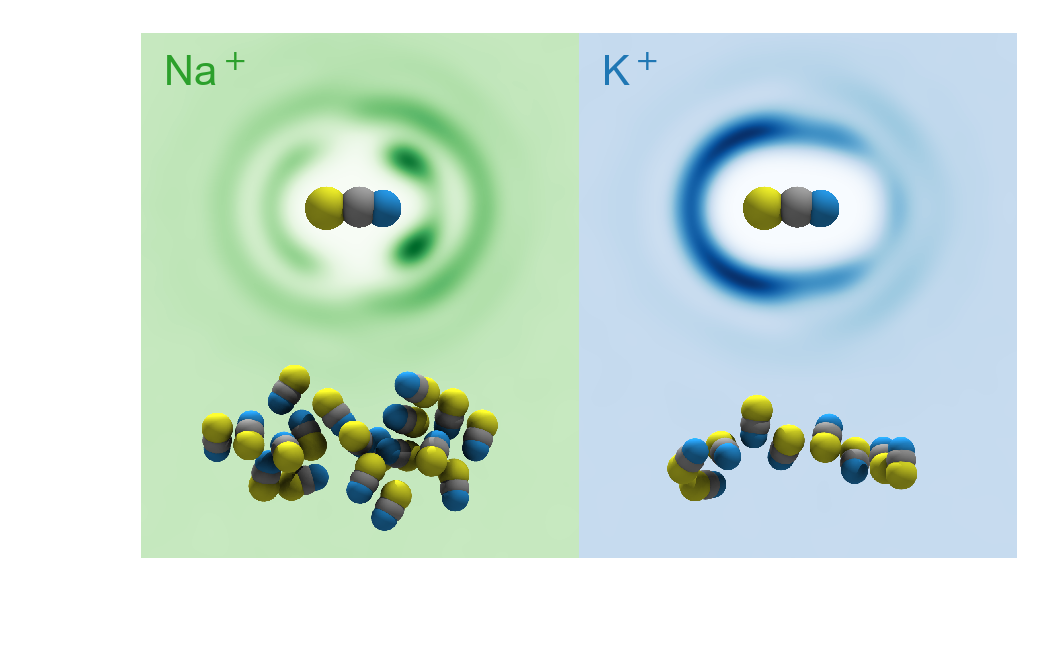

In [2]:
plt.rcParams.update({'figure.figsize': [2.92,1.75],'figure.dpi':300,'font.family': 'Arial'})
wdir = WORKDIR+'/bulk/rdfs/ff_our/spce/'
namap = np.loadtxt(wdir+'nascn/1.0m/nascn.edm')
namap = namap.reshape((int(np.sqrt(namap.size)),int(np.sqrt(namap.size))))[:,6:]
kmap = np.loadtxt(wdir+'kscn/1.0m/kscn.edm')
kmap = kmap.reshape((int(np.sqrt(kmap.size)),int(np.sqrt(kmap.size))))[:,6:]
kmap[int(kmap.shape[0]/2):,:] = .5*(kmap[int(kmap.shape[0]/2):,:] + kmap[int(kmap.shape[0]/2)-1::-1,:])
kmap[:int(kmap.shape[0]/2),:] = kmap[:int(kmap.shape[0]/2)-1:-1,:]
f = plt.figure(frameon=False)
ax1 = plt.Axes(f, [0., 0., .5, 1.]); ax2 = plt.Axes(f, [0.5, 0., .5, 1.])
ax1.set_axis_off(); ax2.set_axis_off(); f.add_axes(ax1); f.add_axes(ax2)
vmin=0
vmax=3.8
xmin=-namap.shape[1]/43
xmax=namap.shape[1]/43
ymin=-namap.shape[0]/43
ymax=namap.shape[0]/43
imgna=ax1.imshow(namap, extent=[xmin,xmax,ymin,ymax], origin='lower', cmap=plt.cm.Greens, interpolation='bicubic',
                 vmin=vmin, vmax=vmax)
imgk=ax2.imshow(kmap, extent=[xmin,xmax,ymin,ymax], origin='lower', cmap=plt.cm.Blues, interpolation='bicubic',
                vmin=vmin, vmax=vmax)
img=mpl.image.imread(WORKDIR+'/aux/scn_vdw.png')
y=img.shape[0]/4300
x=img.shape[1]/4300
ax1.imshow(img,interpolation='none',extent=[-x-.03,x-.03,-y,y])
ax2.imshow(img,interpolation='none',extent=[-x-.03,x-.03,-y,y])
img=mpl.image.imread(WORKDIR+'/aux/clust_6m_nascn.png')
y=img.shape[0]/1100
x=img.shape[1]/1100
ax1.imshow(img,interpolation='none',extent=[-x-.03,x-.03,-y-1.1,y-1.1])
img=mpl.image.imread(WORKDIR+'/aux/clust_6m_kscn.png')
y=img.shape[0]/1100
x=img.shape[1]/1100
ax2.imshow(img,interpolation='none',extent=[-x-.03,x-.03,-y-1.1,y-1.1])
for ax in f.axes:
    ax.set_xlim(-1.,1.); ax.set_ylim(-1.6,.8)
ax1.annotate('Na$^+$',xy=(.05,.9), fontsize=10, xycoords='axes fraction', 
             horizontalalignment='left',color=colors[2])
ax2.annotate('K$^+$',xy=(.05,.9), fontsize=10, xycoords='axes fraction', 
             horizontalalignment='left',color=colors[0])
cna = imgna.cmap(imgna.norm(np.unique(namap)))
ck = imgk.cmap(imgk.norm(np.unique(kmap)))
#print(cna[int(cna.shape[0]/2)][:3],ck[int(ck.shape[0]/2)][:3])
f.savefig('figs/toc.pdf')
plt.show()

In [3]:
plt.rcdefaults()
plt.rcParams.update({'font.size': 14,'xtick.major.pad':3,'ytick.major.pad':3,'figure.dpi':80,
                     'xtick.major.size':6,'ytick.major.size':6,'legend.fontsize':14,
                     'xtick.direction':'out','ytick.direction':'out','axes.labelsize':12,
                     'axes.linewidth':1.2,'xtick.labelsize':12,'ytick.labelsize':12,
                     'xtick.major.width':1.2, 'ytick.major.width':1.2})

## Localized Charges from DFT Calculations

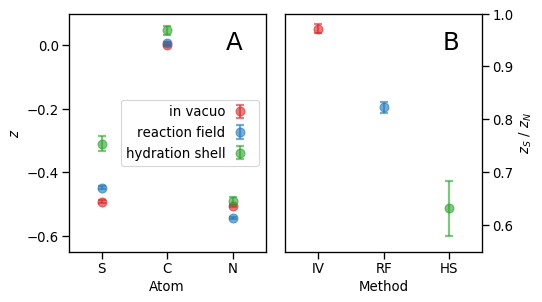

In [4]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
yv = [-0.4925874279,-0.0005379978,-0.5068745746]
yverr = [0.00406136813052,0.00208896968464,0.00210364446527]
yr = [-0.4482636307,0.0070794826,-0.5446568868]
yrerr = [0.00499152085042,0.0019940808497,0.00308726579263]
yw = [-0.3101646173,0.0472906166,-0.4909809864]
ywerr = [0.0238916316398,0.0140485767263,0.0136792456122]
x = [0,1,2]
def err(a,aerr):
    return a[0]/a[2]*np.sqrt((aerr[0]/a[0])**2+(aerr[2]/a[2])**2)
ratio = [yv[0]/yv[2],yr[0]/yr[2],yw[0]/yw[2]]
ratioerr = [err(yv,yverr),err(yr,yrerr),err(yw,ywerr)]
fig, axes = plt.subplots(1, 2, figsize=(7, 4), sharey=False)
axes[0].errorbar(x,yv,yverr,lw=0,marker='o',markeredgecolor=None,alpha=.6,markersize=8,
                 elinewidth=2,capsize=4,capthick=2,label='in vacuo',color=colors[3])
axes[0].errorbar(x,yr,yrerr,lw=0,marker='o',markeredgecolor=None,alpha=.6,markersize=8,
                 elinewidth=2,capsize=4,capthick=2,label='reaction field',color=colors[0])
axes[0].errorbar(x,yw,ywerr,lw=0,marker='o',markeredgecolor=None,alpha=.6,markersize=8,
                 elinewidth=2,capsize=4,capthick=2,label='hydration shell',color=colors[2])            
labels = ['S','S','C','N']
axes[0].set_ylabel('$z$')
axes[0].set_xlabel('Atom')
#axes[0].set_xticks(x, labels)
axes[0].set_xticklabels(labels)
axes[0].set_yticks(np.arange(-.6,.25,0.2))
axes[0].set_xlim(-.5,2.5)
axes[0].set_ylim(-.65,.1)
axes[1].errorbar(x[0],ratio[0],ratioerr[0],lw=0,marker='o',markeredgecolor=None,alpha=.6,markersize=8,
                 elinewidth=2,capsize=4,capthick=2,color=colors[3],label='$in$ $vacuo$')
axes[1].errorbar(x[1],ratio[1],ratioerr[1],lw=0,marker='o',markeredgecolor=None,alpha=.6,markersize=8,
                 elinewidth=2,capsize=4,capthick=2,color=colors[0],label='reaction field')
axes[1].errorbar(x[2],ratio[2],ratioerr[2],lw=0,marker='o',markeredgecolor=None,alpha=.6,markersize=8,
                 elinewidth=2,capsize=4,capthick=2,color=colors[2],label='hydration shell')
axes[0].legend(numpoints=1,handletextpad=0.1,loc='center right',fancybox=True,
               frameon=True,fontsize=12,markerfirst=False)
labels = ['IV','IV','RF','HS']
axes[1].set_ylabel('$z_S$ / $z_N$')
axes[1].set_xlabel('Method')
#axes[1].set_xticks(labels)
axes[1].set_xticklabels(labels)
axes[1].set_yticks(np.arange(.6,1.1,0.1))
axes[1].set_xlim(-.5,2.5)
axes[1].set_ylim(.55,1)
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position('right')
axes[0].annotate('A',xy=(0.8,.85), fontsize=22, xycoords='axes fraction')
axes[1].annotate('B',xy=(0.8,.85), fontsize=22, xycoords='axes fraction')
plt.tight_layout(w_pad=.5,h_pad=0)
plt.savefig('figs/fig1.pdf')
plt.show()

## Computing RDFs, Number Densities, and Box Volume
Here is the function that will be used to compute ion–ion and ion–water radial distribution functions (RDFs), number densities, and box volumes from molecular dynamics trajectories. 

In [5]:
def TrajAnalysis(traj,block,n_blocks,cation,rdfAtom,path):  
    """ This function computes ion–ion and ion–water radial distribution functions (RDFs), 
    number densities, and box volumes from molecular dynamics trajectories and takes five arguments:
    - traj: mdtraj trajectory object
    - block: block of trajectory to be analyzed
    - n_blocks: number of blocks into which the trajectory is divided
    - cation: 'Na', 'K' 
    - rdfAtom: 'S', 'C', 'N', 'I' or 'Cl'
    """
    start = 500
    end = int(traj.n_frames - start)
    first = start + int((block-1)*end/n_blocks)
    last = start + int(block*end/n_blocks)
    traj_block = traj[first:last]
    print("Number of frames in trajectory block: ", traj_block.n_frames)
    print("Number of atoms: ", traj_block.n_atoms)
    N_c = len(traj_block.top.select('name '+rdfAtom+' or name '+cation)) # Number of ions
    N_w = len(traj_block.top.select('name O')) # Number of water molecules 
    # Analysis: Calculating RDFs
    pair_cc = traj_block.top.select_pairs('name '+cation+' or name '+rdfAtom, 
                                         'name '+cation+' or name '+rdfAtom)
    pair_wc = traj_block.top.select_pairs('name O', 'name '+cation+' or name '+rdfAtom)
    r, g_cc = md.compute_rdf(traj_block, pair_cc, r_range=[0,2.80], bin_width=0.01, periodic=True)
    r, g_wc = md.compute_rdf(traj_block, pair_wc, r_range=[0,2.80], bin_width=0.01, periodic=True)
    corr = len(pair_cc) / (0.5*N_c**2) # correction applied to account for diagonal in pair matrix
    g_cc = g_cc * corr # re-scale ion-ion rdf in order to take account for diagonal in pair matrix
    # Computing volume using box vectors
    V = np.prod(traj_block.unitcell_lengths,axis=1).mean() # Volume for current block
    # Computing number density of ions
    rho_c = N_c / V # Number density of ions in current block (nm⁻³)
    # Computing number density of water
    rho_w = N_w / V # Number density of water in current block (nm⁻³)
    print(block,first,last,n_blocks)
    for (name, var) in zip(['g_cc_','g_wc_','r_','V_','rho_c_','rho_w_'], 
                           [g_cc, g_wc, r, V, rho_c, rho_w]):
        if name in ('V_','rho_c_','rho_w_'):
            f = open(path+name+str(block),'w'); f.write(repr(var)+'\n'); f.close()
            print(path+name+str(block),'created')
        else: 
            np.savetxt(path+name+str(block),var); print(path+name+str(block),'created')

In [6]:
def DryTrajAnalysis(traj,block,n_blocks,cation,rdfAtom,path,avgs):  
    """ This function computes ion–cation radial distribution functions (RDFs), 
    number densities, and box volumes from molecular dynamics trajectories and takes five arguments:
    - traj: mdtraj trajectory object
    - block: block of trajectory to be analyzed
    - n_blocks: number of blocks into which the trajectory is divided
    - cation: 'Na', 'K' 
    - rdfAtom: 'S', 'C', 'N', 'I' or 'Cl'
    """
    g_ca_avg, V_avg, rho_c_avg = avgs
    # cation-anion RDFs are saved as g_+- (for halides and SCN C atom–OpenMM trajectories) 
    # or as g_+N1, g_+C2, and g_+S3 for the three SCN atom (GROMACS trajectories)
    minus = '-' if ( rdfAtom in [anion,'C'] ) else rdfAtom.lower()
    start = 500
    end = int(traj.n_frames - start)
    first = start + int((block-1)*end/n_blocks)
    last = start + int(block*end/n_blocks)
    traj_block = traj[first:last]
    print("Number of frames in trajectory block: ", traj_block.n_frames)
    N_c = len(traj_block.top.select('name '+rdfAtom+' or name '+cation))
    # Analysis: Calculating RDFs
    pair_ca = traj_block.top.select_pairs('name '+cation, 'name '+rdfAtom)
    r, g_ca = md.compute_rdf(traj_block, pair_ca, r_range=[0,2.80], bin_width=0.01, periodic=True)
    g_ca_avg += g_ca/block_range.size # Average cation-anion rdf
    # Computing volume using box vectors
    V = np.prod(traj_block.unitcell_lengths,axis=1).mean() # Volume for current block
    V_avg += V/n_blocks # Average volume (nm³)
    # Computing number density of ions
    rho_c = N_c / V # Number density of ions in current block (nm⁻³)
    rho_c_avg += rho_c/n_blocks # Average number density of ions (nm⁻³)                     
    for (name, var) in zip(['g_+'+minus+'_','r_','V_','rho_c_'],[g_ca, r, V, rho_c]):
        file_name = path+name+str(block)
        if name in ('V_','rho_c_'):
            f = open(path+name+str(block),'w'); f.write(repr(var)+'\n'); f.close()
            print(path+name+str(block),'created')
        else: 
            np.savetxt(path+name+str(block),var); print(path+name+str(block),'created')
    return [g_ca_avg, V_avg, rho_c_avg]

## Loading/computing and plotting the RDFs 
Here, we define a function for loading/computing and plotting the RDFs that will be later used to calculate excess coordination numbers. 

In [7]:
def plotRDFs(ff,waterModel,cation,anion,rdfAtom,conc,subplot): 
    """ This function loads and plots RDFs and takes seven arguments:
    - ff: 'ff_our' or 'ff_bian'
    - waterModel: 'spce', 'opc3' or 'tip4pew'
    - cation: 'K' or 'Na'
    - anion: 'SCN', 'I' or 'Cl'
    - rdfAtom: 'S', 'C', 'N', 'I' or 'Cl
    - conc - 0.5, 1.0, 1.5, 2.0, 2.5, 3.0 (m)
    - subplot (i.e. where the subplot will appear)
    """
    # Creating array with indices of blocks available 
    # (choose depending on length of trajectory or number of block files stored)
    block_range = np.arange(1,19,1)
    cnt = 0 # Initializing index to make trajectory only to be read once   
    index = 0 # Initializing concentration index                            
    wdir = WORKDIR+'/bulk/rdfs/'+ff+'/'+waterModel+'/'+cation.lower()+anion.lower()+'/'+str(conc)+'m/'
    ind = 0 # Initializing block index
    g_cc_avg = 0 # Initializing radial distribution function of ion around ion
    g_wc_avg = 0 # Initializing radial distribution function of ion around water  
    avgs = [g_cc_avg, g_wc_avg, 0, 0, 0]
    for block in block_range: # Looping over blocks  
        bool_list = [os.path.isfile(wdir+name+str(block)) 
                         for name in ['g_cc_','g_wc_','r_']]
        # if file exists, use that
        if np.prod(bool_list) == 1:          
            # Loading radial distance file from directory
            r = np.loadtxt(wdir+'r_'+str(block))
            # Loading stored files from directory
            g_cc = np.loadtxt(wdir+'g_cc_'+str(block))
            avgs[0] += g_cc/block_range.size # Calculating average among blocks
            g_wc = np.loadtxt(wdir+'g_wc_'+str(block))
            avgs[1] += g_wc/block_range.size # Calculating average among blocks
        # if simulation output files exist, use those
        elif os.path.isfile(wdir+'out.pdb') and os.path.isfile(wdir+'out.dcd'):
            if (cnt == 0):                                        
                struct = md.load_pdb(wdir+'out.pdb')                   
                sel = struct.topology.select('name O or name '+cation+' or name '+rdfAtom)
                print("Reading in trajectory...")
                traj = md.load_dcd(wdir+'out.dcd', top = struct, atom_indices = sel)
                cnt += 1
            avgs = TrajAnalysis(traj,block,block_range.size,cation,rdfAtom,wdir,avgs)          
        else:
            print('The necessary files are not available in the directory', wdir)       
    subplot.plot(r,avgs[0], label='$g_{cc}(r)$', color=colors[8],lw=2)
    subplot.plot(r,avgs[1], label='$g_{wc}(r)$', color=colors[7],lw=2)
    subplot.set_xlabel('$r$  / nm')
    subplot.set_ylabel('$g(r)$')

## Plotting RDFs
In the following cell, we plot the RDFs for selected force field, water model, and salt.

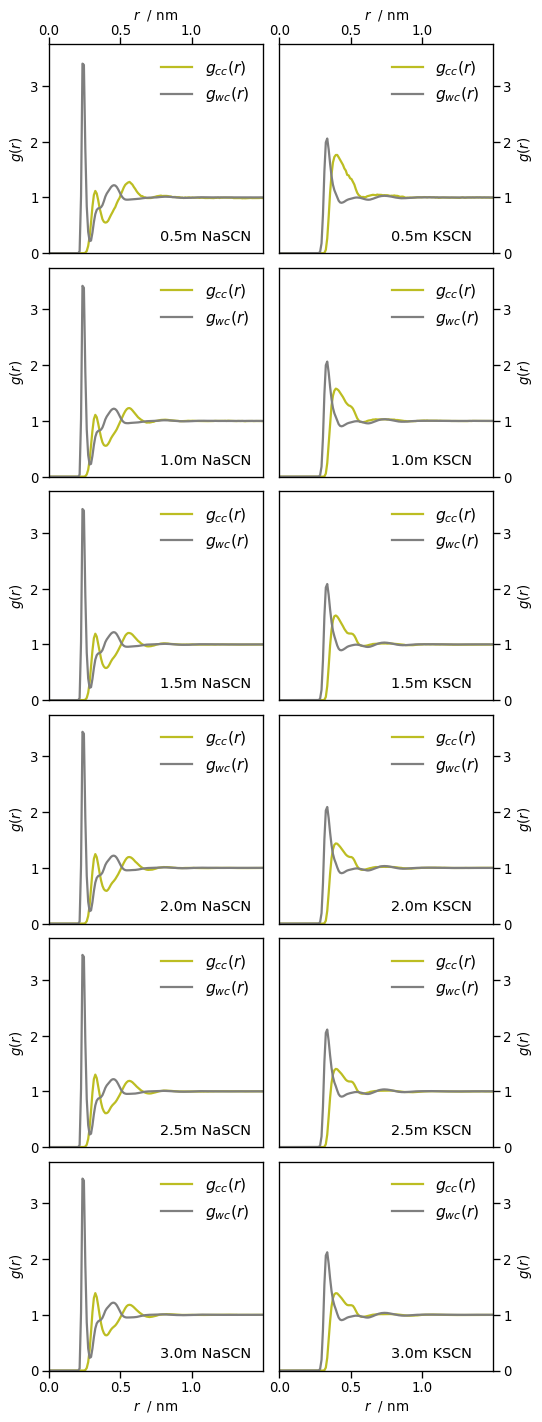

In [8]:
ffs = ['ff_our', 'ff']
ff = ffs[0]
waterModels = ['spce', 'opc3', 'tip4pew']
waterModel = waterModels[0]
cations = ['Na', 'K']; anion = 'SCN'
rdfAtom = 'C' # Choose which atom in the anion to compute distances from
concs = np.linspace(start=0.5, stop=3.0, num=6)
n_rows = len(concs); n_cols = len(cations)
fig = plt.figure(figsize=(7,18))
for i in range(n_rows):
    for j in range(n_cols):
        ax = fig.add_subplot(n_rows,n_cols,(j+1)+n_cols*i)
        plotRDFs(ff,waterModel,cations[j],anion,rdfAtom,concs[i],ax)
        ax.annotate(str(concs[i])+'m '+cations[j]+anion,xy=(.52,.06), fontsize=13, xycoords='axes fraction')
        if j == 0:
            ax.yaxis.tick_left()
            ax.yaxis.set_label_position("left")  
        else:
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position("right")         
        if i == 0:
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position("top") 
            ax.tick_params('x',pad=0)
        elif 0<i<5:
            ax.xaxis.set_visible(False)
        else:
            ax.xaxis.tick_bottom()
        plt.xlim((0, 1.5)); plt.ylim((0, 3.75))
        plt.xticks(np.arange(0,1.5,0.5))
        plt.legend(frameon=False)
plt.tight_layout(w_pad=0.0,h_pad=0.0)
plt.show()

## Compute $\Delta N_{cc}-\Delta N_{wc}$
In the following cell, we calculate the excess coordination numbers $\Delta N_{cc}(r)$ and $\Delta N_{cc}(r)$ which are related to the activity derivative, $a_{c}'$, by 
\begin{align}
a_{c}' =\frac{1}{1+\Delta N_{cc}-\Delta N_{wc}}.
\tag{6}
\end{align}

In [9]:
def plotExcCoordNbrs(ff,waterModel,cation,anion,rdfAtom,conc,subplot): 
    """ This function computes and plots the excess coordination numbers and takes six arguments:
    - ff: 'ff_our' or 'ff_bian'
    - waterModel: 'spce', 'opc3' or 'tip4pew'
    - cation: 'K' or 'Na'
    - anion: 'SCN', 'I' or 'Cl'
    - rdfAtom: 'S', 'C', 'N', 'I' or 'Cl'
    - conc - 0.5, 1.0, 1.5, 2.0, 2.5, 3.0 (m)
    - subplot (i.e. where the subplot will appear)
    """
    # Creating array with indices of blocks available (in total 18 blocks)
    block_range = np.arange(1,19,1)
    cnt = 0 # Initializing index to make trajectory only to be read once
    index = 0 # Initializing concentration index                             
    wdir = WORKDIR+'/bulk/rdfs/'+ff+'/'+waterModel+'/'+cation.lower()+anion.lower()+'/'+str(conc)+'m/'
    ind = 0 # Initializing block index
    g_cc_avg = 0 # Initializing radial distribution function of ion around ion
    g_wc_avg = 0 # Initializing radial distribution function of ion around water
    V_avg = 0; rho_c_avg = 0; rho_w_avg = 0
    avgs = [g_cc_avg, g_wc_avg, V_avg, rho_c_avg, rho_w_avg]
    for block in block_range: # Looping over blocks  
        bool_list = [os.path.isfile(wdir+name+str(block)) 
                         for name in ['g_cc_','g_wc_','r_','V_','rho_c_']]
        # if file exists, use that
        if np.prod(bool_list) == 1:           
            # Loading stored files from directory
            g_cc = np.loadtxt(wdir+'g_cc_'+str(block))
            avgs[0] += g_cc/block_range.size # Calculating average among blocks
            g_wc = np.loadtxt(wdir+'g_wc_'+str(block))
            avgs[1] += g_wc/block_range.size # Calculating average among blocks
            r = np.loadtxt(wdir+'r_'+str(block))
            rho_c = np.loadtxt(wdir+'rho_c_'+str(block))
            avgs[3] += rho_c/block_range.size            
        # if simulation output files exist, use those
        elif os.path.isfile( wdir+'out.pdb' ) and os.path.isfile( wdir+'out.dcd' ):
            if (cnt == 0):                                        
                struct = md.load_pdb(wdir+'out.pdb')                  
                sel = struct.topology.select('name O or name '+cation+' or name '+rdfAtom)
                print("Reading in trajectory...")
                traj = md.load_dcd(wdir+'out.dcd', top = struct, atom_indices = sel)
                cnt += 1
            avgs = TrajAnalysis(traj,block,block_range.size,cation,rdfAtom,wdir,avgs)  
        else:
            print('The necessary files are not available in the directory', wdir)            
        # In this step, the coordination numbers are calculated
        # Getting increment in array with radii 
        dr = r[1]-r[0]       
        # Calculating coordination number without correction factor
        N_cc = avgs[3] * 4 * pi * np.cumsum( ( avgs[0] - 1 ) * r ** 2 * dr )
        N_wc = avgs[3] * 4 * pi * np.cumsum( ( avgs[1] - 1 ) * r ** 2 * dr )
        # Calculating gamma function
        Gamma = N_cc - N_wc   
    subplot.plot(r,Gamma,color=colors[8], label='Uncorrected')
    subplot.set_xlabel('$r$  / nm')
    subplot.set_ylabel('$\Delta N_{cc} - \Delta N_{wc}$')

## Corrected $\Delta N_{cc}-\Delta N_{wc}$
Here, we use the corrections by Ganguly et al. [DOI: 10.1021/ct301017q] and Milzetti et al. [DOI: 10.1021/acs.jpcb.7b11831] to account for issues related to the finite size of the simulated systems.

In [10]:
def plotExcCoordNbrsCorrected(ff,waterModel,cation,anion,rdfAtom,conc,corrIndex,subplot):
    """ This function computes and plots the excess coordination numbers and takes eight arguments:
    - ff: 'ff_our' or 'ff_bian'
    - waterModel: 'spce', 'opc3' or 'tip4pew'
    - cation: 'K' or 'Na'
    - anion: 'SCN', 'I' or 'Cl'
    - rdfAtom: 'S', 'C', 'N', I' or 'Cl'
    - conc - 0.5, 1.0, 1.5, 2.0, 2.5, 3.0 (m)
    - corrIndex - i.e. correction factor: 'Ganguly' or 'Milzetti'
    - subplot (i.e. where the subplot will appear)
    """
    # Creating array with indices of blocks available (in total 18 blocks)
    block_range = np.arange(1,19,1)
    cnt = 0 # Initializing index to make trajectory only to be read once
    index = 0 # Initializing concentration index                             
    wdir = WORKDIR+'/bulk/rdfs/'+ff+'/'+waterModel+'/'+cation.lower()+anion.lower()+'/'+str(conc)+'m/'
    ind = 0 # Initializing block index
    g_cc_avg = 0 # Initializing radial distribution function of ion around ion
    g_wc_avg = 0 # Initializing radial distribution function of ion around water
    V_avg = 0; rho_c_avg = 0; rho_w_avg = 0
    avgs = [g_cc_avg, g_wc_avg, V_avg, rho_c_avg, rho_w_avg]
    for block in block_range: # Looping over blocks 
        bool_list = [os.path.isfile(wdir+name+str(block)) 
                         for name in ['g_cc_','g_wc_','r_','V_','rho_c_']]
        # if file exists, use that
        if np.prod(bool_list) == 1:                
            # Loading stored files from directory
            g_cc = np.loadtxt(wdir+'g_cc_'+str(block))
            avgs[0] += g_cc/block_range.size # Calculating average among blocks
            g_wc = np.loadtxt(wdir+'g_wc_'+str(block))
            avgs[1] += g_wc/block_range.size # Calculating average among blocks
            r = np.loadtxt(wdir+'r_'+str(block))
            V = np.loadtxt(wdir+'V_'+str(block))
            avgs[2] += V/block_range.size # Calculating average among blocks
            rho_c = np.loadtxt(wdir+'rho_c_'+str(block))
            avgs[3] += rho_c/block_range.size           
        # if simulation output files exist, use those
        elif os.path.isfile( wdir+'out.pdb' ) and os.path.isfile( wdir+'out.dcd' ):
            if (cnt == 0):                                        
                struct = md.load_pdb(wdir+'out.pdb')                   
                sel = struct.topology.select('name O or name '+cation+' or name '+rdfAtom)
                print("Reading in trajectory...")
                traj = md.load_dcd(wdir+'out.dcd', top = struct, atom_indices = sel)
                cnt += 1
            avgs = TrajAnalysis(traj,block,block_range.size,cation,rdfAtom,wdir,avgs)
        else:
            print('The necessary files are not available in the directory', wdir)          
    # In this step, the coordination numbers using the two different correction factors are calculated
    # Getting increment in array with radii 
    dr = r[1]-r[0]
    # Defining the truncation distance 
    #R = r[100] # Equals 1.0 nm
    # Calculating remaining volume as a function of the radius
    Vn = 4*pi/3*r**3 / avgs[2]
    # Calculating the total number of ions in the box 
    N_c = avgs[3]*avgs[2]
    # Calculating coordination number without correction factor
    N_cc = avgs[3] * 4 * pi * np.cumsum( ( avgs[0] - 1 ) * r ** 2 * dr )
    N_wc = avgs[3] * 4 * pi * np.cumsum( ( avgs[1] - 1 ) * r ** 2 * dr )
    # Calculating RDFs with Ganguly and van der Vegt DOI: 10.1021/ct301017q
    if corrIndex is 'Ganguly':
        corr_cc = N_c * ( 1 - Vn ) / ( N_c * ( 1 - Vn ) - N_cc - 1 )
        corr_wc = N_c * ( 1 - Vn ) / ( N_c * ( 1 - Vn ) - N_wc - 0 )
        avgs[0] = avgs[0] * corr_cc
        avgs[1] = avgs[1] * corr_wc
        N_cc = avgs[3] * 4 * pi * np.cumsum( ( avgs[0] - 1 ) * r ** 2 * dr )
        N_wc = avgs[3] * 4 * pi * np.cumsum( ( avgs[1] - 1 ) * r ** 2 * dr )
        plotColor = colors[7] 
    # Calculating coordination numbers with Milzetti et al. correction DOI: 10.1021/acs.jpcb.7b11831
    elif corrIndex is 'Milzetti':
        corr_cc = N_c * ( 1 - Vn ) / ( N_c * ( 1 - Vn ) - N_cc - 1 )
        corr_wc = N_c * ( 1 - Vn ) / ( N_c * ( 1 - Vn ) - N_wc - 0 )
        avgs[0] = avgs[0] * corr_cc
        avgs[1] = avgs[1] * corr_wc
        N_cc = np.empty(0); N_wc = np.empty(0)
        for i in range(r.size):
            N_cc = np.append( N_cc, avgs[3]*4*pi * np.sum( (avgs[0][:i]-1) * r[:i]**2 * (1-(r[:i]/r[i])**3) * dr ) )
            N_wc = np.append( N_wc, avgs[3]*4*pi * np.sum( (avgs[1][:i]-1) * r[:i]**2 * (1-(r[:i]/r[i])**3) * dr ) )
        plotColor = colors[6]
    # Calculating gamma function
    Gamma = N_cc - N_wc 
    subplot.plot(r,Gamma,color=plotColor,label=corrIndex+' et al.')
    subplot.set_xlabel('$R$  / nm')
    subplot.set_ylabel('$\Delta N_{cc} - \Delta N_{wc}$')

## Plotting $\Delta N_{cc}-\Delta N_{wc}$ based on scaled RDFs

Here, we plot $\Delta N_{cc}-\Delta N_{wc}$ for selected force field, watermodel and salt, with and without corrections to the KB integrals.

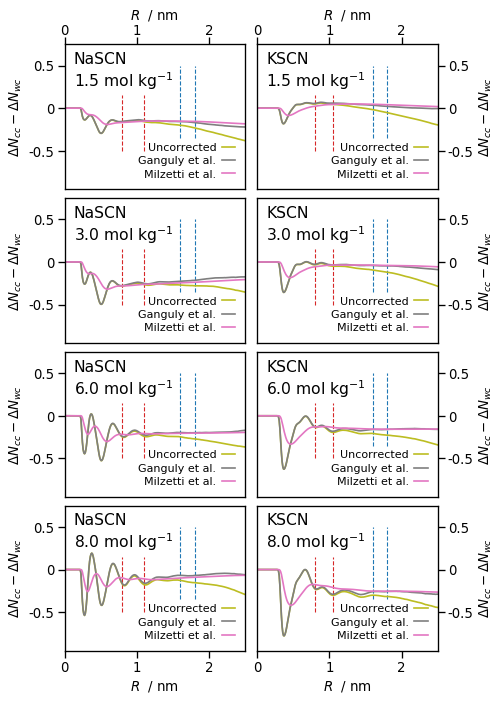

In [11]:
plt.rcParams.update({'figure.figsize': [6.5, 9],'legend.frameon':False})
ffs = ['ff_our', 'ff_bian']
ff = ffs[0]
waterModels = ['spce', 'opc3', 'tip4pew']
waterModel = waterModels[0]
cations = ['Na', 'K']; anions = ['SCN','I','Cl']; anion = anions[0]; rdfAtom = 'C'
concs = np.array([1.5,3.,6.,8.])
n_rows = len(concs); n_cols = len(cations)
fig = plt.figure()
for i in range(n_rows):
    for j in range(n_cols):
        ax = fig.add_subplot(n_rows,n_cols,(j+1)+n_cols*i)
        plotExcCoordNbrs(ff,waterModel,cations[j],anion,rdfAtom,concs[i],ax)
        plotExcCoordNbrsCorrected(ff,waterModel,cations[j],anion,rdfAtom,concs[i],'Ganguly',ax)
        plotExcCoordNbrsCorrected(ff,waterModel,cations[j],anion,rdfAtom,concs[i],'Milzetti',ax)
        ax.annotate(cations[j]+anion+'\n'+str(concs[i])+' mol kg$^{-1}$',xy=(.05,.7),xycoords='axes fraction')
        ax.set_xlim((0, 2.5))
        ax.set_ylim((-0.95, 0.75))
        ax.set_yticks(np.arange(-.5,.6,.5))
        ax.set_yticklabels(['{:1g}'.format(i) for i in np.arange(-.5,.6,.5)])  
        # Bounds of Intervals in which KBIs are averaged in CR method
        cr_upper = 1.1 if anion=='SCN' else .9
        cr_lower = .8 if anion=='SCN' else .7
        if cations[j]=='K' and anion != 'SCN': 
            cr_lower = cr_lower + .05
            cr_upper = cr_upper + .05
        if cations[j]=='K' and anion == 'SCN': cr_upper = cr_upper - .05
        ax.vlines(x=[cr_lower,cr_upper],ymin=-.5,ymax=.15,color=colors[3],lw=1,linestyle='--')
        ax.vlines(x=[1.6,1.8],ymin=-.35,ymax=.5,color=colors[0],lw=1,linestyle='--')
        if j == 0:
            ax.yaxis.tick_left()
            ax.yaxis.set_label_position("left")       
        else:
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position("right")         
        if i == 0:
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position("top")
            ax.tick_params('x',pad=0)
        elif 0<i<3:
            ax.xaxis.set_visible(False)     
        else:
            ax.xaxis.tick_bottom()
        plt.xticks(range(3)) 
        plt.legend(loc='lower right',frameon=False,handlelength=1.2,markerfirst=False,
            handletextpad=0.5,labelspacing=.3,fontsize=10)         
fig.tight_layout(w_pad=0,h_pad=-.2)
fig.savefig('figs/figS1.pdf')
plt.show()

## Experimental densities, activities, and $a_{c}'$

In [13]:
# experimental activity coefficients from Robinson and Stokes, ISBN: 0486422259
m_kscn = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,1.2,1.4,1.6,1.8,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
g_kscn = np.array([.769,.716,.685,.663,.646,.633,.623,.614,.606,.599,.587,.577,.569,.562,.556,.546,.538,.533,.529,
                  .526,.524])
m_nascn = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,1.2,1.4,1.6,1.8,2.0,2.5,3.0,3.5,4.0])
g_nascn = np.array([.787,.750,.731,.720,.714,.7107,.7095,.709,.710,.712,.716,.723,.730,.739,.749,.779,.814,.854,.897])
m_nacl = np.array([.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1.0,1.1,1.2,1.4,1.6,1.8,2.0,2.5,
                   3.0,3.5,4.0])
g_nacl = np.array([.778,.750,.735,.720,.710,.700,.693,.686,.681,.677,.673,.670,.667,.664,.662,.660,.659,.658,.657,
                   .655,.654,.655,.657,.662,.668,.688,.714,.746,.783])
m_nai = m_nascn[:-1]
g_nai = np.array([.787,.751,.735,.727,.723,.723,.724,.727,.731,.736,.747,.763,.780,.799,.820,.883,.963,1.053])
m_kcl = m_nascn
g_kcl = np.array([.770,.718,.688,.666,.649,.637,.626,.618,.610,.604,.593,.586,.580,.576,.573,.569,.569,.572,.577])
m_ki = m_kscn[:-1]
g_ki = np.array([.778,.733,.707,.689,.676,.667,.660,.654,.649,.645,.640,.637,.636,.636,.637,.644,.652,.662,.673,.683])
# activity coefficients at 298 K from Mitchell et al. DOI: 10.1007/bf00651858
m_kscn_mitchell = np.array([0.3071, 0.3123, 0.3935, 0.9268, 1.0133, 1.0626, 1.6616, 1.9042, 2.6262, 2.8652, 3.3192, 
                   3.9171, 3.9820, 4.0096, 4.0138, 4.0480, 4.2270, 4.2274, 4.4824, 4.9004, 5.2130, 6.5640, 8.3150, 
                   9.1777, 11.1061, 11.1485, 12.6339, 15.3142, 17.0665, 19.8439, 20.6239, 22.4500, 23.4669, 24.9414])
g_kscn_mitchell = np.array([0.6938, 0.6925, 0.6749, 0.6095, 0.6028, 0.5993, 0.5671, 0.5579, 0.5384, 0.5338, 0.5267, 
                   0.5202, 0.5196, 0.5194, 0.5193, 0.5190, 0.5177, 0.5177, 0.5160, 0.5137, 0.5125, 0.5093, 0.5074, 
                   0.5063, 0.5024, 0.5023, 0.4978, 0.4870, 0.4787, 0.4637, 0.4590, 0.4476, 0.4412, 0.4325])
def lng_kscn(m):
    A, B, beta, C, D,  = (.5108,1.568459,-0.02581233,6.216876*1e-3,-6.5013827*1e-4)
    E, F, G = (3.425147*1e-5,-9.1511546*1e-7,9.8299289*1e-9)
    return (-A*np.sqrt(m)/(1+B*np.sqrt(m))+beta*m+C*m**2+D*m**3+E*m**4+F*m**5+G*m**6)/np.log10(np.e)
def d_hoh(T):
    # density of water Laliberté et al. DOI: 10.1021/je0498659
    nom = (((((-2.8054253*1e-10*T+1.0556302*1e-7)*T-4.6170461*1e-5)*T-0.0079870401)*T+16.945176)*T+999.83952)
    den = 1+0.01687985*T
    return nom/den
def d_nascn(M):
    # density from Miller et al. DOI: 10.1021/j150536a012
    # return 0.9957+0.04137*M-0.001600*M**(3/2)
    # density at 298 K from Janz et al. DOI: 10.1021/j100701a022
    return 0.99784 + 3.9762*1e-2*M - 3.5933*1e-4*M*M  
def d_kscn(m):
    # density at 298 K from Mitchell et al. DOI: 10.1007/bf00651858
    return 0.997045+0.04773924*m-0.00119526*m**(3/2.)-0.003365596*m**2+0.000701230*m**(5/2.)-0.0000443879*m**3
def d_ki(m,salt):
    # expression from I. D. Zaytsev and G. G. Aseyev, ISBN: 0849393140
    wt = m*df_props[salt]['mw'] # g solute / kg solvent
    wtFrac = wt / (wt + 1000) # weight fraction
    T = 25
    c1, c2, c3 = df_props[salt]['d']['const']
    A = c1+c2*T+c3*T**2
    return d_hoh(T)*10**(A*wtFrac)/1000
def d_AH(m,salt):
    # density of alkali halides NaCl, NaI, KCl
    # expression from Laliberté et al. DOI: 10.1021/je0498659
    wt = m*df_props[salt]['mw'] # g solute / kg solvent
    wtFrac = wt / (wt + 1000) # weight fraction
    T = 25
    c0, c1, c2, c3, c4 = df_props[salt]['d']['const']
    A = (wtFrac+c2+c3*T)/(c0*wtFrac+c1)/np.exp(1e-6*(T+c4)**2)
    return 1. / ( A*wtFrac + (1-wtFrac) / d_hoh(T) )/1000
# conversion between molality and molarity
def m2M_nascn(m,salt): 
    M = np.empty(0)
    mw = df_props[salt]['mw']
    for lal in m:
        M = np.append( M,brentq(lambda lar:lar-lal/(1+lal*mw/1000)*df_props[salt]['d']['func'](lar),0,100) )
    return M
def m2M_kscn(m,salt):
    return m/(1+m*df_props[salt]['mw']/1000)*df_props[salt]['d']['func'](m)
def m2M_AH(m,salt):
    return m/(1+m*df_props[salt]['mw']/1000)*df_props[salt]['d']['func'](m,salt)
# expression for the activity derivative, DOI: 10.1021/ct100517z
def g_func(m, b1, b2, b3, b4):
    return np.exp((-1.18*np.power(m,1/2))/(1+b1*m**(1/2))+b3*m+b4*m**2)/(1-b2*m)
def lng_func(m, b1, b2, b3, b4):
    return (-1.18*np.power(m,1/2))/(1+b1*m**(1/2)) + b3*m + b4*m**2 - np.log(1 - b2*m)
# function that converts the experimental activity coefficients into activity derivative
def ExpActDer(salt): 
    m = np.linspace(.05, 3.6, 360)
    popt, pcov = curve_fit(lng_func,df_props[salt]['ActCoef']['m'],np.log(df_props[salt]['ActCoef']['g']), 
                           bounds =([1, -0.001, -1, -0.1], [2, .2, 1, 0.1]))
    #print(salt,popt); print(salt,np.sqrt(np.diag(pcov)))
    g = g_func(m,*popt)
    M = df_props[salt]['m2M'](m,salt)
    # conversion between activity coefficients in molal scale to molar scale
    y = g*m*d_hoh(25)/1000/M
    der = np.gradient(np.log(g*m),np.log(M))
    return m, der
# number of ions
df_ion = pd.DataFrame({'NaSCN': { 0.5:226, 1.0:412, 1.5:564, 2.0:706, 2.5:824, 3.0:934,
                        4.0:1106, 5.0:1320, 6.0:1516, 7.0:1696, 8.0:1860 }, 
          'KSCN': { 0.5:226, 1.0:412, 1.5:564, 2.0:706, 2.5:824, 3.0:934,
                        4.0:1106, 5.0:1320, 6.0:1516, 7.0:1696, 8.0:1860 }, 
          'NaCl': { 0.5:118, 1.0:214, 1.5:300, 2.0:378, 2.5:444, 3.0:504 },
          'KCl': { 0.5:118, 1.0:214, 1.5:300, 2.0:378, 2.5:444, 3.0:504 },
          'NaI': { 0.5:114, 1.0:206, 1.5:286, 2.0:362, 2.5:426, 3.0:478 },
          'KI': { 0.5:114, 1.0:206, 1.5:286, 2.0:362, 2.5:426, 3.0:478 } })
# number of water molecules
df_hoh = pd.DataFrame({'NaSCN': { 0.5:12419, 1.0:11349, 1.5:10475, 2.0:9749, 2.5:9117, 3.0:8599,
                        4.0:7709, 5.0:7372, 6.0:7038, 7.0:6737, 8.0:6419 },
          'KSCN': { 0.5:12419, 1.0:11349, 1.5:10475, 2.0:9749, 2.5:9117, 3.0:8599,
                        4.0:7709, 5.0:7372, 6.0:7038, 7.0:6737, 8.0:6419 },
          'NaCl': { 0.5:6460, 1.0:5991, 1.5:5533, 2.0:5246, 2.5:4924, 3.0:4646 },
          'KCl': { 0.5:6460, 1.0:5991, 1.5:5533, 2.0:5246, 2.5:4924, 3.0:4646 },
          'NaI': { 0.5:6381, 1.0:5797, 1.5:5368, 2.0:5022, 2.5:4724, 3.0:4413 },
          'KI': { 0.5:6381, 1.0:5797, 1.5:5368, 2.0:5022, 2.5:4724, 3.0:4413 } })
# properties of the salts
df_props = pd.DataFrame({'NaSCN':{'mw':81.073,'ActCoef':{'g':g_nascn,'m':m_nascn},'m2M':m2M_nascn,
                            'd':{'func':d_nascn},'sol':0.602},
                    'KSCN':{'mw':97.181,'ActCoef':{'g':g_kscn,'m':m_kscn},'m2M':m2M_kscn,
                            'd':{'func':d_kscn},'sol':0.704},
                    'NaCl':{'mw':58.40,'ActCoef':{'g':g_nacl,'m':m_nacl},'m2M':m2M_AH,
                            'd':{'func':d_AH,'const':[-0.00433,0.06471,1.01660,0.014624,3315.6]}},
                    'NaI':{'mw':149.89,'ActCoef':{'g':g_nai,'m':m_nai},'m2M':m2M_AH,
                           'd':{'func':d_AH,'const':[626.15,1858.2,1.7387,0.010500,1203.3]}},
                    'KCl':{'mw':74.55,'ActCoef':{'g':g_kcl,'m':m_kcl},'m2M':m2M_AH,
                           'd':{'func':d_AH,'const':[-0.46782,4.30800,2.3780,0.022044,2714.0]}},
                    'KI':{'mw':166.00,'ActCoef':{'g':g_ki,'m':m_ki},'m2M':m2M_AH,
                          'd':{'func':d_ki,'const':[3664.2e-4, -252.3e-6, 149.7e-8]}}})
df_mw = pd.Series({'NaSCN':81.07, 'KSCN':97.181, 'NaCl':58.40, 'KCl':74.55, 'NaI':149.89, 'KI':166.00}).T
# average box volumes
d_vol = {}
for salt in df_hoh.columns:
    d_vol[salt] = {}
    for m in df_hoh.index:
        folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+salt.lower()+'/'+str(m)+'m'
        if os.path.isdir(folder):
            vol = 0
            block_range = np.arange(1,37,1) if os.path.isfile(folder+'/V_36') else np.arange(1,19,1)
            for i in block_range:
                vol += np.loadtxt(folder+'/V_'+str(i))
            d_vol[salt][m] = vol/float(block_range.size)
df_vol = pd.DataFrame(d_vol)
# densities in g/mL
df_dens = (df_ion/2.*df_mw+df_hoh*18.01528)/df_vol/6.022/100
# molarities (mol/L)
df_M = df_ion/2./df_vol/6.022*10
# average box volumes ff_ourHvdV simulations
d_vol = {}
for salt in df_hoh.columns:
    d_vol[salt] = {}
    for m in df_hoh.index:
        folder = WORKDIR+'/bulk/rdfs/ff_ourHvdV/spce/'+salt.lower()+'/'+str(m)+'m'
        if os.path.isdir(folder):
            vol = 0
            for i in range(1,19):
                vol += np.loadtxt(folder+'/V_'+str(i))
            d_vol[salt][m] = vol/18.
df_vol_ourHvdV = pd.DataFrame(d_vol)
# densities in g/mL
df_dens_ourHvdV = (df_ion/2.*df_mw+df_hoh*18.01528)/df_vol_ourHvdV/6.022/100
df_dens_ourHvdV.dropna(axis=1,how='all',inplace=True)
# average box volumes ff_bian simulations
d_vol = {}
for salt in df_hoh.columns:
    d_vol[salt] = {}
    for m in df_hoh.index:
        folder = WORKDIR+'/bulk/rdfs/ff_bian/spce/'+salt.lower()+'/'+str(m)+'m'
        if os.path.isdir(folder):
            vol = 0
            for i in range(1,19):
                vol += np.loadtxt(folder+'/V_'+str(i))
            d_vol[salt][m] = vol/18.
df_vol_bian = pd.DataFrame(d_vol)
# densities in g/mL
df_dens_bian = (df_ion/2.*df_mw+df_hoh*18.01528)/df_vol_bian/6.022/100
df_dens_bian.dropna(axis=1,how='all',inplace=True)

## Solubilities of NaSCN and KSCN

In [3]:
print('solubility of KSCN (mol/kg):',
      df_props['KSCN']['sol']*1e3/(1-df_props['KSCN']['sol'])/df_props['KSCN']['mw'])
print('solubility of NaSCN (mol/kg:)',
      df_props['NaSCN']['sol']*1e3/(1-df_props['NaSCN']['sol'])/df_props['NaSCN']['mw'])

solubility of KSCN (mol/kg): 24.473697310980313
solubility of NaSCN (mol/kg:) 18.656800834684194


## Diffusion Coefficients of NaSCN and KSCN in water at 25$^\circ$C

In [4]:
# KSCN diffusion coefficients from Mitchell et al. DOI: 10.1007/bf00651858
m_diff_kscn = [0.0128,0.0262,0.0755,0.1516,0.2283,0.3154,0.5949,1.0204,1.5647,2.2621,2.9079,
               2.94124,3.6028,4.3351,5.9486,7.6982,8.8261]; m_diff_kscn = np.array(m_diff_kscn)
D_diff_kscn = [1.7691,1.7528,1.7307,1.7244,1.7207,1.7261,1.7302,1.7527,1.7829,1.8233,1.8531,
               1.8656,1.8816,1.9027,1.9246,1.8996,1.8632]; D_diff_kscn = np.array(D_diff_kscn)
# NaSCN diffusion coefficients from Janz et al. DOI: 10.1021/j100701a022
M_diff_nascn = [.1,.5,1,2,3,4,5,6,7,8,9]; M_diff_nascn = np.array(M_diff_nascn)
D_diff_nascn = [1.474,1.457,1.485,1.545,1.577,1.577,1.552,1.519,1.460,1.410,1.371] 
D_diff_nascn = np.array(D_diff_nascn)

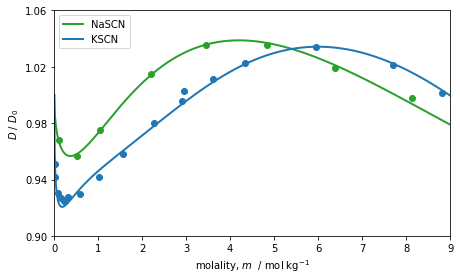

In [5]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
RT = 8.3145*298.12
F = 96485.3329 # s A / mol
m = np.linspace(.0, 16.6, 1660)
# NaSCN diffusion coefficients from Janz et al. DOI: 10.1021/j100701a022
def diff_janz(M):
    return 1.3171+0.20081*M-3.4266*1e-2*M**2+1.6157*1e-3*M**3-2.87*1e-4/(M**2+1e-3)-0.16349*np.log10(M+1e-3)
def diff_fitJanz(M,a,b,c,d,e,f):
    return 1.5226+a*M**(1/2)+b*M+c*M**(3/2)+d*M**2+e*M**(5/2)+f*M**3
M = df_props['NaSCN']['m2M'](m,'NaSCN')
popt,pcov = curve_fit(diff_fitJanz,M_diff_nascn,D_diff_nascn)
m_diff_nascn = M_diff_nascn/(df_props['NaSCN']['d']['func'](M_diff_nascn)-M_diff_nascn*df_props['NaSCN']['mw']*1e-3)
# limiting equivalent conductance of Na+ from Benson et al. DOI: 10.1063/1.1723981
D0 = RT/F/F*50.1*66.6*2/(50.1+66.6)*1e5
#plt.plot(m,diff_janz(M)/D0,lw=2,color=colors[2],label='NaSCN')
plt.plot(m_diff_nascn,D_diff_nascn/D0,lw=0,color=colors[2],marker='o')
plt.plot(m,diff_fitJanz(M,*popt)/D0,lw=2,color=colors[2],label='NaSCN')
# KSCN diffusion coefficients from Mitchell et al. DOI: 10.1007/bf00651858
def diff_mitchell(M):
    return 1.8606-0.962063*M**(1/2)+2.261129*M-2.441316*M**(3/2)+1.388944*M**2-0.383375*M**(5/2)+0.039249*M**3
M = df_props['KSCN']['m2M'](m,'KSCN')
D0 = RT/F/F*73.5*66.6*2/(73.5+66.6)*1e5
plt.plot(m,diff_mitchell(M)/D0,lw=2,color=colors[0],label='KSCN')
plt.plot(m_diff_kscn,D_diff_kscn/D0,lw=0,color=colors[0],marker='o')
plt.xlim(0.0,9)
plt.ylim(0.9,1.06)
plt.yticks(np.arange(.9,1.08,0.04))
plt.ylabel('$D$ / $D_0$')
plt.xlabel('molality, $m$  / mol kg$^{-1}$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Calculating $a_{c}'$

In the next two cells, we calculate and plot the activity derivative, $a_{c}'$, based on the corrected excess coordination numbers.

In [6]:
def actDer(ff,waterModel,cation,anion,rdfAtom,approach,concs_m,subplot,alpha=.5):
    """ This function plots activity derivatives and takes seven arguments:
    - ff: 'ff_our' or 'ff_bian'
    - waterModel: 'spce', 'opc3' or 'tip4pew'
    - cation: 'K' or 'Na'
    - anion: 'SCN', 'I' or 'Cl'
    - rdfAtom: 'S', 'C', 'N', I' or 'Cl'
    - approach: approach to comopute the average KBI values, 'CR' or 'LR'
    - subplot (i.e. where the subplot will appear)
    """
    # Defining molar mass of water (kg/mol)
    MW_H2O = 18.01528e-3    
    # Declaring variables that will be calculated later
    molal = np.empty(0) # molal concentrations [mol/(kg solvent)]
    actDerErr = np.empty(0) # standard deviation among blocks
    actDerAvg = np.empty(0) # activity derivative, full trajectory  
    # Bounds of Intervals in which KBIs are averaged in CR method
    cr_upper = 1.1 if anion=='SCN' else .9
    cr_lower = .8 if anion=='SCN' else .7
    if cation=='K' and anion != 'SCN': 
        cr_lower = cr_lower + .05
        cr_upper = cr_upper + .05
    if cation=='K' and anion == 'SCN': cr_upper = cr_upper - .05
    for conc_m in concs_m: # Looping over concentrations  
        wdir = WORKDIR+'/bulk/rdfs/'+ff+'/'+waterModel+'/'+cation.lower()+anion.lower()+'/'+str(conc_m)+'m/'
        # Creating array with indices of blocks available (in total 18 blocks, or 36 blocks)
        block_range = np.arange(1,37,1) if os.path.isfile(wdir+'g_cc_36') else np.arange(1,19,1)
        cnt = 0 # Initializing index to make trajectory only to be read once 
        g_cc = [] # Initializing radial distribution function of ion around ion
        g_wc = [] # Initializing radial distribution function of ion around water
        V = [] # Initializing volume of the system
        rho_c = [] # Initializing salt density of system    
        rho_w = [] # Initializing water density of system   
        actDer = [] # activity derivatives per block
        for block in block_range: # Looping over blocks  
            bool_list = [os.path.isfile(wdir+name+str(block)) 
                         for name in ['g_cc_','g_wc_','r_','V_','rho_c_','rho_w_']]
            # if file exists, use that
            if np.prod(bool_list) != 1:        
                # if simulation output files exist, use those
                if os.path.isfile( wdir+'out.pdb' ) and os.path.isfile( wdir+'out.dcd' ):
                    if (cnt == 0):                                        
                        struct = md.load_pdb(wdir+'out.pdb')                 
                        sel = struct.topology.select('name O or name '+cation+' or name '+rdfAtom)
                        print("Reading in trajectory...")
                        traj = md.load_dcd(wdir+'out.dcd', top = struct, atom_indices = sel)
                        cnt += 1
                    TrajAnalysis(traj,block,block_range.size,cation,rdfAtom,wdir)
                elif os.path.isfile( wdir+'npt.gro' ) and os.path.isfile( wdir+'npt.xtc' ):
                    if (cnt == 0):                                        
                        struct = md.load(wdir+'npt.gro') 
                        sel = struct.topology.select('name O or name '+cation.upper()+' or name '+rdfAtom)
                        print(len(struct.topology.select('name O')),'O')
                        print(len(struct.topology.select('name '+cation.upper())),cation.upper())
                        print(len(struct.topology.select('name '+rdfAtom)),rdfAtom)
                        print("Reading in trajectory...")
                        traj = md.load_xtc(wdir+'npt.xtc', top = struct, atom_indices = sel)
                        cnt += 1
                    print(block,ff,cation)
                    TrajAnalysis(traj,block,block_range.size,cation.upper(),rdfAtom,wdir)            
                else:
                    print('The necessary files are not available in the directory', wdir)
            # Loading stored files from directory
            g_cc.append( np.loadtxt(wdir+'g_cc_'+str(block)) )
            g_wc.append( np.loadtxt(wdir+'g_wc_'+str(block)) )
            r = np.loadtxt(wdir+'r_'+str(block))
            V.append( np.loadtxt(wdir+'V_'+str(block)) )
            rho_c.append( np.loadtxt(wdir+'rho_c_'+str(block)) )
            rho_w.append( np.loadtxt(wdir+'rho_w_'+str(block)) )
            # Binwidth 
            dr = r[1]-r[0]
            # Calculating coordination number without correction factor
            N_cc = rho_c[-1] * 4 * pi * np.cumsum( ( g_cc[-1] - 1 ) * r ** 2 * dr )
            N_wc = rho_c[-1] * 4 * pi * np.cumsum( ( g_wc[-1] - 1 ) * r ** 2 * dr )
            Gamma = N_cc - N_wc    
            # Averaging in the correlated regime (CR method DOI: 10.1021/acs.jpcb.7b11831)
            if approach is 'CR':
                Gamma_plateau = Gamma[(r>=cr_lower)*(r<=cr_upper)].mean() # averaging window 0.9–1.3
            # Long Range Approach by Milzetti et al. DOI: 10.1021/acs.jpcb.7b11831 
            elif approach is 'LR':
                # correction by Ganguly and van der Vegt DOI: 10.1021/ct301017q
                Vn = 4*pi/3*r**3 / V[-1]; N_c = rho_c[-1]*V[-1]; N_w = rho_w[-1]*V[-1]
                corr_cc = N_c * ( 1 - Vn ) / ( N_c * ( 1 - Vn ) - N_cc - 1 )
                corr_wc = N_c * ( 1 - Vn ) / ( N_c * ( 1 - Vn ) - N_wc - 0 )
                g_ccc = g_cc[-1] * corr_cc
                g_wcc = g_wc[-1] * corr_wc
                # correction by Krüger et al. DOI: 10.1021/jz301992u
                N_ccc = np.empty(0); N_wcc = np.empty(0)
                for i in range(r.size):
                    N_ccc = np.append(N_ccc,rho_c[-1]*4*pi*np.sum((g_ccc[:i]-1)*r[:i]**2*(1-(r[:i]/r[i])**3)*dr) )
                    N_wcc = np.append(N_wcc,rho_c[-1]*4*pi*np.sum((g_wcc[:i]-1)*r[:i]**2*(1-(r[:i]/r[i])**3)*dr) )
                Gamma = N_ccc - N_wcc 
                Gamma_plateau = Gamma[(r>=1.6)*(r<=1.8)].mean() # averaging window 1.8–2.2
            # Calculating activity derivative for the current block and concentration
            actDer.append( 1 / ( 1 + Gamma_plateau ) )
        # Calculating coordination numbers (whole trajectory) without correction factor
        N_cc = np.mean(rho_c) * 4 * pi * np.cumsum( ( np.mean(g_cc,axis=0) - 1 ) * r ** 2 * dr )
        N_wc = np.mean(rho_c) * 4 * pi * np.cumsum( ( np.mean(g_wc,axis=0) - 1 ) * r ** 2 * dr )
        N_c = np.mean(rho_c)*np.mean(V); N_w = np.mean(rho_w)*np.mean(V)
        Gamma_avg = N_cc - N_wc
        # Averaging in the correlated regime (CR method DOI: 10.1021/acs.jpcb.7b11831)
        if approach is 'CR':
            Gamma_plateau_avg = Gamma_avg[(r>=cr_lower)*(r<=cr_upper)].mean()
        # Long Range Approach by Milzetti et al. DOI: 10.1021/acs.jpcb.7b11831
        elif approach is 'LR':
            # correction by Ganguly and van der Vegt DOI: 10.1021/ct301017q
            Vn = 4*pi/3*r**3 / np.mean(V)
            corr_cc = N_c * ( 1 - Vn ) / ( N_c * ( 1 - Vn ) - N_cc - 1 )
            corr_wc = N_c * ( 1 - Vn ) / ( N_c * ( 1 - Vn ) - N_wc - 0 )
            g_ccc = np.mean(g_cc,axis=0) * corr_cc
            g_wcc = np.mean(g_wc,axis=0) * corr_wc
            # correction by Krüger et al. DOI: 10.1021/jz301992u
            N_ccc = np.empty(0); N_wcc = np.empty(0)
            for i in range(r.size):
                N_ccc = np.append(N_ccc,np.mean(rho_c)*4*pi*np.sum((g_ccc[:i]-1)*r[:i]**2*(1-(r[:i]/r[i])**3)*dr) )
                N_wcc = np.append(N_wcc,np.mean(rho_c)*4*pi*np.sum((g_wcc[:i]-1)*r[:i]**2*(1-(r[:i]/r[i])**3)*dr) )
            # Calculating gamma function, used to calculate the activity derivative
            Gamma_avg = N_ccc - N_wcc 
            Gamma_plateau_avg = Gamma_avg[(r>=1.6)*(r<=1.8)].mean()
        # Calculate activity derivative
        actDerAvg = np.append(actDerAvg, 1 / ( 1 + Gamma_plateau_avg ) )
        molal = np.append(molal, N_c/(2*N_w*MW_H2O) ) # Obtaining molality, based on system quantities
        # Obtaining the standard deviation among blocks of activity derivatives
        actDerErr = np.append(actDerErr, np.std( actDer ) ) 
    # Loading experimental data
    m,a = ExpActDer(cation+anion)
    # Labelling axes
    subplot.set_xlabel('molality, $m$  / mol kg$^{-1}$')
    subplot.set_ylabel(r'$a_{c}^{\prime}$')
    # Specifying color and symbol to use in the plot, depending on ion pair and correction used
    if cation is 'Na':
        ionColor = colors[2]
    elif cation is 'K':
        ionColor = colors[0]
    if approach is 'CR':
        symbol = '^'
    elif approach is 'LR':
        symbol = 's'
    print(molal,cation,ff)
    # Plotting continuous experimental activity derivative curves together with simulated data points
    subplot.plot(m, a, color=ionColor, lw=2, alpha=alpha, label='experiments, '+cation+'$^+$')
    subplot.errorbar(molal, actDerAvg, actDerErr, color=ionColor, marker=symbol, ms=8, lw=0,
            markeredgecolor=None, label='simulations, '+cation+'$^+$', alpha=0.6, mew=2, elinewidth=2,capsize=5)

[0.50064112 0.99870086 1.49435596 1.99225738 2.50844305 2.9878416 ] Na ff_our
[0.5005599  0.99834569 1.49392811 1.99117453 2.50844305 2.98589424] K ff_our
[0.49991657 0.98643354 1.45032694 1.94216251 2.37456913 2.85206724] Na ff_bian
[0.49991657 0.98643354 1.45032694 1.94216251 2.37456913 2.85206724] K ff_bian
[0.50064112 0.99870086 1.49435596 1.99225738 2.50844305 2.9878416 ] Na ff_our
[0.5005599  0.99834569 1.49392811 1.99117453 2.50844305 2.98589424] K ff_our
[0.49991657 0.98643354 1.45032694 1.94216251 2.37456913 2.85206724] Na ff_bian
[0.49991657 0.98643354 1.45032694 1.94216251 2.37456913 2.85206724] K ff_bian


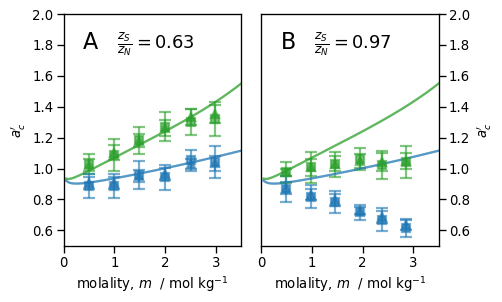

In [17]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex=False, sharey=False)
# Here, we call the function actDer defined above. 
# Choose which forcefield(s), watermodel(s), ion pair(s) and correction factor(s) you wish to plot. 
# Avalable molal concentrations (mol/(kg solvent))
concs_m = np.linspace(start=0.5, stop=3.0, num=6) 
actDer('ff_our','spce','Na','SCN','C','CR',concs_m,ax1)
actDer('ff_our','spce','K','SCN','C','CR',concs_m,ax1)
actDer('ff_bian','spce','Na','SCN','C','CR',concs_m,ax2)
actDer('ff_bian','spce','K','SCN','C','CR',concs_m,ax2)
actDer('ff_our','spce','Na','SCN','C','LR',concs_m,ax1)
actDer('ff_our','spce','K','SCN','C','LR',concs_m,ax1)
actDer('ff_bian','spce','Na','SCN','C','LR',concs_m,ax2)
actDer('ff_bian','spce','K','SCN','C','LR',concs_m,ax2)
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position('left')            
ax1.set_xticks([0,1,2,3])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_xticks([0,1,2,3])
ax1.set_xlim(0, 3.5); ax1.set_ylim(0.5, 2.0)
ax2.set_xlim(0, 3.5); ax2.set_ylim(0.5, 2.0)
ax1.annotate(r'A',xy=(0.11,.85), fontsize=20, xycoords='axes fraction')
ax2.annotate(r'B',xy=(0.11,.85), fontsize=20, xycoords='axes fraction')
ax1.annotate(r'$\frac{z_S}{z_N}=0.63$',xy=(0.30,.85), fontsize=16, xycoords='axes fraction')
ax2.annotate(r'$\frac{z_S}{z_N}=0.97$',xy=(0.30,.85), fontsize=16, xycoords='axes fraction')
f.tight_layout(w_pad=.5)
f.savefig('figs/fig2.pdf')
plt.show()

[0.50696558 0.99138751 1.50483739 1.99982734 2.50261425 3.01078899] Na ff_our
[0.50696558 0.99138751 1.50483739 1.99982734 2.50261425 3.01078899] K ff_our
[0.49584404 0.98626338 1.47870831 2.0006027  2.50281471 3.00623521] Na ff_our
[0.49584404 0.98626338 1.47870831 2.0006027  2.50281471 3.00623521] K ff_our
[0.50696558 0.99138751 1.50483739 1.99982734 2.50261425 3.01078899] Na ff_our
[0.50696558 0.99138751 1.50483739 1.99982734 2.50261425 3.01078899] K ff_our
[0.49584404 0.98626338 1.47870831 2.0006027  2.50281471 3.00623521] Na ff_our
[0.49584404 0.98626338 1.47870831 2.0006027  2.50281471 3.00623521] K ff_our


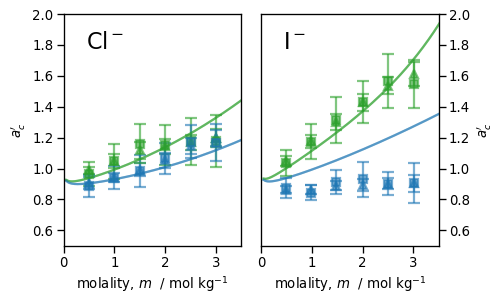

In [18]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex=False, sharey=False)
# Molal concentrations (mol/(kg solvent))
concs_m = np.linspace(start=0.5, stop=3.0, num=6) 
# Here, we call the function actDer defined above. 
# Choose which forcefield(s), watermodel(s), ion pair(s) and correction factor(s) you wish to plot. 
actDer('ff_our','spce','Na','Cl','C','CR',concs_m,ax1)
actDer('ff_our','spce','K','Cl','C','CR',concs_m,ax1)
actDer('ff_our','spce','Na','I','C','CR',concs_m,ax2)
actDer('ff_our','spce','K','I','C','CR',concs_m,ax2)
actDer('ff_our','spce','Na','Cl','C','LR',concs_m,ax1)
actDer('ff_our','spce','K','Cl','C','LR',concs_m,ax1)
actDer('ff_our','spce','Na','I','C','LR',concs_m,ax2)
actDer('ff_our','spce','K','I','C','LR',concs_m,ax2)
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position('left')            
ax1.set_xticks([0,1,2,3])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_xticks([0,1,2,3])
ax1.set_xlim(0, 3.5); ax1.set_ylim(0.5, 2.0)
ax2.set_xlim(0, 3.5); ax2.set_ylim(0.5, 2.0)
ax1.annotate('Cl$^-$',xy=(0.125,.85), fontsize=20, xycoords='axes fraction')
ax2.annotate('I$^-$',xy=(0.125,.85), fontsize=20, xycoords='axes fraction')
f.tight_layout(w_pad=.5)
f.savefig('figs/figS2.pdf')
plt.show()

[0.5050691  1.00755464 1.49435596 2.00989615 2.50844305 3.01458765] Na ff_our
[0.5050691  1.00755464 1.49392811 2.00989615 2.50844305 3.01458765] K ff_our
[0.50649654 1.00773223 1.49207689 2.0076309  2.48203552 2.98852192] Na ff_our
[0.50649654 1.00773223 1.49207689 2.0076309  2.48203552 2.98852192] K ff_our
[0.5050691  1.00755464 1.49435596 2.00989615 2.50844305 3.01458765] Na ff_our
[0.5050691  1.00755464 1.49392811 2.00989615 2.50844305 3.01458765] K ff_our
[0.50649654 1.00773223 1.49207689 2.0076309  2.48203552 2.98852192] Na ff_our
[0.50649654 1.00773223 1.49207689 2.0076309  2.48203552 2.98852192] K ff_our


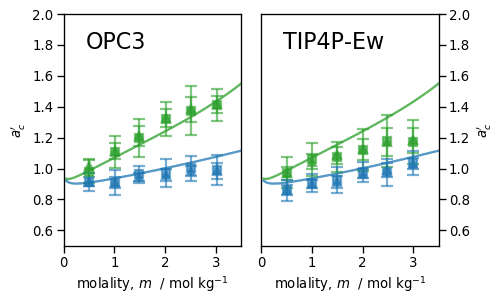

In [19]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex=False, sharey=False)
# Molal concentrations (mol/(kg solvent))
concs_m = np.linspace(start=0.5, stop=3.0, num=6) 
# Here, we call the function actDer defined above. 
# Choose which forcefield(s), watermodel(s), ion pair(s) and correction factor(s) you wish to plot. 
actDer('ff_our','opc3','Na','SCN','C','CR',concs_m,ax1)
actDer('ff_our','opc3','K','SCN','C','CR',concs_m,ax1)
actDer('ff_our','tip4pew','Na','SCN','C','CR',concs_m,ax2)
actDer('ff_our','tip4pew','K','SCN','C','CR',concs_m,ax2)
actDer('ff_our','opc3','Na','SCN','C','LR',concs_m,ax1)
actDer('ff_our','opc3','K','SCN','C','LR',concs_m,ax1)
actDer('ff_our','tip4pew','Na','SCN','C','LR',concs_m,ax2)
actDer('ff_our','tip4pew','K','SCN','C','LR',concs_m,ax2)
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position('left')            
ax1.set_xticks([0,1,2,3])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_xticks([0,1,2,3])
ax1.set_xlim(0, 3.5); ax1.set_ylim(0.5, 2.0)
ax2.set_xlim(0, 3.5); ax2.set_ylim(0.5, 2.0)
ax1.annotate('OPC3',xy=(0.125,.85), fontsize=20, xycoords='axes fraction')
ax2.annotate('TIP4P-Ew',xy=(0.125,.85), fontsize=20, xycoords='axes fraction')
f.tight_layout(w_pad=.5)
f.savefig('figs/figS3.pdf')
plt.show()

[0.99870086 1.99225738 2.9878416  4.01940089 4.987145   5.94453147
 7.97387158] Na ff_our
[0.99870086 1.99225738 2.9878416  4.01940089 4.987145   5.94453147
 7.97387158] Na ff_our
[0.99834569 1.99117453 2.98589424 3.98188002 5.97831682 8.04219421] K ff_our
[0.99834569 1.99117453 2.98589424 3.98188002 5.97831682 8.04219421] K ff_our
[1.49435596 3.01458765 5.94453147] Na ff_ourHvdV
[1.49435596 3.01458765 5.94453147] Na ff_ourHvdV
[1.49435596 3.01458765 5.97831682] K ff_ourHvdV
[1.49435596 3.01458765 5.97831682] K ff_ourHvdV


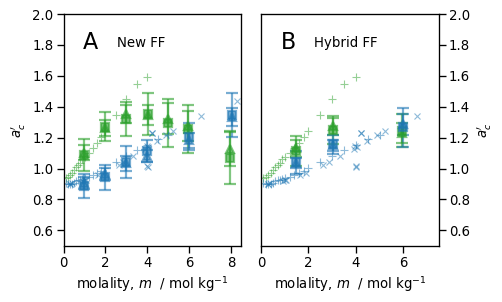

In [87]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex=False, sharey=False)
# Here, we call the function actDer defined above. 
# Choose which forcefield(s), watermodel(s), ion pair(s) and correction factor(s) you wish to plot. 
# Avalable molal concentrations (mol/(kg solvent))
concs_m = np.array([1.,2.,3.,4.,5.,6.,8.]) 
actDer('ff_our','spce','Na','SCN','C2','CR',concs_m,ax1,alpha=0)
actDer('ff_our','spce','Na','SCN','C','LR',concs_m,ax1,alpha=0)
concs_m = np.array([1.,2.,3.,4.,6.,8.]) 
actDer('ff_our','spce','K','SCN','C2','CR',concs_m,ax1,alpha=0)
actDer('ff_our','spce','K','SCN','C','LR',concs_m,ax1,alpha=0)
concs_m = np.array([1.5,3.0,6.0]) 
actDer('ff_ourHvdV','spce','Na','SCN','C','CR',concs_m,ax2,alpha=0)
actDer('ff_ourHvdV','spce','Na','SCN','C2','LR',concs_m,ax2,alpha=0)
actDer('ff_ourHvdV','spce','K','SCN','C','CR',concs_m,ax2,alpha=0)
actDer('ff_ourHvdV','spce','K','SCN','C2','LR',concs_m,ax2,alpha=0)

for ax in [ax1,ax2]:
    M = df_props['NaSCN']['m2M'](m_nascn,'NaSCN')
    der = np.gradient(np.log(g_nascn*m_nascn),np.log(M))
    ax.plot(m_nascn,der,lw=0,marker='+',ms=8,color=colors[2],alpha=.5)

    M = df_props['KSCN']['m2M'](m_kscn,'KSCN')
    der = np.gradient(np.log(g_kscn*m_kscn),np.log(M))
    ax.plot(m_kscn,der,lw=0,marker='+',ms=8,color=colors[0],alpha=.5)
    
    M = df_props['KSCN']['m2M'](m_kscn_mitchell,'KSCN')
    der = np.gradient(np.log(g_kscn_mitchell*m_kscn_mitchell),np.log(M))
    ax.plot(m_kscn_mitchell,der,lw=0,marker='x',ms=6,color=colors[0],alpha=.5)

ax1.yaxis.tick_left()
ax1.yaxis.set_label_position('left')            
ax1.set_xticks([0,2,4,6,8])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_xticks([0,2,4,6,8])
ax1.set_xlim(0, 8.5); ax1.set_ylim(0.5, 2.0)
ax2.set_xlim(0, 7.5); ax2.set_ylim(0.5, 2.0)
ax1.annotate(r'A',xy=(0.11,.85), fontsize=20, xycoords='axes fraction')
ax2.annotate(r'B',xy=(0.11,.85), fontsize=20, xycoords='axes fraction')
ax1.annotate(r'New FF',xy=(0.30,.86), fontsize=12, xycoords='axes fraction')
ax2.annotate(r'Hybrid FF',xy=(0.30,.86), fontsize=12, xycoords='axes fraction')
f.tight_layout(w_pad=.5)
f.savefig('figs/figS4.pdf')
plt.show()

## Comparison Between Experimental and Simulated Densities

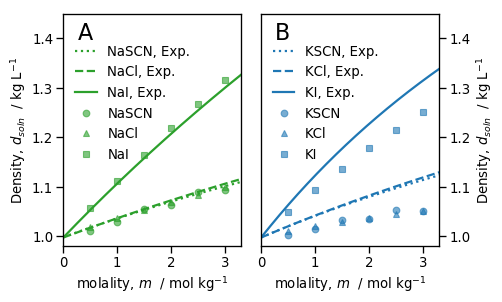

In [21]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex=False, sharey=False)
m = np.linspace(0,3.6,360) # molalities
ax1.plot(m, d_nascn(m2M_nascn(m,'NaSCN')),color=colors[2],ls='dotted',lw=2,label='NaSCN, Exp.')
ax1.plot(m, d_AH(m,'NaCl'),color=colors[2],lw=2,ls='dashed',label='NaCl, Exp.')
ax1.plot(m, d_AH(m,'NaI'),color=colors[2],lw=2,label='NaI, Exp.')
ax2.plot(m, d_kscn(m),color=colors[0],lw=2,ls='dotted',label='KSCN, Exp.')
ax2.plot(m, d_AH(m,'KCl'),color=colors[0],lw=2,ls='dashed',label='KCl, Exp.')
ax2.plot(m, d_ki(m,'KI'),color=colors[0],lw=2,label='KI, Exp.')
ax1.plot(df_dens.index,df_dens['NaSCN'].values,color=colors[2],lw=0,marker='o',alpha=0.6,label='NaSCN')
ax1.plot(df_dens.index,df_dens['NaCl'].values,color=colors[2],lw=0,marker='^',alpha=0.6,label='NaCl')
ax1.plot(df_dens.index,df_dens['NaI'].values,color=colors[2],lw=0,marker='s',alpha=0.6,label='NaI')
ax2.plot(df_dens.index,df_dens['KSCN'].values,color=colors[0],lw=0,marker='o',alpha=0.6,label='KSCN')
ax2.plot(df_dens.index,df_dens['KCl'].values,color=colors[0],lw=0,marker='^',alpha=0.6,label='KCl')
ax2.plot(df_dens.index,df_dens['KI'].values,color=colors[0],lw=0,marker='s',alpha=0.6,label='KI')
for ax in (ax1,ax2):
    ax.set_xlim(0,3.3); ax.set_ylim(.98,1.45); ax.set_xlabel('molality, $m$  / mol kg$^{-1}$')
    ax.set_ylabel(r'Density, $d_{soln}$  / kg L$^{-1}$')
    ax.legend(frameon=False,handlelength=1.6,fontsize=12)
    bb = ax.get_legend().get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    bb.y1 -= .08
    ax.get_legend().set_bbox_to_anchor(bb, transform = ax.transAxes)
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position('left')            
ax1.set_xticks([0,1,2,3])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_xticks([0,1,2,3])
ax1.annotate('A',xy=(0.08,.89), fontsize=20, xycoords='axes fraction')
ax2.annotate('B',xy=(0.08,.89), fontsize=20, xycoords='axes fraction')
f.tight_layout(w_pad=.5)
f.savefig('figs/fig3.pdf')
plt.show()

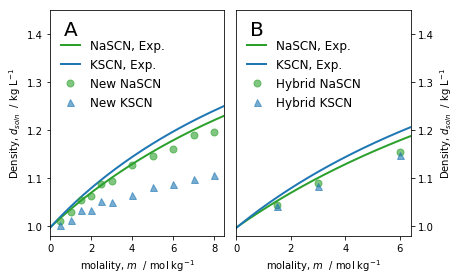

In [16]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex=False, sharey=False)
m = np.linspace(0,8.6,660) # molalities
ax1.plot(m, d_nascn(m2M_nascn(m,'NaSCN')),color=colors[2],ls='-',lw=2,label='NaSCN, Exp.')
ax1.plot(m, d_kscn(m),color=colors[0],lw=2,ls='-',label='KSCN, Exp.')
ax2.plot(m, d_nascn(m2M_nascn(m,'NaSCN')),color=colors[2],ls='-',lw=2,label='NaSCN, Exp.')
ax2.plot(m, d_kscn(m),color=colors[0],lw=2,ls='-',label='KSCN, Exp.')
ax1.plot(df_dens.index,df_dens['NaSCN'].values,color=colors[2],ms=7,
         lw=0,marker='o',alpha=0.6,label='New NaSCN')
ax1.plot(df_dens.index,df_dens['KSCN'].values,color=colors[0],ms=7,
         lw=0,marker='^',alpha=0.6,label='New KSCN')
ax2.plot(df_dens_ourHvdV.index,df_dens_ourHvdV['NaSCN'].values,color=colors[2],ms=7,
         lw=0,marker='o',alpha=0.6,label='Hybrid NaSCN')
ax2.plot(df_dens_ourHvdV.index,df_dens_ourHvdV['KSCN'].values,color=colors[0],ms=7,
         lw=0,marker='^',alpha=0.6,label='Hybrid KSCN')
#ax1.plot(df_dens_bian.index,df_dens_bian['NaSCN'].values,color=colors[2],ms=7,
#         lw=0,marker='p',alpha=0.6,label='NaSCN Bian et al.')
#ax1.plot(df_dens_bian.index,df_dens_bian['KSCN'].values,color=colors[0],ms=7,
#         lw=0,marker='*',alpha=0.6,label='KSCN Bian et al.')
for ax in (ax1,ax2):
    ax.set_xlim(0,8.5); ax.set_ylim(.98,1.45); ax.set_xlabel('molality, $m$  / mol kg$^{-1}$')
    ax.set_ylabel(r'Density, $d_{soln}$  / kg L$^{-1}$')
    ax.legend(frameon=False,handlelength=1.6,fontsize=12,loc='upper left')
    bb = ax.get_legend().get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    bb.y1 -= .08
    ax.get_legend().set_bbox_to_anchor(bb, transform = ax.transAxes)
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position('left')            
ax1.set_xticks([0,2,4,6,8])
ax2.yaxis.tick_right()
ax.set_xlim(0,6.4)
ax2.yaxis.set_label_position('right')
ax2.set_xticks([0,2,4,6])
ax1.annotate('A',xy=(0.08,.89), fontsize=20, xycoords='axes fraction')
ax2.annotate('B',xy=(0.08,.89), fontsize=20, xycoords='axes fraction')
f.tight_layout(w_pad=.5)
f.savefig('figs/figS5.pdf')
plt.show()

## Calculating $\Delta N_{+-}$
In the next cells, we will compute the excess cation-anion numbers, $\Delta N_{+-}$. This is done by integrating the cation-ion RDF, $\Delta g_{+-}$, instead of the ion-ion and water-ion RDFs, $\Delta g_{cc}$ and $\Delta g_{wc}$, as we have done before. The purpose is to evaluate the difference in pairing between Na$^{+}$ and K$^{+}$ with the studied anions.

In [23]:
def IonPair(rho_an, N_c, g_ca, V, r, cation, anion, rdfAtom, limits=np.array([0])):
    """ This function calculates the corrected anion–cation RDF, finds the radial distances enclosing 
    the coordination shells (CIP, SIP, 2SIP), and computes the excess coordination numbers in a salt solutions
    at a given concentration. It takes eight arguments:
    - rho_an: anion number density
    - N_c: number of cations
    - g_ca: cation–anion RDF
    - V: volume of the simulation box
    - cation: name of the cation
    - anion: name of the anion
    - rdfAtom: 'S1', 'C2', 'N3', 'C', I', or 'Cl'
    - limits: radial distances that determine the coordination shells (CIP, SIP, 2SIP)
    It returns:
    - excess coordination numbers (CIP, SIP, 2SIP, C, SUM) 
    - limits: radial distances that determine the coordination shells (CIP, SIP, 2SIP)
    - g_ca_corr: anion–cation RDF corrected """
    truncInd = 100
    order = 4
    dr = r[1]-r[0]
    N_ca = rho_an * 4 * pi * np.trapz( ( g_ca - 1 ) * r ** 2, r ) 
    Vn = 4*pi/3*r**3 / V # Calculating vector with remaining volume, which depends on r
    # Calculating correction by Ganguly and van der Vegt DOI: 10.1021/ct301017q 
    corr_func = N_c / 2 * ( 1 - Vn ) / ( N_c / 2 * ( 1 - Vn ) - N_ca - 0) 
    corr = corr_func[truncInd] 
    g_ca_corr = g_ca * corr # Calculating the corrected cation-anion rdf
    # Calculating the corrected cation-anion excess coordination number
    if limits.size == 1:
        limits = np.append(limits, argrelextrema(g_ca_corr, np.less, order = order))
        limits = np.append(limits[:4],truncInd)
        # Last index given manually since it could not be obtained for the SCN salts with the function used above
        if cation.upper() == 'NA' and anion == 'SCN':
            limits[2] = 65 if (rdfAtom[0] == 'C') else 60 if (rdfAtom[0] == 'S') else limits[2]
            limits[3] = 86 if (rdfAtom[0] in ['C','S']) else limits[3]
        if cation == 'K' and anion == 'SCN':
            limits[1] = 55 if (rdfAtom[0] == 'C') else limits[1]
            limits[2] = 75 if (rdfAtom[0] == 'C') else 85 if (rdfAtom[0] == 'S') else limits[2]
            limits[3] = 93 
    N_pair_all = np.empty(0) 
    # Initializing variable representing the sum of all partial excess cation-anion coordination numbers
    for i in range(limits.size-1):
        b = limits[i]
        e = limits[i+1]
        # Calculating running integral describing the current partial 
        # excess cation-anion coordination number, CIP, SIP or 2SIP
        N_ca_corr_part = np.trapz( ( g_ca_corr[b:e] - 1 ) *r[b:e]*r[b:e], r[b:e] )
        # Taking the last value of the running integral to obtain the partial 
        # excess cation-anion coordination number 
        N_pair_all = np.append(N_pair_all, rho_an * 4 * pi * N_ca_corr_part)
    # Calculating the sum of all partial excess cation-anion coordination numbers
    # Calculating the full excess cation-anion coordination number
    N_ca_corr = np.trapz( ( g_ca_corr[:truncInd] - 1 ) * (r[:truncInd] ** 2), r[:truncInd] )
    N_pair_all = np.append(N_pair_all, rho_an * 4 * pi * N_ca_corr)
    # Assigning values to variables representing partial excess cation-anion 
    # coordination numbers (CIP, SIP and 2SIP)
    # Creating vector storing CIP, SIP, 2SIP and the full excess cation-anion coordination numbers
    #if cation is 'K' and anion is 'SCN':
    #    plt.plot(r, (g_ca_corr-1)*r*r, lw=1)
    return N_pair_all, limits, g_ca_corr

In [24]:
def PlotIonPair(ff,cations,anions,rdfAtoms,conc_m,subplot):  
    """ This function generates bar plots showing the excess coordination numbers in salt solutions
    of a given concentration. It takes six arguments:
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - cation: 'K' or 'Na'
    - anion: 'Cl', 'I', 'SCN'
    - rdfAtom: 'S1', 'C2', 'N3', 'C', I', or 'Cl'
    - conc_m: molality (mol/kg)
    - subplot: Axes object specifying the subplot """
    xpos = 0.5; xpos_avg = 0; yposMin = 0; yposMax = 0
    for anIndex, anion in enumerate(anions):
        minVal = 10      
        minus = '-' if ( rdfAtoms[anIndex] in [anion,'C'] ) else rdfAtoms[anIndex].lower()        
        for cation in cations:
            wdir = WORKDIR+'/bulk/rdfs/'+ff+'/spce/'+cation.lower()+anion.lower()+'/'+ str(conc_m)+'m/'
            block_range = np.arange(1,19,1)            
            cnt = 0 # Initializing index to make trajectory only to be read once            
            g_ca_avg = 0 # Initializing radial distribution function of ion around ion
            V_avg = 0; rho_c_avg = 0; N_pair_all = np.empty(0)  
            avgs = [g_ca_avg, V_avg, rho_c_avg]
            for block in block_range: 
                if os.path.isfile( wdir+'g_+'+minus+'_'+str(block) ):  # if files exist, use those
                    g_ca = np.loadtxt(wdir+'g_+'+minus+'_'+str(block))
                    avgs[0] += g_ca/block_range.size
                    r = np.loadtxt(wdir+'r_'+str(block))
                    V = np.loadtxt(wdir+'V_'+str(block))
                    avgs[1] += V/block_range.size 
                    rho_c = np.loadtxt(wdir+'rho_c_'+str(block))
                    avgs[2] += rho_c/block_range.size 
                # if simulation output files exist, use those
                elif os.path.isfile( wdir+'out.pdb' ) and os.path.isfile( wdir+'out.dcd' ):
                    # Computing properties based on structure (out.pdb) trajectory file (out.dcd) 
                    # obtained from simulation protocol
                    while (cnt < 1):                        
                        struct = md.load_pdb(wdir+'out.pdb')
                        # Number of ions           
                        sel = struct.topology.select('name '+cation+' or name '+rdfAtoms[anIndex])
                        print("Reading in trajectory...")
                        traj = md.load_dcd(wdir+'out.dcd', top = struct, atom_indices = sel)
                        cnt += 1
                    avgs = DryTrajAnalysis(traj,block,block_range.size,cation,rdfAtoms[anIndex],wdir,avgs)
                else:
                    print("The necessary files are not available in the current working directory")               
                N_c = rho_c*V 
                rho_an = rho_c/2
                N_pair_block, lims, g_ca_corr = IonPair(rho_an,N_c,g_ca,V,r,cation,anion,rdfAtoms[anIndex])
                N_pair_all = np.append(N_pair_all, N_pair_block)                
            N_pair, lims, g_ca_corr = IonPair(avgs[2]/2,avgs[2]*avgs[1], 
                                avgs[0],avgs[1],r,cation,anion,rdfAtoms[anIndex])
            print(anion,cation,lims)
            N_pair_all = N_pair_all.reshape((block_range.size,N_pair.size)).T
            N_pair_avg = np.average(N_pair_all,axis=1)
            N_pair_std = np.std(N_pair_all,axis=1)
            # Defining value to use for positioning of text below bars
            if minVal > np.min(N_pair_avg):
                minVal = np.min(N_pair_avg) 
            if cation is cations[-1]:
                if minVal > 0:
                    minVal = 0
            # Defining values used for positioning of the bar that is going to be plotted
            if cation is cations[0]:
                xpos = xpos+0.15
                xpos_avg = xpos
            else:
                xpos_avg = xpos
                xpos = xpos+0.065
                xpos_avg = (xpos_avg + xpos)/len(cations)                
            bars = { N_pair_avg[0]:{'label':'$\Delta N_{CIP}$','color':colors[3],
                                           'ecolor':colors[3],'hatch':None,'yerr':N_pair_std[0]},
                            N_pair_avg[1]:{'label':'$\Delta N_{SIP}$','color':'w',
                                           'ecolor':colors[7],'hatch':'\\\\','yerr':N_pair_std[1]},
                            N_pair_avg[2]:{'label':'$\Delta N_{2SIP}$','color':colors[7],
                                           'ecolor':colors[7],'hatch':None,'yerr':N_pair_std[2]},
                            N_pair_avg[4]:{'label':'$\Delta N_{+-}$','color':'w',
                                           'ecolor':colors[3],'hatch':'/////','yerr':N_pair_std[4]} }
            df = pd.DataFrame(bars)
            # Plotting bars representing partial and full excess cation-anion coordination numbers
            if anion is anions[-1] and cation is cations[-1]:
                for bar,w in zip(df.columns[::-1],[0.045,0.035,0.025,0.015]):
                    subplot.bar(xpos, bar, width=w, edgecolor=df.loc['ecolor'][bar], 
                                color=df.loc['color'][bar],label=df.loc['label'][bar],align='center', 
                                hatch=df.loc['hatch'][bar],yerr=df.loc['yerr'][bar],
                                error_kw=dict(elinewidth=1.5,ecolor=df.loc['ecolor'][bar],capsize=4,capthick=1.5)) 
            else:
                for bar,w in zip(df.columns[::-1],[0.045,0.035,0.025,0.015]):
                    subplot.bar(xpos, bar, width=w, edgecolor=df.loc['ecolor'][bar], 
                                color=df.loc['color'][bar],align='center', 
                                hatch=df.loc['hatch'][bar],yerr=df.loc['yerr'][bar],
                                error_kw=dict(elinewidth=1.5,ecolor=df.loc['ecolor'][bar],capsize=4,capthick=1.5)) 
                subplot.axhline(y=0, color='k',lw=2)
                subplot.set_xticks([])
            # Plotting text above bars
            subplot.text(xpos, np.max(N_pair_avg) + N_pair_std[4] + 0.01, cation+'$^+$', 
                         ha='center', va='bottom', fontsize=12) 
            if cation is cations[-1]:
                # Plotting text below bars
                subplot.text(xpos_avg, -.07, anion+'$^-$', ha='center', va='bottom',fontsize=12) 
                subplot.legend(loc=0, frameon=False) # Plotting legend
                subplot.set_ylabel('$\Delta N$') # Plotting label of y-axis

In [25]:
def IonPairRDF(ff,cation,anion,rdfAtom,conc_m,subplot):
    """ This function plots RDFs with a color scheme showing the intervals of radial distances 
    used in the ion-paring analysis. It takes six arguments:
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - cation: 'K' or 'Na'
    - anion: 'Cl', 'I', 'SCN'
    - rdfAtom: 'S', 'C', 'N', I' or 'Cl'
    - conc_m: molality (mol/kg)
    - subplot: Axes object specifying the subplot """                   
    wdir = WORKDIR+'/bulk/rdfs/'+ff+'/spce/'+cation.lower()+anion.lower()+'/'+ str(conc_m)+'m/'   
    # Defining number of blocks to read in from the trajectory (in total 18 blocks)
    block_range = np.arange(1,19,1)    
    cnt = 0 # Initializing index to make trajectory only to be read once    
    minus = '-' if ( rdfAtom in [anion,'C'] ) else rdfAtom.lower()
    g_ca_avg = 0 # Initializing radial distribution function of ion around ion
    V_avg = 0; rho_c_avg = 0 
    avgs = [g_ca_avg, V_avg, rho_c_avg]
    for block in block_range: 
        if os.path.isfile(wdir+'g_+'+minus+'_'+str(block)):  # if file exists, use that
            g_ca = np.loadtxt(wdir+'g_+'+minus+'_'+str(block))
            avgs[0] += g_ca/block_range.size
            r = np.loadtxt(wdir+'r_'+str(block))
            V = np.loadtxt(wdir+'V_'+str(block))
            avgs[1] += V/block_range.size # Calculating average among blocks
            rho_c = np.loadtxt(wdir+'rho_c_'+str(block))
            avgs[2] += rho_c/block_range.size
        # if simulation output files exist, use those
        elif os.path.isfile( wdir+'out.pdb' ) and os.path.isfile( wdir+'out.xtc' ):
            # Computing properties based on structure (out.pdb) trajectory file (out.dcd) 
            # obtained from simulation protocol
            while (cnt < 1):                                
                struct = md.load_pdb(wdir+'out.pdb')
                sel = struct.topology.select('name '+cation+' or name '+rdfAtom)
                print("Reading in trajectory...")
                traj = md.load_dcd(wdir+'out.xtc', top = struct, atom_indices = sel)
                cnt += 1
            avgs = DryTrajAnalysis(traj,block,block_range.size,cation,rdfAtoms[anIndex],wdir,avgs)
        else:
            print("The necessary files are not available in the current working directory")
    N_pair, lims, g_ca_corr = IonPair(avgs[2]/2, avgs[2]*avgs[1], 
                                avgs[0], avgs[1],r,cation,anion,rdfAtom)
    if cation is 'Na':
        color = colors[2]
    elif cation is 'K':
        color = colors[0]
    subplot.set_ylabel('$g(r)$')
    r = np.arange(0, len(g_ca_corr)*0.01, 0.01)
    subplot.plot(r, g_ca_corr, color, lw=3, label=cation+anion)
    subplot.fill_between(r[lims[0]:lims[1]], 0, g_ca_corr[lims[0]:lims[1]], color=colors[3])  
    subplot.fill_between(r[lims[1]:lims[2]], -.1, g_ca_corr[lims[1]:lims[2]], facecolor='none', 
                         edgecolor=colors[7], hatch='\\\\', lw=0)
    subplot.fill_between(r[lims[2]:lims[3]], 0, g_ca_corr[lims[2]:lims[3]], color=colors[7]) 
    subplot.fill_between(r[lims[3]:lims[4]], -.1, g_ca_corr[lims[3]:lims[4]], facecolor='none', 
                         edgecolor=colors[3], hatch='/////', lw=0)
    subplot.set_xlim(0.2, 1)
    subplot.set_yticks([0,2,4,6,8])
    subplot.set_xticks([.3,.6,.9])
    subplot.set_ylim(-.5, 8.5)
    subplot.legend(title='A',loc='upper right',handlelength=1, handletextpad=0.5)

## Excess Coordination Numbers–SCN$^-$ C atom

No handles with labels found to put in legend.


SCN Na [  0  38  65  86 100]
SCN K [  0  55  75  93 100]
Cl Na [  0  36  60  82 100]
Cl K [  0  47  70  92 100]


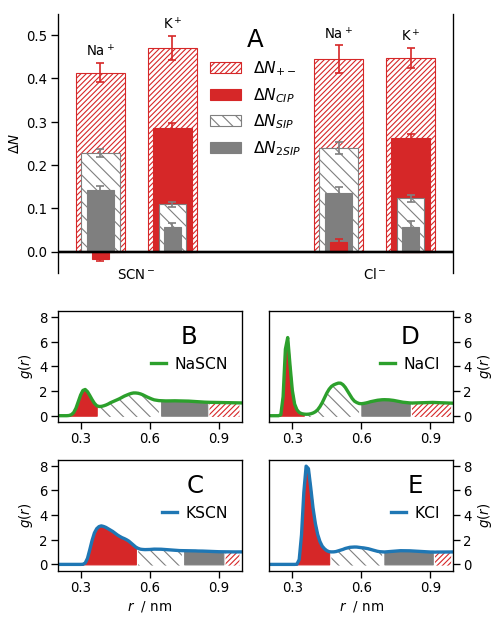

No handles with labels found to put in legend.


SCN Na [  0  38  65  86 100]
SCN K [  0  55  75  93 100]
Cl Na [  0  36  60  83 100]
Cl K [  0  48  70  95 100]


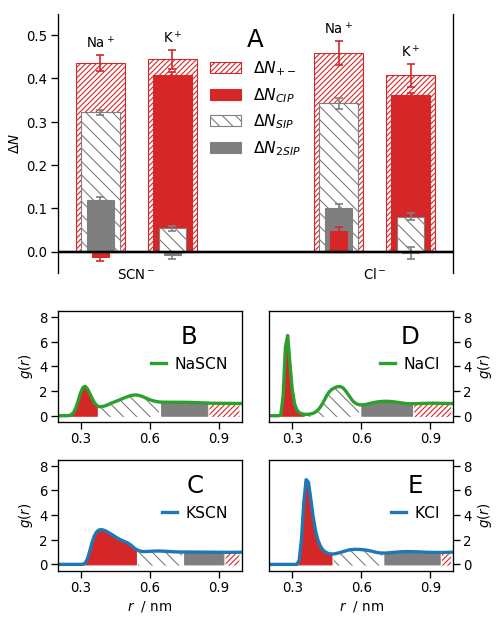

In [26]:
for conc_m,name in zip([1.0,2.0],['fig4','figS6']):
    plt.rcParams.update({'figure.figsize': [6.5, 8]})
    ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2,rowspan=2)
    ax2 = plt.subplot2grid((4, 2), (2, 0))
    ax3 = plt.subplot2grid((4, 2), (3, 0))
    ax4 = plt.subplot2grid((4, 2), (2, 1))
    ax5 = plt.subplot2grid((4, 2), (3, 1))
    PlotIonPair('ff_our',['Na','K'],['SCN','Cl'],['C','Cl'],conc_m,ax1)
    ax1.tick_params(labelbottom='off')
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_ylim(-.05,.55)
    IonPairRDF('ff_our','Na','SCN','C',conc_m,ax2)
    #ax2.set_ylim(0,8)
    IonPairRDF('ff_our','K','SCN','C',conc_m,ax3)
    #ax3.set_ylim(0,8)
    ax3.set_xlabel('$r$  / nm')
    IonPairRDF('ff_our','Na','Cl','Cl',conc_m,ax4)
    #ax4.set_ylim(0,8)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    IonPairRDF('ff_our','K','Cl','Cl',conc_m,ax5)
    #ax5.set_ylim(0,8)
    ax5.yaxis.tick_right()
    ax5.yaxis.set_label_position("right")
    ax5.set_xlabel('$r$  / nm')    
    for ax,letter in zip([ax1,ax2,ax3,ax4,ax5],['A','B','C','D','E']):
        ax.get_legend().set_title(letter,prop={'size':22})
    plt.tight_layout(w_pad=1,h_pad=.5)
    plt.savefig('figs/'+name+'.pdf')
    plt.show()

## Excess Coordination Numbers–SCN$^-$ S atom

No handles with labels found to put in legend.


SCN Na [  0  36  60  86 100]
SCN K [  0  55  85  93 100]
Cl Na [  0  36  60  82 100]
Cl K [  0  47  70  92 100]


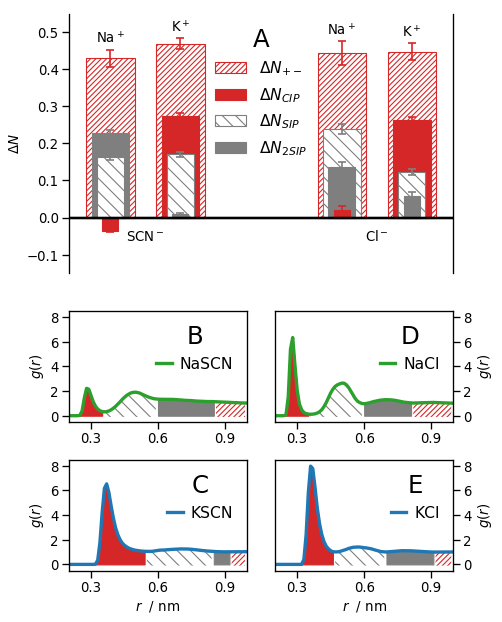

No handles with labels found to put in legend.


SCN Na [  0  36  60  86 100]
SCN K [  0  56  85  93 100]
Cl Na [  0  36  60  82 100]
Cl K [  0  47  70  93 100]


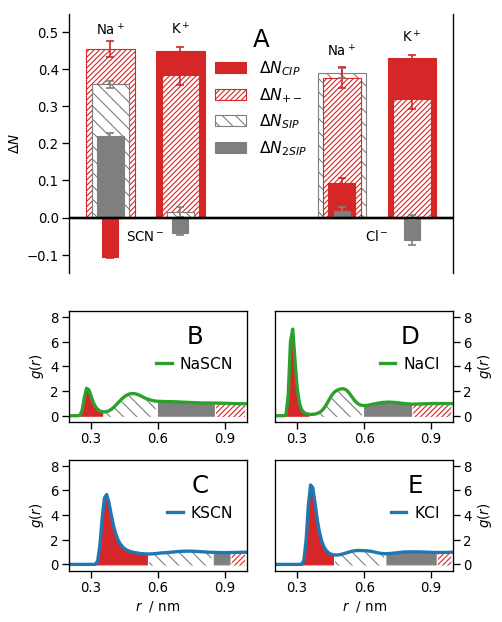

In [27]:
for conc_m in [1.0,3.0]:    
    plt.rcParams.update({'figure.figsize': [6.5, 8]})
    ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2,rowspan=2)
    ax2 = plt.subplot2grid((4, 2), (2, 0))
    ax3 = plt.subplot2grid((4, 2), (3, 0))
    ax4 = plt.subplot2grid((4, 2), (2, 1))
    ax5 = plt.subplot2grid((4, 2), (3, 1))
    PlotIonPair('ff_our',['Na','K'],['SCN','Cl'],['S1','Cl'],conc_m,ax1)
    ax1.tick_params(labelbottom='off')
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_ylim(-.15,.55)
    IonPairRDF('ff_our','Na','SCN','S1',conc_m,ax2)
    #ax2.set_ylim(0,8)
    IonPairRDF('ff_our','K','SCN','S1',conc_m,ax3)
    #ax3.set_ylim(0,8)
    ax3.set_xlabel('$r$  / nm')
    IonPairRDF('ff_our','Na','Cl','Cl',conc_m,ax4)
    #ax4.set_ylim(0,8)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    IonPairRDF('ff_our','K','Cl','Cl',conc_m,ax5)
    #ax5.set_ylim(0,8)
    ax5.yaxis.tick_right()
    ax5.yaxis.set_label_position("right")
    ax5.set_xlabel('$r$  / nm')   
    for ax,letter in zip([ax1,ax2,ax3,ax4,ax5],['A','B','C','D','E']):
        ax.get_legend().set_title(letter,prop={'size':22})

    plt.tight_layout(w_pad=1,h_pad=.5)
    plt.show()

## Excess Coordination Numbers–SCN$^-$ N atom

No handles with labels found to put in legend.


SCN Na [  0  33  57  82 100]
SCN K [  0  42  70  93 100]
Cl Na [  0  36  60  82 100]
Cl K [  0  47  70  92 100]


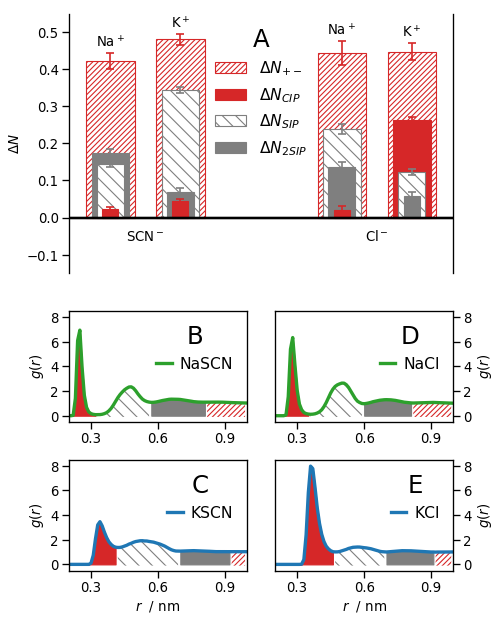

No handles with labels found to put in legend.


SCN Na [  0  33  58  81 100]
SCN K [  0  42  69  93 100]
Cl Na [  0  36  60  82 100]
Cl K [  0  47  70  93 100]


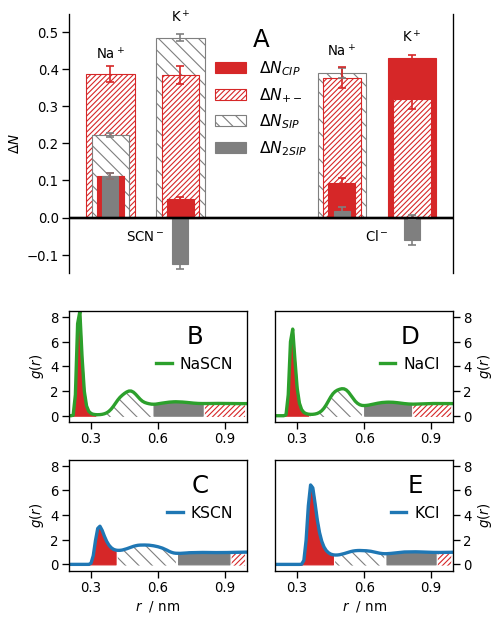

In [28]:
for conc_m in [1.0,3.0]:    
    plt.rcParams.update({'figure.figsize': [6.5, 8]})    
    ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2,rowspan=2)
    ax2 = plt.subplot2grid((4, 2), (2, 0))
    ax3 = plt.subplot2grid((4, 2), (3, 0))
    ax4 = plt.subplot2grid((4, 2), (2, 1))
    ax5 = plt.subplot2grid((4, 2), (3, 1))
    PlotIonPair('ff_our',['Na','K'],['SCN','Cl'],['N3','Cl'],conc_m,ax1)
    ax1.tick_params(labelbottom='off')
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_ylim(-.15,.55)
    IonPairRDF('ff_our','Na','SCN','N3',conc_m,ax2)
    #ax2.set_ylim(0,8)
    IonPairRDF('ff_our','K','SCN','N3',conc_m,ax3)
    #ax3.set_ylim(0,8)
    ax3.set_xlabel('$r$  / nm')
    IonPairRDF('ff_our','Na','Cl','Cl',conc_m,ax4)
    #ax4.set_ylim(0,8)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    IonPairRDF('ff_our','K','Cl','Cl',conc_m,ax5)
    #ax5.set_ylim(0,8)
    ax5.yaxis.tick_right()
    ax5.yaxis.set_label_position("right")
    ax5.set_xlabel('$r$  / nm')    
    for ax,letter in zip([ax1,ax2,ax3,ax4,ax5],['A','B','C','D','E']):
        ax.get_legend().set_title(letter,prop={'size':22})
    plt.tight_layout(w_pad=1,h_pad=.5)
    plt.show()

We interpret the plot produced in the last cell to discuss the difference in ion pairing between the various salts. The first region from the left in the RDFs is related to $N_{CIP}$, the second to $N_{SIP}$, the third to $N_{2SIP}$ and the fourth to $C$, which adds the last part of the integrated RDF, up to the truncation distance which is 1.0 nm, to the total excess cation-anion coordination number, $N_{+-}$.

## Exceess Coordination Numbers _vs._ Molality

In [29]:
def ExcessCoordNum(ff,cation,anion,conc_m,rdfAtom):  
    """ This function calculates excess coordination numbers for a solution of a given molality:
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - cation: 'K' or 'Na'
    - anion: 'Cl', 'I', 'SCN'
    - rdfAtom: 'S1', 'C2', 'N3', 'C', I', or 'Cl'
    - conc_m: molality (mol/kg)
    - subplot: Axes object specifying the subplot """
    wdir = WORKDIR+'/bulk/rdfs/'+ff+'/spce/'+cation.lower()+anion.lower()+'/'+ str(conc_m)+'m/'
    block_range = np.arange(1,19,1)    
    cnt = 0 # Initializing index to make trajectory only to be read once    
    minus = '-' if ( rdfAtom==anion or rdfAtom=='C' ) else rdfAtom.lower() 
    g_ca_avg = 0 # Initializing radial distribution function of ion around ion
    V_avg = 0; rho_c_avg = 0; N_pair_all = np.empty(0); g_ca_cip = np.empty(0); g_ca_sip = np.empty(0)
    avgs = [g_ca_avg, V_avg, rho_c_avg]
    for block in block_range: 
        if os.path.isfile( wdir+'g_+'+minus+'_'+str(block) ):  # if files exist, use those
            g_ca = np.loadtxt(wdir+'g_+'+minus+'_'+str(block))
            avgs[0] += g_ca/block_range.size
            r = np.loadtxt(wdir+'r_'+str(block))
            V = np.loadtxt(wdir+'V_'+str(block))
            avgs[1] += V/block_range.size 
            rho_c = np.loadtxt(wdir+'rho_c_'+str(block))
            avgs[2] += rho_c/block_range.size 
        # if simulation output files exist, use those
        elif os.path.isfile( wdir+'out.pdb' ) and os.path.isfile( wdir+'out.xtc' ):
            # Computing properties based on structure (out.pdb) trajectory file (out.dcd) 
            # obtained from simulation protocol
            while (cnt < 1):                        
                struct = md.load_pdb(wdir+'out.pdb')
                # Number of ions           
                sel = struct.topology.select('name '+cation+' or name '+rdfAtom)
                print("Reading in trajectory...")
                traj = md.load_xtc(wdir+'out.xtc', top = struct, atom_indices = sel)
                cnt += 1
            avgs = DryTrajAnalysis(traj,block,block_range.size,cation,rdfAtom,wdir,avgs)
        else:
            print("The necessary files are not available in the current working directory")               
        N_c = rho_c*V 
        rho_an = rho_c/2
        N_pair_block, lims, g_ca_corr = IonPair(rho_an, N_c, g_ca, V, r, cation, anion, rdfAtom)
        g_ca_cip = np.append(g_ca_cip, g_ca_corr[:lims[1]].max())
        g_ca_sip = np.append(g_ca_sip, g_ca_corr[lims[1]:lims[2]].max())
        N_pair_all = np.append(N_pair_all, N_pair_block)                
    N_pair, lims, g_ca_corr = IonPair(avgs[2]/2,avgs[2]*avgs[1],avgs[0],avgs[1],r,cation,anion,rdfAtom)
    N_pair_all = N_pair_all.reshape((block_range.size,N_pair.size)).T
    N_pair_avg = np.average(N_pair_all,axis=1)
    N_pair_std = np.std(N_pair_all,axis=1)
    pmf_cip = (-np.log(g_ca_cip.mean()), g_ca_cip.std()/g_ca_cip.mean())
    pmf_sip = (-np.log(g_ca_sip.mean()), g_ca_sip.std()/g_ca_sip.mean())
    return N_pair_avg, N_pair_std, pmf_cip, pmf_sip

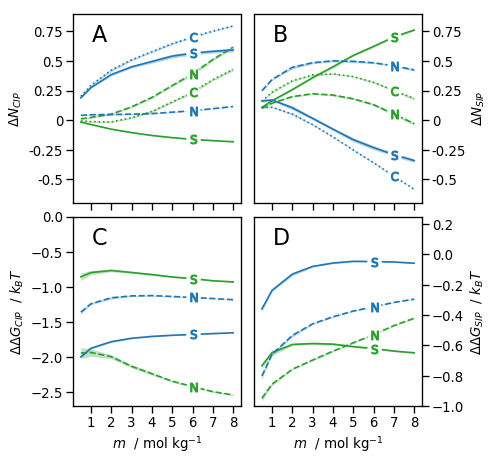

In [30]:
plt.rcParams.update({'figure.figsize': [6.5, 6]})
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
concs_m = np.array([.5,1,2,3,4,5,6,7,8])
for cation,c in zip(['NA','K'],[colors[2],colors[0]]):
    for atom_scn, marker in zip(['S1','C2','N3'],['$\mathrm{S}$','$\mathrm{C}$','$\mathrm{N}$']):
        cip = np.empty(0); sip = np.empty(0)
        pmf_cip = np.empty(0); pmf_sip = np.empty(0)
        for conc in concs_m:
            a,b,pc,ps = ExcessCoordNum('ff_our',cation,'SCN','{:1.1f}'.format(conc),atom_scn)
            cip = np.append(cip,[a[0],b[0]]); sip = np.append(sip,[a[1],b[1]])
            pmf_cip = np.append(pmf_cip,pc); pmf_sip = np.append(pmf_sip,ps)
        cip = cip.reshape((int(cip.size/2.),2)); sip = sip.reshape((int(sip.size/2.),2))
        pmf_cip = pmf_cip.reshape((int(pmf_cip.size/2.),2))
        pmf_sip = pmf_sip.reshape((int(pmf_sip.size/2.),2))
        #ax1.errorbar(concs_m,cip[:,0],cip[:,1],color=c,lw=0,marker='o',
        #           markeredgecolor=None,ms=3,
        #           elinewidth=1.,capsize=2,capthick=1.)
        #ax2.errorbar(concs_m,sip[:,0],sip[:,1],color=c,lw=0,marker='o',
        #           markeredgecolor=None,ms=3,
        #           elinewidth=1.,capsize=2,capthick=1.)
        ls = '-' if (atom_scn == 'S1') else 'dotted' if (atom_scn == 'C2') else '--'
        ax1.plot(concs_m,cip[:,0],color=c,lw=1.5,ls=ls)
        ax1.fill_between(concs_m,cip[:,0]+cip[:,1],cip[:,0]-cip[:,1],color=c,lw=0,alpha=.3)
        ax2.plot(concs_m,sip[:,0],color=c,lw=1.5,ls=ls)
        ax2.fill_between(concs_m,sip[:,0]+sip[:,1],sip[:,0]-sip[:,1],color=c,lw=0,alpha=.3)
        ax1.plot(concs_m[6],cip[6,0],mfc='w',mec='w',lw=0,marker='o',ms=12,alpha=1)
        ax2.plot(concs_m[7],sip[7,0],mfc='w',mec='w',lw=0,marker='o',ms=12,alpha=1)
        ax1.plot(concs_m[6],cip[6,0],color=c,lw=0,marker=marker,mec=None,ms=8)
        ax2.plot(concs_m[7],sip[7,0],color=c,lw=0,marker=marker,mec=None,ms=8)
        if atom_scn in ['S1','N3']:
            ax3.plot(concs_m,pmf_cip[:,0],color=c,lw=1.5,ls=ls)       
            ax3.fill_between(concs_m,pmf_cip[:,0]+pmf_cip[:,1],pmf_cip[:,0]-pmf_cip[:,1],color=c,lw=0,alpha=.3)
            ax3.plot(concs_m[6],pmf_cip[6,0],color='w',lw=0,marker='o',ms=12)
            ax3.plot(concs_m[6],pmf_cip[6,0],color=c,lw=0,marker=marker,mec=None,ms=8)
            ax4.plot(concs_m,pmf_sip[:,0],color=c,lw=1.5,ls=ls)       
            ax4.fill_between(concs_m,pmf_sip[:,0]+pmf_sip[:,1],pmf_sip[:,0]-pmf_sip[:,1],color=c,lw=0,alpha=.3)
            ax4.plot(concs_m[6],pmf_sip[6,0],color='w',lw=0,marker='o',ms=12)
            ax4.plot(concs_m[6],pmf_sip[6,0],color=c,lw=0,marker=marker,mec=None,ms=8)   
ax1.set_xticks(range(1,9)); ax2.set_xticks(range(1,9))
ax3.set_xticks(range(1,9)); ax4.set_xticks(range(1,9))
ax1.set_ylim(-.7,.9); ax2.set_ylim(-.7,.9)
ax1.set_yticks(np.arange(-.5,.76,.25)); ax2.set_yticks(np.arange(-.5,.76,.25))
ax1.set_yticklabels('{:1g}'.format(i) for i in np.arange(-.5,.76,.25))
ax2.set_yticklabels('{:1g}'.format(i) for i in np.arange(-.5,.76,.25))
ax3.set_ylim(-2.7,0); ax4.set_ylim(-1,.25)
#ax3.set_yticklabels('{:1g}'.format(i) for i in np.arange(-.2,.9,.2))
#ax4.set_yticklabels('{:1g}'.format(i) for i in np.arange(-.2,.9,.2))
ax1.set_ylabel('$\Delta N_{CIP}$'); ax2.set_ylabel('$\Delta N_{SIP}$')
ax3.set_ylabel(r'$\Delta \Delta G_{CIP}$  / $k_BT$'); ax4.set_ylabel(r'$\Delta \Delta G_{SIP}$  / $k_BT$')
ax3.set_xlabel('$m$  / mol kg$^{-1}$')
ax4.set_xlabel('$m$  / mol kg$^{-1}$')
ax2.yaxis.set_ticks_position('right'); ax4.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right'); ax4.yaxis.set_label_position('right')
ax1.annotate(r'A',xy=(0.11,.85), fontsize=20, xycoords='axes fraction')
ax2.annotate(r'B',xy=(0.11,.85), fontsize=20, xycoords='axes fraction')
ax3.annotate(r'C',xy=(0.11,.85), fontsize=20, xycoords='axes fraction')
ax4.annotate(r'D',xy=(0.11,.85), fontsize=20, xycoords='axes fraction')
ax1.set_xticklabels(np.tile([''],8))
ax2.set_xticklabels(np.tile([''],8))
f.tight_layout(w_pad=.1,h_pad=.1)    
f.savefig('figs/fig5.pdf')
plt.show()

## Probability Density Distribution of Cations Around SCN$^-$
#### $m=1$ mol kg$^{-1}$ and $m=8$ mol kg$^{-1}$

(40, 80) (40, 80)
(40, 80) (40, 80)


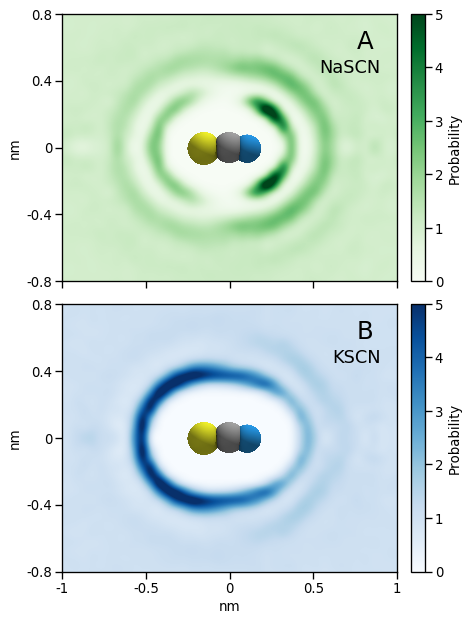

(40, 80) (40, 80)
(40, 80) (40, 80)


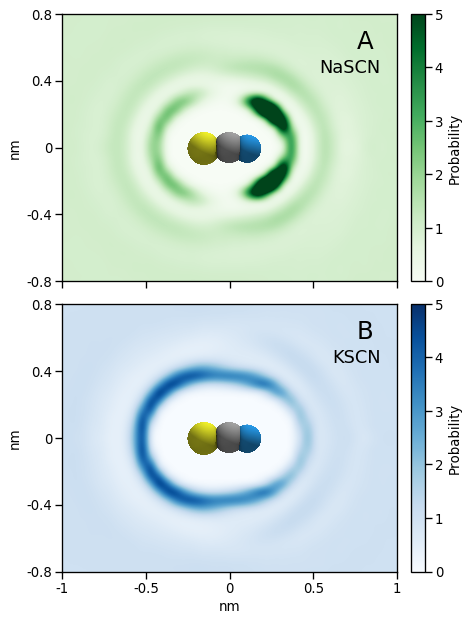

In [31]:
plt.rcParams.update({'figure.figsize': [6.5, 8]})
for molality, figname in zip([1,8],['6','S7']):
    f, ((ax1, ax2)) = plt.subplots(nrows=2)
    for cat,cm,sub in zip(['NA','K'],[plt.cm.Greens,plt.cm.Blues],[ax1,ax2]):
        folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+cat.lower()+'scn/'+str(molality)+'.0m'
        if not os.path.isfile(folder+'/scn_cat2d.p'):
            top = md.load_pdb(folder+'/out.pdb')
            # reference structure where SCN is alligned to the z-axis
            ref = md.load_pdb(WORKDIR+'/aux/scn.pdb')
            edges = np.arange(-2,2.06,0.05)
            E = edges[:-1]+(edges[1]-edges[0])/2.
            Prob = np.zeros(shape=(E.size,E.size))
            for i in top.top.select('name C2'):
                atom_sel = top.top.select('name '+cat+' or index '+str(i-1)+' or index '+str(i)+' or index '+str(i+1))
                # we load a trajectory with one SCN anion and all cations
                traj = md.load_xtc(folder+'/out.xtc', top=folder+'/out.pdb',atom_indices=atom_sel)[500:]
                # each frame is aligned with respect to the reference SCN structure
                traj = traj.superpose(ref, frame=0, atom_indices=[0,1,2], ref_atom_indices=[0,1,2])
                # we discards frames where the alignment is unprecise
                b = np.ones(shape=traj.n_frames,dtype=bool)
                for j in range(3):
                    xyz = traj.atom_slice([j]).xyz
                    xyz0 = ref.atom_slice([j]).xyz[0,0,:]
                    for k in range(3):
                        b = b*(np.abs( xyz[:,0,k]/xyz0[k] -1 ) < .01)
                traj = traj.slice(b)
                # we compute displacement vectors between C atom and Na
                pair_c2cat = traj.top.select_pairs('name C2','name '+cat)
                v = md.compute_displacements(traj,pair_c2cat)
                v = v.reshape((v.shape[0]*v.shape[1],v.shape[2]))
                # we create a histogram in the xz-plane
                x0 = v[:,0]; y0 = v[:,1]; z0 = v[:,2]
                R = np.sqrt(y0*y0+z0*z0)
                h, edges, edges = np.histogram2d(R,x0,bins=edges)
                Prob += h
            df = pd.DataFrame(data=Prob,index=E,columns=E)
            df.to_pickle(folder+'/scn_cat2d.p')
        else:
            d = pd.read_pickle(folder+'/scn_cat2d.p')
            Prob = d.values; E = d.index
        vmin=0; vmax=5
        jacobian = np.tile(((E[int(E.size/2):]+1e-4)[:,np.newaxis]),E.size)
        Prob[int(E.size/2):,:] = Prob[int(E.size/2):,:] / jacobian
        Prob = Prob / Prob[-20:-5,5:20].mean()
        print(Prob[:int(E.size/2),:].shape,Prob[:int(E.size/2)-1:-1,:].shape)
        Prob[:int(E.size/2),:] = Prob[:int(E.size/2)-1:-1,:]
        im = sub.imshow(Prob,extent=[E.min(), E.max(), E.min(), E.max()], interpolation='bicubic',
                   cmap=cm,vmin=vmin,vmax=vmax,origin='lower')
        cb = f.colorbar(im, ax=sub, label=r'Probability', pad=.03, ticks=range(vmax+1))
        cb.ax.set_yticklabels(['{:1g}'.format(i) for i in range(vmax+1)])  
        sub.set_xlim(-1,1); sub.set_ylim(-.8,.8)
        sub.set_ylabel('nm')
        sub.set_xticks(np.arange(-1,1.1,.5)); sub.set_yticks(np.arange(-.8,.9,.4))
        sub.set_xticklabels(['{:1g}'.format(i) for i in np.arange(-1,1.1,.5)])
        sub.set_yticklabels(['{:1g}'.format(i) for i in np.arange(-.8,.9,.4)])
    ax1.annotate('A',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
    ax2.annotate('B',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
    ax1.annotate('NaSCN',xy=(.95,.78), fontsize=16, xycoords='axes fraction', 
                 horizontalalignment='right')
    ax2.annotate('KSCN',xy=(.95,.78), fontsize=16, xycoords='axes fraction', 
                 horizontalalignment='right')
    img=mpl.image.imread(WORKDIR+'/aux/scn_vdw.png')
    y=img.shape[0]/4300
    x=img.shape[1]/4300
    ax1.imshow(img,interpolation='none',extent=[-x-.03,x-.03,-y,y])
    ax2.imshow(img,interpolation='none',extent=[-x-.03,x-.03,-y,y])
    ax1.set_xticklabels(np.tile([''],9))
    ax2.set_xlabel('nm')
    f.tight_layout(h_pad=.5)
    f.savefig('figs/fig'+figname+'.pdf')
    plt.show()

#### Hybrid Force Field: $m=6$ mol kg$^{-1}$ 

(40, 80) (40, 80)
(40, 80) (40, 80)


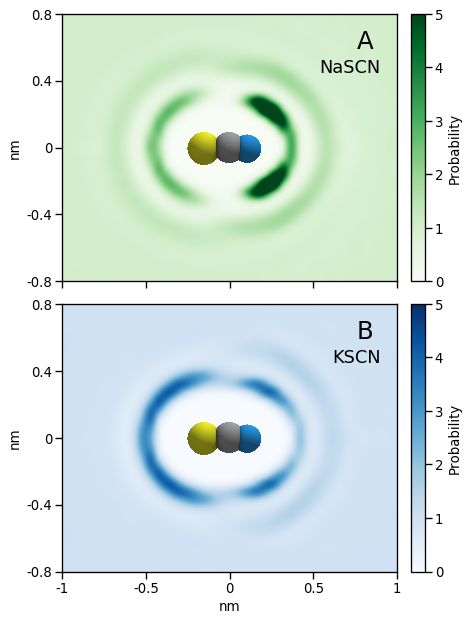

In [32]:
plt.rcParams.update({'figure.figsize': [6.5, 8]})
for molality in [6.0]:
    f, ((ax1, ax2)) = plt.subplots(nrows=2)
    for cat,cm,sub in zip(['NA','K'],[plt.cm.Greens,plt.cm.Blues],[ax1,ax2]):
        folder = WORKDIR+'/bulk/rdfs/ff_ourHvdV/spce/'+cat.lower()+'scn/'+str(molality)+'m'
        if not os.path.isfile(folder+'/scn_cat2d.p'):
            top = md.load(folder+'/npt.gro')
            atom_sel = top.top.select('not water')
            t = md.load_xtc(folder+'/npt.xtc', top=folder+'/npt.gro',atom_indices=atom_sel)[500:]
            print(t.n_atoms)
            # reference structure where SCN is alligned to the z-axis
            ref = md.load_pdb(WORKDIR+'/aux/scn.pdb')
            edges = np.arange(-2,2.05,0.05)
            E = edges[:-1]+(edges[1]-edges[0])/2.
            Prob = np.zeros(shape=(E.size,E.size))
            for i in t.top.select('name C2'):
                atom_sel = t.top.select('name '+cat+' or index '+str(i-1)+' or index '+str(i)+' or index '+str(i+1))
                # we load a trajectory with one SCN anion and all cations
                traj = t.atom_slice(atom_sel)
                #traj = md.load_xtc(folder+'/npt.xtc', top=folder+'/npt.gro',atom_indices=atom_sel)[500:]
                # each frame is aligned with respect to the reference SCN structure
                traj = traj.superpose(ref, frame=0, atom_indices=[0,1,2], ref_atom_indices=[0,1,2])
                # we discards frames where the alignment is unprecise
                b = np.ones(shape=traj.n_frames,dtype=bool)
                for j in range(3):
                    xyz = traj.atom_slice([j]).xyz
                    xyz0 = ref.atom_slice([j]).xyz[0,0,:]
                    for k in range(3):
                        b = b*(np.abs( xyz[:,0,k]/xyz0[k] -1 ) < .01)
                traj = traj.slice(b)
                # we compute displacement vectors between C atom and Na
                pair_c2cat = traj.top.select_pairs('name C2','name '+cat)
                v = md.compute_displacements(traj,pair_c2cat)
                v = v.reshape((v.shape[0]*v.shape[1],v.shape[2]))
                # we create a histogram in the xz-plane
                x0 = v[:,0]; y0 = v[:,1]; z0 = v[:,2]
                R = np.sqrt(y0*y0+z0*z0)
                h, edges, edges = np.histogram2d(R,x0,bins=edges)
                Prob += h
            df = pd.DataFrame(data=Prob,index=E,columns=E)
            df.to_pickle(folder+'/scn_cat2d.p')
        else:
            d = pd.read_pickle(folder+'/scn_cat2d.p')
            Prob = d.values; E = d.index
        vmin=0; vmax=5
        jacobian = np.tile(((E[int(E.size/2):]+1e-4)[:,np.newaxis]),E.size)
        Prob[int(E.size/2):,:] = Prob[int(E.size/2):,:] / jacobian
        Prob = Prob / Prob[-20:-5,5:20].mean()
        print(Prob[:int(E.size/2),:].shape,Prob[:int(E.size/2)-1:-1,:].shape)
        Prob[:int(E.size/2),:] = Prob[:int(E.size/2)-1:-1,:]
        im = sub.imshow(Prob,extent=[E.min(), E.max(), E.min(), E.max()], interpolation='bicubic',
                   cmap=cm,vmin=vmin,vmax=vmax,origin='lower')
        cb = f.colorbar(im, ax=sub, label=r'Probability', pad=.03, ticks=range(vmax+1))
        cb.ax.set_yticklabels(['{:1g}'.format(i) for i in range(vmax+1)])  
        sub.set_xlim(-1,1); sub.set_ylim(-.8,.8)
        sub.set_ylabel('nm')
        sub.set_xticks(np.arange(-1,1.1,.5)); sub.set_yticks(np.arange(-.8,.9,.4))
        sub.set_xticklabels(['{:1g}'.format(i) for i in np.arange(-1,1.1,.5)])
        sub.set_yticklabels(['{:1g}'.format(i) for i in np.arange(-.8,.9,.4)])
    ax1.annotate('A',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
    ax2.annotate('B',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
    ax1.annotate('NaSCN',xy=(.95,.78), fontsize=16, xycoords='axes fraction', 
                 horizontalalignment='right')
    ax2.annotate('KSCN',xy=(.95,.78), fontsize=16, xycoords='axes fraction', 
                 horizontalalignment='right')
    img=mpl.image.imread(WORKDIR+'/aux/scn_vdw.png')
    y=img.shape[0]/4300
    x=img.shape[1]/4300
    ax1.imshow(img,interpolation='none',extent=[-x-.03,x-.03,-y,y])
    ax2.imshow(img,interpolation='none',extent=[-x-.03,x-.03,-y,y])
    ax1.set_xticklabels(np.tile([''],9))
    ax2.set_xlabel('nm')
    f.tight_layout(h_pad=.5)
    plt.show()

## Probability _vs._ C–cation and S–C–Cation Angle
#### $m=8$ mol kg$^{-1}$

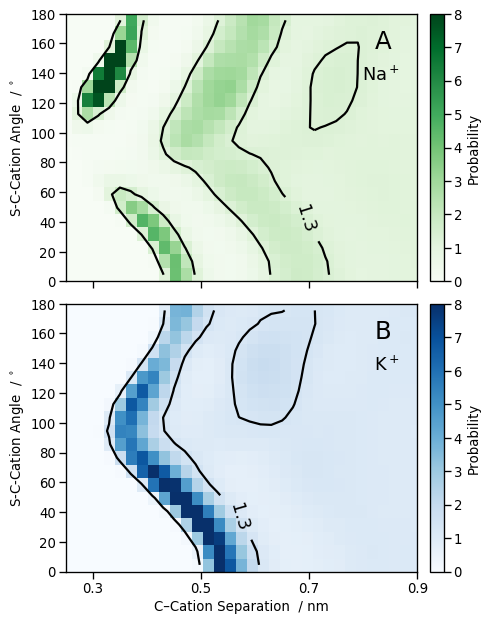

CPU times: user 376 ms, sys: 18.7 ms, total: 395 ms
Wall time: 396 ms


In [33]:
%%time
plt.rcParams.update({'figure.figsize': [6.5, 8], 'figure.dpi':80})
f, ((ax1, ax2)) = plt.subplots(nrows=2)
for cat,cm,sub in zip(['NA','K'],[plt.cm.Greens,plt.cm.Blues],[ax1,ax2]):
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+cat.lower()+'scn/1.0m'
    if not os.path.isfile( folder+'/scn_cat2dAngle.p' ):
        xedges = np.arange(0,187,9)
        yedges = np.arange(.24,2,.02)
        X = xedges[:-1]+(xedges[1]-xedges[0])/2.
        Y = yedges[:-1]+(yedges[1]-yedges[0])/2.
        print(xedges.min(),xedges.max())
        print(X.min(),X.max())
        Prob = np.zeros(shape=(X.size,Y.size))
        traj = md.load_xtc(folder+'/out.xtc', top=folder+'/out.pdb')[500:]
        pair_ci = traj.top.select_pairs('name C2','name '+cat)
        trio = []
        for pair in pair_ci:
            three = np.insert(pair,0,pair[0]-1)
            trio.append(three)
        trio = np.array(trio)            
        corr = np.outer(np.sin(X/180*np.pi),Y**2)
        step = int(traj.n_frames/50)
        for n in range(0,traj.n_frames-step,step):
            t = traj[n:n+step]
            dist_ci = md.compute_distances(t,pair_ci,periodic=True)
            angle_sci = md.compute_angles(t,trio)*180/np.pi
            for theta,dist in zip(angle_sci,dist_ci):
                P, xedges, yedges = np.histogram2d(x=theta,y=dist,bins=(xedges,yedges))
                Prob += P/corr
        Prob = Prob / Prob[:,70:].mean()
        vmin = Prob.min(); vmax = Prob.max()
        print(vmin,vmax)
        df = pd.DataFrame(data=Prob,index=X,columns=Y)
        df.to_pickle(folder+'/scn_cat2dAngle.p')
    else:
        d = pd.read_pickle(folder+'/scn_cat2dAngle.p')
        Prob = d.values; X = d.index; Y = d.columns
    im = sub.imshow(Prob,vmin=0,vmax=8,aspect='auto',
           extent=[.24,2,0,180],origin='lower',cmap=cm)
    cb = f.colorbar(im,ax=sub,label='Probability',pad=.03,ticks=range(9))
    cb.ax.set_yticklabels(['{:1g}'.format(i) for i in range(9)]) 
    cset = sub.contour(Y, X, Prob, [1.3], linewidths=2,cmap=plt.cm.binary_r)
    manual_locations = [(.65,40)]
    sub.clabel(cset,inline=True,fmt='%1.1f',fontsize=16,manual=manual_locations,colors=['k'])
    sub.set_xlim(.25,.9); sub.set_ylim(X.min(),X.max())
    sub.set_xticks(np.arange(.3,.9,.2)); sub.set_yticks(np.arange(0,181,20))
    sub.set_xticklabels(['{:1g}'.format(i) for i in np.arange(.3,1.2,.2)])
    sub.set_yticklabels(['{:1g}'.format(i) for i in np.arange(0,181,20)])
    sub.set_ylabel('S-C-Cation Angle  / $^\circ$')
ax1.annotate('A',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax2.annotate('B',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax1.annotate('Na$^+$',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.annotate('K$^+$',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.set_xlabel('C–Cation Separation  / nm')
ax1.set_xticklabels(np.tile([''],4))
f.tight_layout(h_pad=.5)
plt.show()

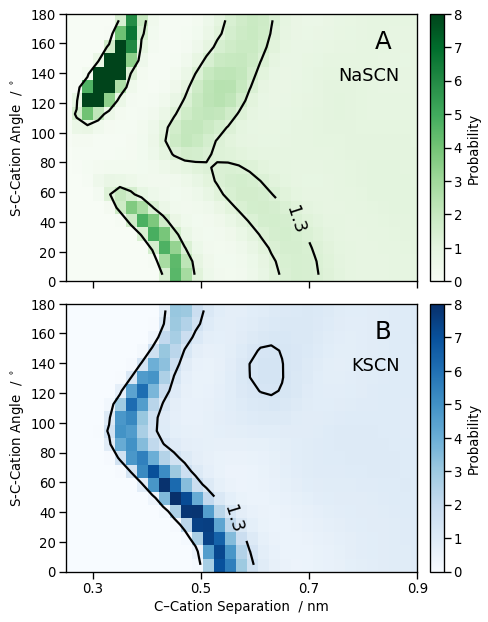

CPU times: user 306 ms, sys: 13.9 ms, total: 320 ms
Wall time: 322 ms


In [34]:
%%time
plt.rcParams.update({'figure.figsize': [6.5, 8]})
f, ((ax1, ax2)) = plt.subplots(nrows=2)
for cat,cm,sub in zip(['NA','K'],[plt.cm.Greens,plt.cm.Blues],[ax1,ax2]):
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+cat.lower()+'scn/5.0m'
    if not os.path.isfile( folder+'/scn_cat2dAngle.p' ):
        xedges = np.arange(0,187,9)
        yedges = np.arange(.24,2,.02)
        X = xedges[:-1]+(xedges[1]-xedges[0])/2.
        Y = yedges[:-1]+(yedges[1]-yedges[0])/2.
        print(xedges.min(),xedges.max())
        print(X.min(),X.max())
        Prob = np.zeros(shape=(X.size,Y.size))
        traj = md.load_xtc(folder+'/out.xtc', top=folder+'/out.pdb')[500:]
        pair_ci = traj.top.select_pairs('name C2','name '+cat)
        trio = []
        for pair in pair_ci:
            three = np.insert(pair,0,pair[0]-1)
            trio.append(three)
        trio = np.array(trio)            
        corr = np.outer(np.sin(X/180*np.pi),Y**2)
        step = int(traj.n_frames/50)
        for n in range(0,traj.n_frames-step,step):
            t = traj[n:n+step]
            dist_ci = md.compute_distances(t,pair_ci,periodic=True)
            angle_sci = md.compute_angles(t,trio)*180/np.pi
            for theta,dist in zip(angle_sci,dist_ci):
                P, xedges, yedges = np.histogram2d(x=theta,y=dist,bins=(xedges,yedges))
                Prob += P/corr
        Prob = Prob / Prob[:,70:].mean()
        vmin = Prob.min(); vmax = Prob.max()
        print(vmin,vmax)
        df = pd.DataFrame(data=Prob,index=X,columns=Y)
        df.to_pickle(folder+'/scn_cat2dAngle.p')
    else:
        d = pd.read_pickle(folder+'/scn_cat2dAngle.p')
        Prob = d.values; X = d.index; Y = d.columns
    im = sub.imshow(Prob,vmin=0,vmax=8,aspect='auto',
           extent=[.24,2,0,180],origin='lower',cmap=cm)
    cb = f.colorbar(im,ax=sub,label='Probability',pad=.03,ticks=range(9))
    cb.ax.set_yticklabels(['{:1g}'.format(i) for i in range(9)]) 
    cset = sub.contour(Y, X, Prob, [1.3], linewidths=2,cmap=plt.cm.binary_r)
    manual_locations = [(.65,40)]
    sub.clabel(cset,inline=True,fmt='%1.1f',fontsize=16,manual=manual_locations,colors=['k'])
    sub.set_xlim(.25,.9); sub.set_ylim(X.min(),X.max())
    sub.set_xticks(np.arange(.3,.9,.2)); sub.set_yticks(np.arange(0,181,20))
    sub.set_xticklabels(['{:1g}'.format(i) for i in np.arange(.3,1.2,.2)])
    sub.set_yticklabels(['{:1g}'.format(i) for i in np.arange(0,181,20)])
    sub.set_ylabel('S-C-Cation Angle  / $^\circ$')
ax1.annotate('A',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax2.annotate('B',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax1.annotate('NaSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.annotate('KSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.set_xlabel('C–Cation Separation  / nm')
ax1.set_xticklabels(np.tile([''],4))
f.tight_layout(h_pad=.5)
plt.show()

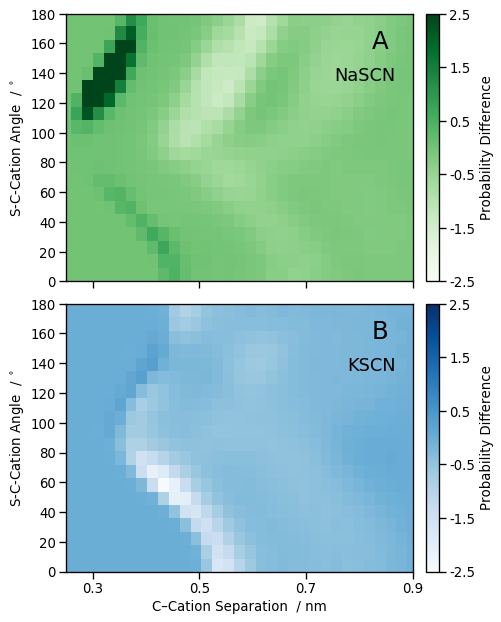

In [35]:
plt.rcParams.update({'figure.figsize': [6.5, 8]})
f, ((ax1, ax2)) = plt.subplots(nrows=2)
for cat,cm,sub in zip(['NA','K'],[plt.cm.Greens,plt.cm.Blues],[ax1,ax2]):
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+cat.lower()+'scn/1.0m'
    d2 = pd.read_pickle(folder+'/scn_cat2dAngle.p')
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+cat.lower()+'scn/8.0m'
    d1 = pd.read_pickle(folder+'/scn_cat2dAngle.p')
    d = d1-d2   
    vmin=-2.5; vmax=2.5
    Prob = d.values; X = d.index; Y = d.columns
    im = sub.imshow(Prob,vmin=vmin,vmax=vmax,aspect='auto',
           extent=[.24,2,0,180],origin='lower',cmap=cm)
    cb = f.colorbar(im,ax=sub,label='Probability Difference',pad=.03,ticks=np.arange(vmin,vmax+.1,1))
    cb.ax.set_yticklabels(['{:1g}'.format(i) for i in np.arange(-2.5,2.6,1)]) 
    sub.set_xlim(.25,.9); sub.set_ylim(X.min(),X.max())
    sub.set_xticks(np.arange(.3,.9,.2)); sub.set_yticks(np.arange(0,181,20))
    sub.set_xticklabels(['{:1g}'.format(i) for i in np.arange(.3,1.2,.2)])
    sub.set_yticklabels(['{:1g}'.format(i) for i in np.arange(0,181,20)])
    sub.set_ylabel('S-C-Cation Angle  / $^\circ$')
ax1.annotate('A',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax2.annotate('B',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax1.annotate('NaSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.annotate('KSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.set_xlabel('C–Cation Separation  / nm')
ax1.set_xticklabels(np.tile([''],4))
f.tight_layout(h_pad=.5)
f.savefig('figs/figS8.pdf')
plt.show()

## Probability _vs._ C–C distance and Angle between SCN$^-$
#### $m=8$ mol kg$^{-1}$

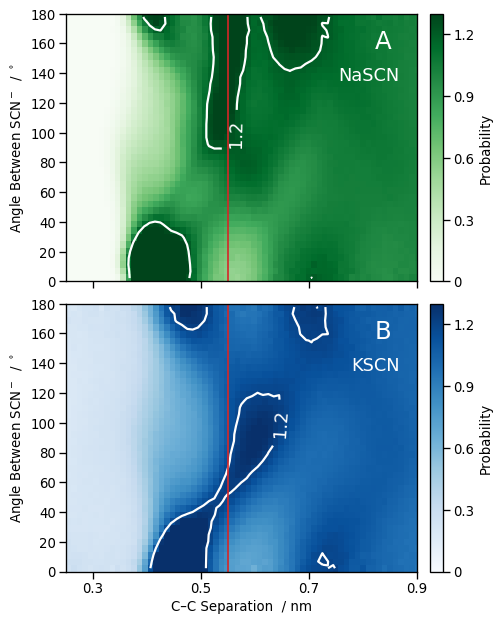

CPU times: user 300 ms, sys: 11.2 ms, total: 311 ms
Wall time: 314 ms


In [36]:
%%time
def distPBC(d1, d2, half_len):
    delta = np.abs(d1 - d2[:,np.newaxis])
    delta[delta>half_len] -= half_len*2
    return np.linalg.norm(delta,axis=2)
plt.rcParams.update({'figure.figsize': [6.5, 8]})
f, ((ax1, ax2)) = plt.subplots(nrows=2)
for cat,cm,sub in zip(['NA','K'],[plt.cm.Greens,plt.cm.Blues],[ax1,ax2]):
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+cat.lower()+'scn/8.0m'
    if not os.path.isfile( folder+'/scn_scn2dAngle_c.p' ):
        top = md.load_pdb(folder+'/out.pdb')
        atom_sel = top.top.select('resname SCN')
        xedges = np.arange(0,187,9)
        yedges = np.arange(.24,2,.02)
        X = xedges[:-1]+(xedges[1]-xedges[0])/2.
        Y = yedges[:-1]+(yedges[1]-yedges[0])/2.
        print(xedges.min(),xedges.max())
        print(X.min(),X.max())
        Prob = np.zeros(shape=(X.size,Y.size))
        traj = md.load_xtc(folder+'/out.xtc', top=folder+'/out.pdb', atom_indices=atom_sel)[500:]
        pair_sn = np.array(traj.top.select('resname SCN and not name C2'))
        pair_sn = pair_sn.reshape(int(pair_sn.size/2),2)
        sel_c = traj.top.select('name C2')
        half_len = traj.unitcell_lengths[0,0]*.5
        corr = np.outer(np.sin(X/180*np.pi),Y**2)
        step = int(traj.n_frames/50)
        for n in range(0,traj.n_frames-step,step):
            t = traj[n:n+step]
            vec_sn = md.compute_displacements(t,pair_sn)
            dist_c = t.atom_slice(sel_c).xyz
            for vec,dist in zip(vec_sn,dist_c):
                cc = distPBC(dist, dist, half_len)[np.triu_indices(dist.shape[0], k=1)]
                costheta = 1 - cdist(vec, vec, 'cosine')[np.triu_indices(vec.shape[0], k=1)]
                theta = np.arccos(np.clip(costheta,-1,1)) / np.pi*180
                P, xedges, yedges = np.histogram2d(x=theta,y=cc,bins=(xedges,yedges),normed=True)
                Prob += P/corr
        Prob = Prob / Prob[:,70:].mean()
        vmin = Prob.min(); vmax = Prob.max()
        print(vmin,vmax)
        df = pd.DataFrame(data=Prob,index=X,columns=Y)
        df.to_pickle(folder+'/scn_scn2dAngle_c.p')
    else:
        d = pd.read_pickle(folder+'/scn_scn2dAngle_c.p')
        Prob = d.values; X = d.index; Y = d.columns
    im = sub.imshow(Prob,vmin=0,vmax=1.3,aspect='auto',
           extent=[.24,2,0,180],origin='lower',cmap=cm)
    cb = f.colorbar(im,ax=sub,label='Probability',pad=.03,ticks=np.arange(0,1.4,.3))
    cb.ax.set_yticklabels(['{:1g}'.format(i) for i in np.arange(0,1.4,.3)]) 
    cset = sub.contour(Y, X, Prob, [1.2], linewidths=2,cmap=plt.cm.binary)
    manual_locations = [(.65,100)]
    sub.clabel(cset,inline=True,fmt='%1.1f',fontsize=16,manual=manual_locations,colors=['w'])
    sub.set_xlim(.25,.9); sub.set_ylim(X.min(),X.max())
    sub.set_xticks(np.arange(.3,.9,.2)); sub.set_yticks(np.arange(0,181,20))
    sub.set_xticklabels(['{:1g}'.format(i) for i in np.arange(.3,1.2,.2)])
    sub.set_yticklabels(['{:1g}'.format(i) for i in np.arange(0,181,20)])
    sub.set_ylabel('Angle Between SCN$^-$  / $^\circ$')
ax1.annotate('A',xy=(.88,.87), fontsize=22, xycoords='axes fraction', color='w')
ax2.annotate('B',xy=(.88,.87), fontsize=22, xycoords='axes fraction', color='w')
ax1.annotate('NaSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='w')
ax2.annotate('KSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='w')
ax1.vlines(x=.55,ymin=0,ymax=180,color=colors[3])
ax2.vlines(x=.55,ymin=0,ymax=180,color=colors[3])
ax2.set_xlabel('C–C Separation  / nm')
ax1.set_xticklabels(np.tile([''],4))
f.tight_layout(h_pad=.5)
plt.show()

0.0 1.5259078925671683
0.004635632961801959 1.9959987988282633
0.0 3.27262790657709
0.16582256054404942 2.476720224320101


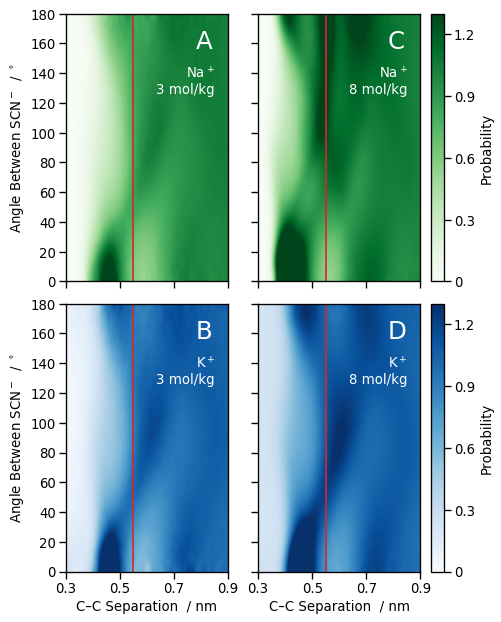

In [37]:
plt.rcParams.update({'figure.figsize': [6.5, 8]})
f, axes = plt.subplots(nrows=2,ncols=2)
letters = ['A','B','C','D']
labels = ['Na$^+$\n3 mol/kg','K$^+$\n3 mol/kg','Na$^+$\n8 mol/kg','K$^+$\n8 mol/kg']
cbs = [] 
for i,conc in enumerate(['3.0m','8.0m']):
    for cat,cm,sub in zip(['NA','K'],[plt.cm.Greens,plt.cm.Blues],[axes[0,i],axes[1,i]]):
        folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+cat.lower()+'scn/'+conc
        d = pd.read_pickle(folder+'/scn_scn2dAngle_c.p')
        Prob = d.values; X = d.index; Y = d.columns
        print(Prob.min(),Prob.max())
        im = sub.imshow(Prob,vmin=0,vmax=1.3,aspect='auto',interpolation='bicubic',
               extent=[.24,2,0,180],origin='lower',cmap=cm)
        cb = f.colorbar(im,ax=sub,label='Probability',pad=.05,ticks=np.arange(0,1.4,.3))
        cb.ax.set_yticklabels(['{:1g}'.format(i) for i in np.arange(0,1.4,.3)]) 
        cbs.append(cb)
        if sub in axes[:,0]:
            sub.set_ylabel('Angle Between SCN$^-$  / $^\circ$')
        if sub in axes[1,:]:
            sub.set_xlabel('C–C Separation  / nm')
        sub.vlines(x=.55,ymin=0,ymax=180,color=colors[3])
        #cset = sub.contour(Y, X, Prob, [1.3], linewidths=2,cmap=plt.cm.binary)
        #manual_locations = [(.45,40)]
        #sub.clabel(cset,inline=True,fmt='%1.1f',fontsize=16,manual=manual_locations,colors=['w'])
        sub.set_xlim(.3,.9); sub.set_ylim(X.min(),X.max())
        sub.set_xticks(np.arange(.3,.9,.2)); sub.set_yticks(np.arange(0,181,20))
        sub.set_xticklabels(['{:1g}'.format(i) for i in np.arange(.3,1.2,.2)])
        sub.set_yticklabels(['{:1g}'.format(i) for i in np.arange(0,181,20)])
        sub.annotate(letters[len(cbs)-1],xy=(.8,.87), fontsize=22, xycoords='axes fraction', color='w')
        sub.annotate(labels[len(cbs)-1],xy=(.92,.7), fontsize=12, 
             xycoords='axes fraction', color='w', horizontalalignment='right')
axes[0][0].set_xticklabels(np.tile([''],4)); axes[0][1].set_xticklabels(np.tile([''],4))
axes[0][1].set_yticklabels(np.tile([''],10)); axes[1][1].set_yticklabels(np.tile([''],10))
f.tight_layout(h_pad=.5,w_pad=-3.5)
cbs[0].remove(); cbs[1].remove()
f.savefig('figs/fig7.pdf')
plt.show()

## Cation–S, –C, –N, and C–C RDFs

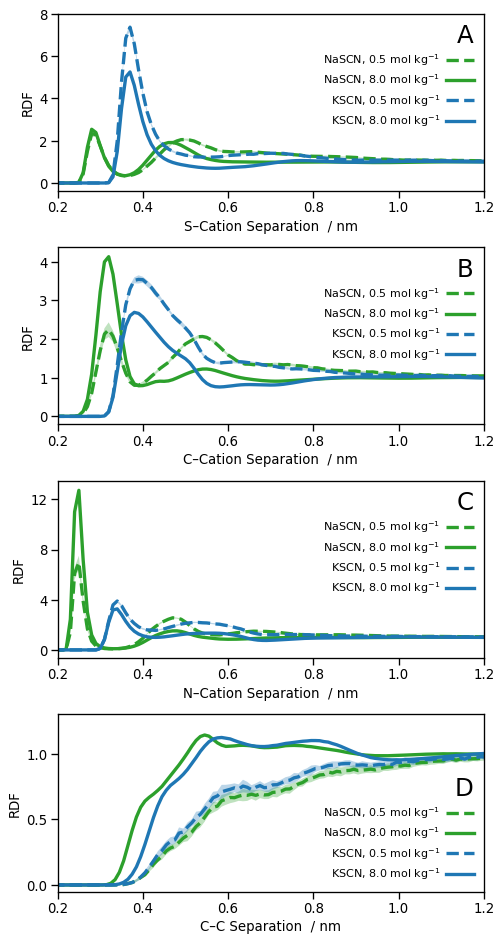

In [38]:
plt.rcParams.update({'figure.figsize': [6.5, 12]})
f, axes = plt.subplots(nrows=4)
for ax,atom,letter in zip(axes[:3],['S1','C2','N3'],['A','B','C']):
    for salt,color in zip(['nascn','kscn'],[colors[2],colors[0]]):
        for conc,ls in zip(['0.5m','8.0m'],['dashed','-']):
            folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+salt+'/'+conc
            g_ca = []   
            for block in np.arange(1,19,1):
                g = np.loadtxt(folder+'/g_+'+atom.lower()+'_'+str(block))
                #r = np.loadtxt(folder+'/r_'+str(block))
                g_ca.append(g)
            mean = np.mean(g_ca,axis=0)
            std = np.std(g_ca,axis=0)            
            r = np.arange(0, len(mean)*0.01, 0.01)
            ax.plot(r,mean,color=color,lw=3,ls=ls,
                     label=salt[:-3].capitalize()+salt[-3:].upper()+', '+conc[:-1]+' mol kg$^{-1}$')
            ax.fill_between(r,mean-std,mean+std,alpha=0.3,color=color,lw=0)
    ax.set_xlim(.2,1.2)
    ax.set_ylabel('RDF')
    ax.set_xlabel(atom[0]+'–Cation Separation  / nm')
    ax.legend(loc='upper right',handlelength=2.5,
              handletextpad=0.5,markerfirst=False,fontsize=10,labelspacing=.4)
    ax.get_legend().set_title(letter,prop={'size':22})
    ax.get_legend()._legend_box.align = 'right'
for salt,color in zip(['nascn','kscn'],[colors[2],colors[0]]):
    for conc,ls in zip(['0.5m','8.0m'],['dashed','-']):
        folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+salt+'/'+conc
        rdffile = folder+'/g_c2c2'
        if not os.path.isfile( rdffile ):
            top = md.load_pdb(folder+'/out.pdb')
            atom_sel = top.top.select('name C2')
            traj = md.load_xtc(folder+'/out.xtc', top=folder+'/out.pdb',atom_indices=atom_sel)
            pair_c2c2 = traj.top.select_pairs('name C2','name C2')
            g_c2c2 = []
            start = int(traj.n_frames/10)
            end = traj.n_frames - start
            for block in np.arange(1,19,1):
                first = int(start + (block-1)*end/len(block_range))
                last = int(start + block*end/len(block_range))
                r,g = md.compute_rdf(traj[first:last],pair_c2c2,bin_width=0.01,r_range=(0,2))
                g_c2c2.append(g)
            mean = np.mean(g_c2c2,axis=0)
            std = np.std(g_c2c2,axis=0)
            np.savetxt(rdffile,np.c_[r,mean,std])
        r, g, gerr = np.loadtxt(rdffile,unpack=True)
        axes[3].plot(r,g,color=color,lw=3,ls=ls,
                 label=salt[:-3].capitalize()+salt[-3:].upper()+', '+conc[:-1]+' mol kg$^{-1}$')
        axes[3].fill_between(r,g-gerr,g+gerr,alpha=0.3,color=color,lw=0)
axes[3].set_xlim(.2,1.2)
axes[3].set_ylim(-.05,1.3)
axes[3].set_ylabel('RDF')
axes[3].set_xlabel('C–C Separation  / nm')
axes[3].legend(loc='lower right',handlelength=2.5,
          handletextpad=0.5,markerfirst=False,fontsize=10,labelspacing=.4)
axes[3].get_legend().set_title('D',prop={'size':22})
axes[3].get_legend()._legend_box.align = 'right'    
axes[0].set_yticks(range(0,9,2))
axes[1].set_yticks(range(5))
axes[2].set_yticks(range(0,16,4))
axes[3].set_yticks(np.arange(0,1.2,.5))
f.tight_layout(h_pad=.5)
f.savefig('figs/figS9.pdf')
plt.show()

## Cluster Analysis
Here we use the `GROMACS` routine `gmx clustsize` to calculate the number and size of clusters of SCN$^-$ in salt solutions of various molalities. The cutoff C-C distance that determines whether anions are interconnected corresponds to the first local maximum in the RDF of the SCN$^-$ carbon atoms at $m=$0.5 mol kg$^{-1}$.

In [39]:
block_range = np.arange(1,19,1)
trajps = 48000; start = 500; end = trajps - start
for salt,cutoff in zip(['nascn','kscn'],[.55,.55]):
    for i in (.5,1,2,3,4,5,6,7,8,10):
        folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+salt+'/{:1.1f}'.format(i)+'m'
        trjfile = folder + '/out.xtc'
        tprfile = folder + '/out.tpr'
        ndxfile = folder + '/out.ndx'
        pdbfile = folder + '/out.pdb'
        if os.path.isfile( trjfile ):
            !printf "a C2\nq\n" | gmx make_ndx -f $pdbfile -o $ndxfile
            !rm $folder/#*
            for block in block_range: 
                first = int(start + (block-1)*end/len(block_range))
                last = int(start + block*end/len(block_range))
                hcfile = folder + '/hc_' + str(cutoff) + '_' + str(block) + '.xvg'
                mcnfile = folder + '/mcn_' + str(cutoff) + '_' + str(block) + '.ndx'
                mcfile = folder + '/mc_' + str(cutoff) + '_' + str(block) + '.xvg'
                clustpdb = mcnfile.split('.ndx')[0]+'_scn.pdb'
                clustndx = mcnfile.split('.ndx')[0]+'_scn.ndx'
                clusttpr = mcnfile.split('.ndx')[0]+'_scn.tpr'
                if not os.path.isfile( hcfile ):
                    !echo "7" | gmx clustsize -f $trjfile -s $tprfile -n $ndxfile \
                        -hc $hcfile -b $first -e $last -cut $cutoff -mcn $mcnfile -mc $mcfile
                    !rm ./#*
                    mcn = np.loadtxt(mcnfile,comments=('['))
                    mc = np.loadtxt(mcfile,comments=('#','@'))
                    tmax = '{:1g}'.format(mc[:,0][mc[:,1]==mcn.size][-1])
                    np.savetxt(clustndx,np.c_[mcn-1,mcn,mcn+1],fmt='%g',header='[ max_clust ]',comments='')
                    !gmx trjconv -f $trjfile -s $tprfile -n $clustndx -dump $tmax -o $clustpdb 
                    !gmx convert-tpr -s $tprfile -n $clustndx -nsteps -1 -o $clusttpr
                    !echo "0 0" | gmx trjconv -f $clustpdb -s $clusttpr -o $clustpdb -pbc cluster

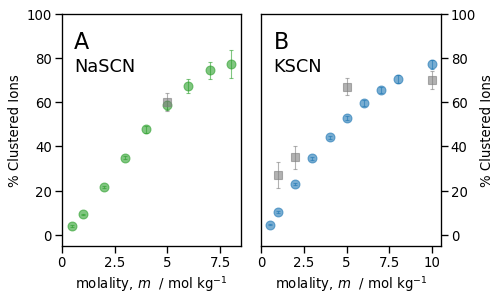

In [40]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False)
letter = ['A','B']; labels = ['NaSCN','KSCN']
concs = [0.5,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0]
na_avg = np.empty(0)
na_std = np.empty(0)
k_avg = np.empty(0)
k_std = np.empty(0)
for i,conc in enumerate(concs):
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/nascn/{:1.1f}'.format(concs[i])+'m'
    if os.path.isdir( folder ):
        data = []
        for j,name in enumerate(glob.glob(folder+'/hc_0.55_*.xvg')):
            n,p = np.loadtxt(name,comments=('@','#'),unpack=True)
            d = pd.DataFrame(data=n[2:]*p[2:]/(n*p).sum()*100,index=n[2:],columns=['block '+str(j+1)])
            data.append(d)
        data = pd.concat(data, axis=1)
        data.fillna(value=0,inplace=True)
        data['mean'] = data.mean(axis=1) 
        data['std'] = data.std(axis=1)  
        data = data[data['mean']>.1]
        na_avg = np.append(na_avg, (data['mean'].values).sum() )
        na_std = np.append(na_std, (data['std'].values *1.5).sum() )
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/kscn/{:1.1f}'.format(concs[i])+'m'
    if os.path.isdir( folder ):
        data = []
        for j,name in enumerate(glob.glob(folder+'/hc_0.55_*.xvg')):
            n,p = np.loadtxt(name,comments=('@','#'),unpack=True)
            d = pd.DataFrame(data=n[2:]*p[2:]/(n*p).sum()*100,index=n[2:],columns=['block '+str(j+1)])
            data.append(d)
        data = pd.concat(data, axis=1)
        data.fillna(value=0,inplace=True)
        data['mean'] = data.mean(axis=1) 
        data['std'] = data.std(axis=1)
        data = data[data['mean']>.1]
        k_avg = np.append(k_avg, (data['mean'].values).sum() )
        k_std = np.append(k_std, (data['std'].values *1.5).sum() ) 
ax1.errorbar(concs[:-1],na_avg,na_std,color=colors[2],lw=0,marker='o',
                 markeredgecolor=None,label='Sim.',ms=8,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
# exp data from DOI: 10.1073/pnas.1019565108 (SI Table S1)
ax1.errorbar([5],[60],[4],color=colors[7],lw=0,marker='s',
                 markeredgecolor=None,label='Exp.',ms=8,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
ax2.errorbar(concs,k_avg,k_std,color=colors[0],lw=0,marker='o',
                 markeredgecolor=None,label='Sim.',ms=8,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
# exp data from DOI: 10.1073/pnas.1019565108 (SI Table S1)
ax2.errorbar([1,2,5,10],[27,35,67,70],[6,5,4,4],color=colors[7],lw=0,marker='s',
                 markeredgecolor=None,label='Exp.',ms=8,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
for i,ax in enumerate(f.axes):
    ax.annotate(letter[i],xy=(.07,.85), fontsize=20, xycoords='axes fraction')
    ax.annotate(labels[i],xy=(.07,.75), fontsize=16, xycoords='axes fraction')
    if i%2 !=0:
        ax.yaxis.set_label_position("right")
        ax.yaxis.set_ticks_position('right')   
ax1.set_ylim(-5,100); ax2.set_ylim(-5,100)
ax1.set_xlim(0,8.5); ax2.set_xlim(0,10.5)
ax1.set_xticks(np.arange(0,7.6,2.5)); ax2.set_xticks(np.arange(0,10.6,2.5))
ax1.set_xticklabels(['{:1g}'.format(i) for i in np.arange(0,7.6,2.5)])
ax2.set_xticklabels(['{:1g}'.format(i) for i in np.arange(0,10.6,2.5)])
ax1.set_ylabel('% Clustered Ions'); ax1.set_xlabel('molality, $m$  / mol kg$^{-1}$')
ax2.set_ylabel('% Clustered Ions'); ax2.set_xlabel('molality, $m$  / mol kg$^{-1}$')
f.tight_layout(w_pad=.5,h_pad=0)
f.savefig('figs/fig8.pdf')
plt.show()

## Comparison Between Average Cluster Size and Size of the Energy Transfer Unit
The two quantities are supposed to be closely related in dilute solutions. At high salt concentration, a single cluster may contain several energy transfer units (DOI: 10.1073/pnas.1019565108, page 4741).

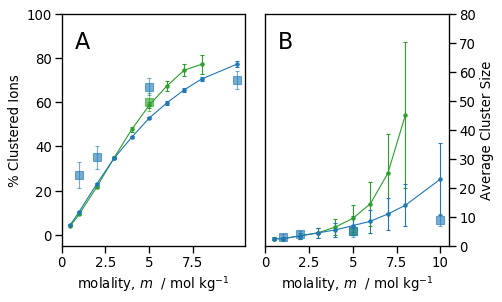

In [41]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False)
letter = ['A','B']
concs = [0.5,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0]
na_avg = np.empty(0); na_n_avg = np.empty(0)
na_std = np.empty(0); na_n_std = np.empty(0)
k_avg = np.empty(0); k_n_avg = np.empty(0)
k_std = np.empty(0); k_n_std = np.empty(0)
for i,conc in enumerate(concs):
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/nascn/{:1.1f}'.format(concs[i])+'m'
    if os.path.isdir( folder ):
        data = []
        for j,name in enumerate(glob.glob(folder+'/hc_0.55_*.xvg')):
            n,p = np.loadtxt(name,comments=('@','#'),unpack=True)
            d = pd.DataFrame(data=n[2:]*p[2:]/(n*p).sum()*100,index=n[2:],columns=['block '+str(j+1)])
            data.append(d)
        data = pd.concat(data, axis=1)
        data.fillna(value=0,inplace=True)
        data['mean'] = data.mean(axis=1) 
        data['std'] = data.std(axis=1)  
        data = data[data['mean']>.1]
        na_avg = np.append(na_avg, (data['mean'].values).sum() )
        na_std = np.append(na_std, (data['std'].values).sum() )
        na_n_avg = np.append(na_n_avg, data.index.values.mean() )
        na_n_std = np.append(na_n_std, data.index.values.std() )
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/kscn/{:1.1f}'.format(concs[i])+'m'
    if os.path.isdir( folder ):
        data = []
        for j,name in enumerate(glob.glob(folder+'/hc_0.55_*.xvg')):
            n,p = np.loadtxt(name,comments=('@','#'),unpack=True)
            d = pd.DataFrame(data=n[2:]*p[2:]/(n*p).sum()*100,index=n[2:],columns=['block '+str(j+1)])
            data.append(d)
        data = pd.concat(data, axis=1)
        data.fillna(value=0,inplace=True)
        data['mean'] = data.mean(axis=1) 
        data['std'] = data.std(axis=1)
        data = data[data['mean']>.1]
        k_avg = np.append(k_avg, (data['mean'].values).sum() )
        k_std = np.append(k_std, (data['std'].values).sum() ) 
        k_n_avg = np.append(k_n_avg, data.index.values.mean() )
        k_n_std = np.append(k_n_std, data.index.values.std() ) 
ax1.errorbar(concs[:-1],na_avg,na_std,color=colors[2],lw=1,marker='o',
                 markeredgecolor=None,label='Sim.',ms=3,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=1)
ax2.errorbar(concs[:-1],na_n_avg,na_n_std,color=colors[2],lw=1,marker='o',
                 markeredgecolor=None,label='Sim.',ms=3,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=1)
# exp data from DOI: 10.1073/pnas.1019565108 (SI Table S1)
#print(m2M_nascn(np.array([5]),'NaSCN'))
ax1.errorbar([5],[60],[4],color=colors[2],lw=0,marker='s',
                 markeredgecolor=None,label='Exp.',ms=8,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
ax2.errorbar([5],[5],[1],color=colors[2],lw=0,marker='s',
                 markeredgecolor=None,label='Exp.',ms=8,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
ax1.errorbar(concs,k_avg,k_std,color=colors[0],lw=1,marker='o',
                 markeredgecolor=None,label='Sim.',ms=3,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=1)
ax2.errorbar(concs,k_n_avg,k_n_std,color=colors[0],lw=1,marker='o',
                 markeredgecolor=None,label='Sim.',ms=3,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=1)
# exp data from DOI: 10.1073/pnas.1019565108 (SI Table S1)
#print(m2M_kscn(np.array([1,2,5,10]),'KSCN'))
ax1.errorbar([1,2,5,10],[27,35,67,70],[6,5,4,4],color=colors[0],lw=0,marker='s',
                 markeredgecolor=None,label='Exp.',ms=8,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
ax2.errorbar([1,2,5,10],[3,4,5,9],[1,1,2,2],color=colors[0],lw=0,marker='s',
                 markeredgecolor=None,label='Exp.',ms=8,
                 elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
for i,ax in enumerate(f.axes):
    ax.annotate(letter[i],xy=(.07,.85), fontsize=20, xycoords='axes fraction')
    if i%2 !=0:
        ax.yaxis.set_label_position("right")
        ax.yaxis.set_ticks_position('right')   
ax1.set_ylim(-5,100); ax2.set_ylim(0,80)
ax1.set_xlim(0,10.5); ax2.set_xlim(0,10.5)
ax1.set_xticks(np.arange(0,7.6,2.5)); ax2.set_xticks(np.arange(0,10.6,2.5))
ax1.set_xticklabels(['{:1g}'.format(i) for i in np.arange(0,7.6,2.5)])
ax2.set_xticklabels(['{:1g}'.format(i) for i in np.arange(0,10.6,2.5)])
ax1.set_ylabel('% Clustered Ions'); ax1.set_xlabel('molality, $m$  / mol kg$^{-1}$')
ax2.set_ylabel('Average Cluster Size'); ax2.set_xlabel('molality, $m$  / mol kg$^{-1}$')
f.tight_layout(w_pad=.5,h_pad=0)
plt.show()

## Cluster Size Distributions

Size of largest cluster for NaSCN at 1 molal: 3.0
Average cluster size for NaSCN at 1 molal: 2.5
Size of largest cluster for KSCN at 1 molal: 3.0
Average cluster size for KSCN at 1 molal: 2.5
Size of largest cluster for NaSCN at 3 molal: 7.0
Average cluster size for NaSCN at 3 molal: 4.5
Size of largest cluster for KSCN at 3 molal: 7.0
Average cluster size for KSCN at 3 molal: 4.5
Size of largest cluster for NaSCN at 5 molal: 17.0
Average cluster size for NaSCN at 5 molal: 9.5
Size of largest cluster for KSCN at 5 molal: 12.0
Average cluster size for KSCN at 5 molal: 7.0
Size of largest cluster for NaSCN at 8 molal: 89.0
Average cluster size for NaSCN at 8 molal: 45.01149425287356
Size of largest cluster for KSCN at 8 molal: 26.0
Average cluster size for KSCN at 8 molal: 14.0


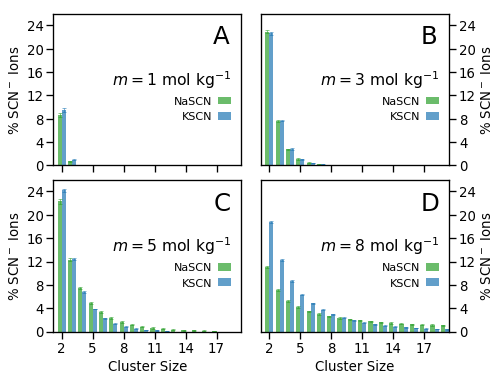

In [42]:
plt.rcParams.update({'figure.figsize': [6.5, 5]})
f, axes = plt.subplots(2, 2, sharex=False, sharey=False)
letter = ['A','B','C','D']; concs = [1,3,5,8]
for i,ax in enumerate(f.axes):
    data = []
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/nascn/{:1.1f}'.format(concs[i])+'m'
    for j,name in enumerate(glob.glob(folder+'/hc_0.55_*.xvg')):
        n,p = np.loadtxt(name,comments=('@','#'),unpack=True)
        d = pd.DataFrame(data=p[2:]*n[2:]/(n*p).sum()*100,index=n[2:],columns=['block '+str(j+1)])
        data.append(d)
    data = pd.concat(data, axis=1)
    data.fillna(value=0,inplace=True)
    data['mean'] = data.mean(axis=1)  
    data['std'] = data.std(axis=1)  
    data = data[data['mean']>.1]
    print('Size of largest cluster for NaSCN at',concs[i],'molal:',data.index.max())
    print('Average cluster size for NaSCN at',concs[i],'molal:',data.index.values.mean())
    ax.bar(data.index-.2, data['mean'].values, width=.4, alpha=.7,
                color=colors[2],
                yerr=data['std'].values*1.5,
                error_kw=dict(elinewidth=.5,ecolor=colors[2],capsize=1.5,capthick=.5),label='NaSCN')
    data = []
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/kscn/{:1.1f}'.format(concs[i])+'m'
    for j,name in enumerate(glob.glob(folder+'/hc_0.55_*.xvg')):
        n,p = np.loadtxt(name,comments=('@','#'),unpack=True)
        d = pd.DataFrame(data=p[2:]*n[2:]/(n*p).sum()*100,index=n[2:],columns=['block '+str(j+1)])
        data.append(d)
    data = pd.concat(data, axis=1)
    data.fillna(value=0,inplace=True)
    data['mean'] = data.mean(axis=1)  
    data['std'] = data.std(axis=1)
    data = data[data['mean']>.1]
    print('Size of largest cluster for KSCN at',concs[i],'molal:',data.index.max())
    print('Average cluster size for KSCN at',concs[i],'molal:',data.index.values.mean())
    ax.bar(data.index+.2, data['mean'].values, width=.4, alpha=.7,
                    color=colors[0],
                    yerr=data['std'].values*1.5,
                    error_kw=dict(elinewidth=.5,ecolor=colors[0],capsize=1.5,capthick=.5),label='KSCN')
    ax.annotate(letter[i],xy=(0.85,.8), fontsize=22, xycoords='axes fraction')
    ax.legend(title='$m={:1.0f}$'.format(concs[i])+' mol kg$^{-1}$',loc='upper right',handlelength=1.2,
              handletextpad=0.5,markerfirst=False,fontsize=10,frameon=False)
    ax.get_legend()._legend_box.align = 'right'
    bb = ax.get_legend().get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    bb.y1 -= .3
    ax.get_legend().set_bbox_to_anchor(bb, transform = ax.transAxes)
    ax.set_xticks(range(2,19,3))
    ax.set_ylim(0,26)
    ax.set_yticks(range(0,27,4))
    ax.set_xlim(1.2,19.4)
    if i%2 !=0:
        ax.yaxis.set_label_position("right")
        ax.yaxis.set_ticks_position('right')
    ax.set_ylabel('% SCN$^-$ Ions')
    if i in [2,3]:
        ax.set_xlabel('Cluster Size')
axes[0][0].set_xticklabels(np.tile([''],4)); axes[0][1].set_xticklabels(np.tile([''],4))
f.tight_layout(w_pad=.5,h_pad=0)
f.savefig('figs/fig9.pdf')
plt.show()

## Calculation of Rotational Time-Correlation Functions

In [43]:
for salt in ['nascn','kscn']:
    frames = 60
    for conc in [.5,1,2,3,4,5,6,7,8]:
        molality = '{:1.1f}'.format(conc)+'m'
        wdir = WORKDIR+'/bulk/rdfs/ff_our/spce/'+salt+'/'+molality
        acffile = WORKDIR+'/bulk/acfs/ff_our/spce/'+salt+'/'+molality+'_sparse.dat'
        if not os.path.isfile( acffile ):
            top = md.load_pdb(wdir+'/out.pdb')
            atom_sel = top.topology.select('resname SCN')
            traj = md.load_xtc(wdir+'/out.xtc', top=wdir+'/out.pdb',atom_indices=atom_sel)
            pair_sn = np.array(top.topology.select('resname SCN and not name C2'))
            pair_sn = pair_sn.reshape(int(pair_sn.size/2),2)
            allc2 = []
            for fr_b in np.arange(int(traj.n_frames/10),int(traj.n_frames-frames),frames):
                fr_e = fr_b + frames
                dist_sn = md.compute_displacements(traj[fr_b:fr_e],pair_sn)
                b = np.zeros(frames)
                for j in range(0,dist_sn.shape[1]):
                    a = np.empty(0)
                    for i in range(frames):
                        n0 = dist_sn[0,j]/ np.linalg.norm(dist_sn[0,j])
                        nt = dist_sn[i,j]/ np.linalg.norm(dist_sn[i,j])
                        p = eval_legendre(2,n0.dot(nt))
                        a = np.append(a,p)
                    b = np.add(b,a)
                allc2.append(b)
            allc2 = np.array(allc2)
            mean = np.mean(allc2,axis=0)
            std = np.std(allc2,axis=0)
            data = np.stack((np.arange(0,frames,1)*2,mean/(len(atom_sel)/3.),std/(len(atom_sel)/3.)),axis=1)
            np.savetxt(acffile,data)

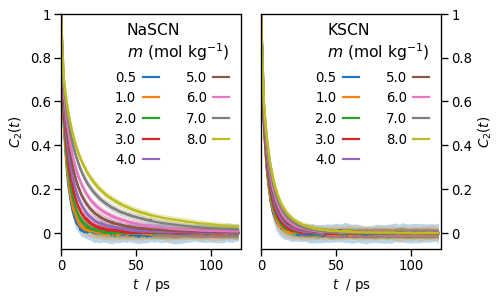

In [44]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False)
for i,conc in enumerate([.5,1,2,3,4,5,6,7,8]):
    molality = '{:1.1f}'.format(conc)+'m'
    folder = WORKDIR+'/bulk/acfs/ff_our/spce/'
    x,y = np.loadtxt(folder+'nascn/'+molality+'.dat',unpack=True)
    ax1.plot(x,y,lw=2,label=molality[:3],color=colors[i])
    x,y,yerr = np.loadtxt(folder+'nascn/'+molality+'_sparse.dat',unpack=True)
    #ax1.errorbar(x,y,yerr,lw=0,label=molality[:3],color=colors[i],marker='o',
    #             markeredgecolor=None,ms=2,
    #             elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
    ax1.plot(x,y,lw=2,color=colors[i])
    ax1.fill_between(x,y-yerr,y+yerr,alpha=0.3,color=colors[i],lw=0)
    x,y = np.loadtxt(folder+'kscn/'+molality+'.dat',unpack=True)
    ax2.plot(x,y,lw=2,label=molality[:3],color=colors[i])
    x,y,yerr = np.loadtxt(folder+'kscn/'+molality+'_sparse.dat',unpack=True)
    #ax2.errorbar(x,y,yerr,lw=0,label=molality[:3],color=colors[i],marker='o',
    #             markeredgecolor=None,ms=2,
    #             elinewidth=1.,capsize=2,capthick=1.,alpha=.6)
    ax2.plot(x,y,lw=2,color=colors[i])
    ax2.fill_between(x,y-yerr,y+yerr,alpha=0.3,color=colors[i],lw=0)
ax1.set_xlim(0,120)
ax2.set_xlim(0,120)
ax1.set_ylim(-.07,1)
ax2.set_ylim(-.07,1)
ax1.set_ylabel('$C_2(t)$'); ax1.set_xlabel('$t$  / ps')
ax2.set_ylabel('$C_2(t)$'); ax2.set_xlabel('$t$  / ps')
ax1.set_yticks(np.arange(0.,11.,2.)/10)
ax1.set_yticklabels(['{:1.0g}'.format(i/10) for i in np.arange(0.,11.,2.)])
ax2.set_yticks(np.arange(0.,11.,2.)/10)
ax2.set_yticklabels(['{:1.0g}'.format(i/10) for i in np.arange(0.,11.,2.)])
ax1.legend(title='NaSCN\n$m$ (mol kg$^{-1}$)',loc='upper right',handlelength=1.2,frameon=False,
          handletextpad=0.5,markerfirst=False,fontsize=12,labelspacing=.5,ncol=2)
ax2.legend(title='KSCN\n$m$ (mol kg$^{-1}$)',loc='upper right',handlelength=1.2,frameon=False,
          handletextpad=0.5,markerfirst=False,fontsize=12,labelspacing=.5,ncol=2)
ax1.get_legend()._legend_box.align = 'right'
ax2.get_legend()._legend_box.align = 'right'
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_ticks_position('right')
f.tight_layout(w_pad=.5,h_pad=0)
plt.show()

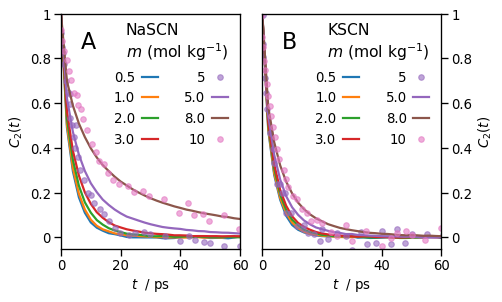

In [45]:
plt.rcParams.update({'figure.figsize': [6.5, 4]})
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False)
letter = ['A','B'] 
concs = [0.5,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
for i,conc in enumerate([0.5,1.0,2.0,3.0,5,8.0]):
    folder = WORKDIR+'/bulk/acfs/ff_our/spce/'
    x,y,yerr = np.loadtxt(folder+'nascn/{:1.1f}'.format(conc)+'m_sparse.dat',unpack=True)
    ax1.plot(x,y,lw=2,label='{:1.1f}'.format(conc),color=colors[i])
    x,y,yerr = np.loadtxt(folder+'kscn/{:1.1f}'.format(conc)+'m_sparse.dat',unpack=True)
    ax2.plot(x,y,lw=2,label='{:1.1f}'.format(conc),color=colors[i])
    if conc in [3,8]:
        x,y = np.loadtxt(folder+'nascn/expBian{:1.0f}'.format(conc+2)+'m.csv',unpack=True)
        ax1.plot(x,y,lw=0,marker='o',alpha=.6,ms=5,label='{:1.0f}'.format(conc+2),color=colors[i+1])
        x,y = np.loadtxt(folder+'kscn/expBian{:1.0f}'.format(conc+2)+'m.csv',unpack=True)
        ax2.plot(x,y,lw=0,marker='o',alpha=.6,ms=5,label='{:1.0f}'.format(conc+2),color=colors[i+1])    
for i,ax in enumerate(f.axes):
    ax.annotate(letter[i],xy=(0.11,.85), fontsize=20, xycoords='axes fraction')
    if i%2 !=0:
        ax.yaxis.set_label_position("right")
        ax.yaxis.set_ticks_position('right')
ax1.set_ylim(-.05,1); ax2.set_ylim(-.05,1)
ax1.set_xlim(0,60); ax2.set_xlim(0,60)
ax1.set_ylabel('$C_2(t)$'); ax1.set_xlabel('$t$  / ps')
ax2.set_ylabel('$C_2(t)$'); ax2.set_xlabel('$t$  / ps')
ax1.set_yticks(np.arange(0.,11.,2.)/10)
ax1.set_yticklabels(['{:1.0g}'.format(i/10) for i in np.arange(0.,11.,2.)])
ax2.set_yticks(np.arange(0.,11.,2.)/10)
ax2.set_yticklabels(['{:1.0g}'.format(i/10) for i in np.arange(0.,11.,2.)])
ax1.legend(title='NaSCN\n$m$ (mol kg$^{-1}$)',loc='upper right',handlelength=1.2,frameon=False,
          handletextpad=0.5,markerfirst=False,fontsize=12,labelspacing=.5,ncol=2)
ax2.legend(title='KSCN\n$m$ (mol kg$^{-1}$)',loc='upper right',handlelength=1.2,frameon=False,
          handletextpad=0.5,markerfirst=False,fontsize=12,labelspacing=.5,ncol=2)
ax1.get_legend()._legend_box.align = 'right'
ax2.get_legend()._legend_box.align = 'right'
f.tight_layout(w_pad=.5,h_pad=0)
f.savefig('figs/fig10.pdf')
plt.show()

## Air–Water Interface

In [46]:
# number of anions in various systems
ncat = np.array([300,400,600,800])
ncat_nascn = np.array([150,300,400,600,800])
ncat_largeBox = np.array([447,596,894,1192])
# experimental parameters for the expression describing surface tension vs. salt molality (DOI: 10.1021/jp070245z) 
# and the activity coefficient vs. salt molality (DOI: 10.1021/ct100517z)
exp = { 'nascn': { 'st':[0.50,0.11] , 'act':[1.5889,0.0023,0.1098,0.0004] },
        'kscn': { 'act':[1.2964,-0.000026362,-0.0025,0.0018] },
        'nacl': { 'st':[1.73,0.17], 'act':[1.4289,0.0004,0.0554,0.0090] },
        'kcl': { 'st':[1.59,0.13], 'act':[1.2991,0.000024156,0.0028,0.0060] },
        'nai': { 'st':[1.14,0.09], 'act':[1.4680,0.1311,0.0375,-0.0085] },
        'ki': { 'st':[1.15,0.16], 'act': [1.4022,0.0005,0.0526,0.0006] } }

Here we define functions to calculate and plot concentration profiles, surface excess, excess surface tension, and orientation of thiocyanate at the interface.

In [47]:
def calcCpro(ff,cation,anion,ncat,which=''):
    """ This function calculates concentration profiles of solutions of various molalities. It takes the arguments:
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - cation: 'K', 'NA'
    - anion: 'SCN', 'I', 'Cl'
    - ncat: list of number of cations in simulations of various concentrations """
    z_min = -10; z_max = 10
    folder = WORKDIR+'/interface/'+ff+'/spce/'+cation.lower()+anion.lower()+which
    for nc in ncat:
        if os.path.isfile(folder+'/'+str(nc)+'.gro') and not os.path.isfile(folder+'/hoh'+str(nc)+'.dat'):
            top = md.load(folder+'/'+str(nc)+'.gro')
            top = top.atom_slice(top.top.select("all and not (name H1 or name H2)"))
            xy = top.unitcell_lengths[0,0]**2
            traj = md.load_xtc(folder+'/'+str(nc)+'.xtc', top=top)[500:]
            print(traj.n_frames)
            o_hoh = traj.topology.select('name O')
            z_hoh = traj.atom_slice(o_hoh).xyz[:,:,2] 
            z_com = md.compute_center_of_mass(traj)[:,2]
            z_hoh = z_hoh - np.repeat(z_com,len(o_hoh)).reshape(z_hoh.shape)
            xedges = np.arange(z_min,z_max,.05)
            X = xedges[:-1]+(xedges[1]-xedges[0])/2.
            hist,xedges = np.histogram(z_hoh,bins=xedges,density=False)
            hist = hist/float(traj.n_frames)/(xy*.05)/6.022*10
            np.savetxt(folder+'/hoh'+str(nc)+'.dat',np.c_[X,hist])
            if anion == 'SCN':
                for atom in ['S1','C2','N3']:
                    print(atom)
                    an = traj.top.select('name '+atom)
                    z_an = traj.atom_slice(an).xyz[:,:,2]
                    z_an = z_an - np.repeat(z_com,len(an)).reshape(z_an.shape)
                    xedges = np.arange(z_min,z_max,.05)
                    X = xedges[:-1]+(xedges[1]-xedges[0])/2.
                    hist,xedges = np.histogram(z_an,bins=xedges,density=False)
                    hist = hist/float(traj.n_frames)/(xy*.05)/6.022*10
                    a = atom[0].lower() if atom != 'C2' else ''
                    np.savetxt(folder+'/an'+str(nc)+a+'.dat',np.c_[X,hist])
            else:
                an = traj.top.select('name '+anion)   
                z_an = traj.atom_slice(an).xyz[:,:,2] 
                z_an = z_an - np.repeat(z_com,len(an)).reshape(z_an.shape)
                xedges = np.arange(z_min,z_max,.05)
                X = xedges[:-1]+(xedges[1]-xedges[0])/2.
                hist,xedges = np.histogram(z_an,bins=xedges,density=False)
                hist = hist/float(traj.n_frames)/(xy*.05)/6.022*10
                np.savetxt(folder+'/an'+str(nc)+'.dat',np.c_[X,hist])
            cat = traj.top.select('name '+cation)
            z_cat = traj.atom_slice(cat).xyz[:,:,2] 
            z_cat = z_cat - np.repeat(z_com,len(cat)).reshape(z_cat.shape)
            xedges = np.arange(z_min,z_max,.05)
            X = xedges[:-1]+(xedges[1]-xedges[0])/2.
            hist,xedges = np.histogram(z_an,bins=xedges,density=False)
            hist = hist/float(traj.n_frames)/(xy*.05)/6.022*10
            np.savetxt(folder+'/cat'+str(nc)+'.dat',np.c_[X,hist])
        
def calcGds(ff,salt,ncat):
    """ This function finds the Gibbs dividing surface (GDS) and calculates the surface excess and the adsorbed
    amount from number density profiles of solutions of various molalities. It takes the arguments:
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - salt: 'kscn', 'nascn', 'kcl', 'nacl', 'ki', or 'nai'
    - ncat: list of number of cations in simulations of various concentrations """
    folder = WORKDIR+'/interface/'+ff+'/spce/'+salt
    gamma = np.empty(0)
    num = np.empty(0)
    if not os.path.isfile(folder+'/gamma.dat'):
        for nc in ncat:
            hoh = np.loadtxt(folder+'/hoh'+str(nc)+'.dat')
            grad = np.gradient(hoh[:,1])
            gmax = grad.argmax() 
            gmin = grad.argmin() 
            gds = np.array([hoh[gmax,0],hoh[gmin,0]])
            an = np.loadtxt(folder+'/an'+str(nc)+'.dat') 
            hoh_conc = np.delete(hoh[:,1], np.arange(gmin-60,hoh[:,1].size,1), axis=0)
            hoh_conc = np.delete(hoh_conc, np.arange(0,gmax+60,1), axis=0)
            an_conc = np.delete(an[:,1], np.arange(gmin-60,an[:,1].size,1), axis=0)
            an_conc = np.delete(an_conc, np.arange(0,gmax+60,1), axis=0)
            conc = an_conc.mean() 
            molality = an_conc.mean()/hoh_conc.mean()/0.01801528
            print(salt,nc,molality)
            hoh11 = np.delete(hoh, np.arange(gmax+50, hoh[:,1].size, 1), axis=0)
            hoh11 = np.delete(hoh11, np.arange(0,gmax,1), axis=0) 
            hoh11[:,1] = hoh11[:,1] - hoh_conc.mean()
            hoh12 = np.delete(hoh, np.arange(gmax-1, hoh[:,1].size, 1), axis=0)
            inthoh1 = np.trapz(hoh11[:,1], dx=.05) + np.trapz(hoh12[:,1], dx=.05)
            hoh21 = np.delete(hoh, np.arange(0, gmin-50, 1), axis=0)
            hoh21 = np.delete(hoh21, np.arange(51, hoh21[:,1].size, 1), axis=0) 
            hoh21[:,1] = hoh21[:,1] - hoh_conc.mean()
            hoh22 = np.delete(hoh, np.arange(0, gmin+1, 1), axis=0)
            inthoh2 = np.trapz(hoh21[:,1]*6.022/10., dx=.05) + np.trapz(hoh22[:,1]*6.022/10., dx=.05)
            an11 = np.delete(an, np.arange(gmax+50, an[:,1].size, 1), axis=0)
            an11 = np.delete(an11, np.arange(0,gmax,1), axis=0) 
            an11[:,1] = an11[:,1] - conc
            an12 = np.delete(an, np.arange(gmax-1, an[:,1].size, 1), axis=0)
            intan1 = np.trapz(an11[:,1]*6.022/10., dx=.05) + np.trapz(an12[:,1]*6.022/10., dx=.05)
            int1 = np.trapz(an11[:,1]*6.022/10., dx=.05) + np.trapz(an12[:,1]*6.022/10., dx=.05)
            an21 = np.delete(an, np.arange(0, gmin-50, 1), axis=0)
            an21 = np.delete(an21, np.arange(51, an21[:,1].size, 1), axis=0) 
            an21[:,1] = an21[:,1] - conc
            an22 = np.delete(an, np.arange(0, gmin+1, 1), axis=0)
            intan2 = np.trapz(an21[:,1]*6.022/10., dx=.05) + np.trapz(an22[:,1]*6.022/10., dx=.05)
            gamma = np.append(gamma,[molality,.5*(intan1+intan2),np.abs(intan1-intan2)])
            num1 = np.delete(an, np.arange(grad.argmax()+7, an[:,1].size, 1), axis=0)
            int1n = np.trapz(num1[:,1]*6.022/10., num1[:,0])    
            num2 = np.delete(an, np.arange(0, grad.argmin()-6, 1), axis=0)    
            int2n = np.trapz(num2[:,1]*6.022/10., num2[:,0]) 
            num = np.append(num,[conc,.5*(int1n+int2n),np.abs(int1n-int2n)])
        gamma = gamma.reshape((int(gamma.size/3),3))
        np.savetxt(folder+'/gamma.dat',gamma)
        num = num.reshape((int(num.size/3),3))
        np.savetxt(folder+'/num.dat',num)
    else:
        for nc in ncat:
            hoh = np.loadtxt(folder+'/hoh'+str(nc)+'.dat')
            grad = np.gradient(hoh[:,1])
            gmax = grad.argmax() 
            gmin = grad.argmin() 
            gds = np.array([hoh[gmax,0],hoh[gmin,0]])
            an = np.loadtxt(folder+'/an'+str(nc)+'.dat') 
            hoh_conc = np.delete(hoh[:,1], np.arange(gmin-60,hoh[:,1].size,1), axis=0)
            hoh_conc = np.delete(hoh_conc, np.arange(0,gmax+60,1), axis=0)
            an_conc = np.delete(an[:,1], np.arange(gmin-60,an[:,1].size,1), axis=0)
            an_conc = np.delete(an_conc, np.arange(0,gmax+60,1), axis=0)
            conc = an_conc.mean() 
            molality = an_conc.mean()/hoh_conc.mean()/0.01801528
            print(salt,nc,molality,gds)
        return gds

def plotCpro(sub,ff,salt,nc,color,l='',s='-',atom=''):
    """ This function plots concentration profiles of solutions of various molalities. It takes the arguments:
    - sub: axes object for subplot 
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - salt: 'kscn', 'nascn', 'kcl', 'nacl', 'ki',or 'nai'
    - nc: number of cations in the simulation
    - color: color of the number density profile
    - l: label for the legend 
    - s: line style 
    - atom: atom used to calculate the concentration profile """
    folder = WORKDIR+'/interface/'+ff+'/spce/'+salt
    atom = '_'+atom.lower() if atom != '' else atom
    hoh = np.loadtxt(folder+'/hoh'+str(nc)+'.dat')
    an = np.loadtxt(folder+'/an'+str(nc)+atom+'.dat') 
    grad = np.gradient(hoh[:,1])
    gds = np.array([hoh[grad.argmax(),0],hoh[grad.argmin(),0]])
    sub.plot(an[:,0]*10-gds[0]*10,an[:,1]/an[int(an.shape[0]/2),1],lw=4,color=color,label=l,ls=s)
    sub.set_xlim(-3,14)
    sub.set_ylim(-.5,1.5)
    sub.set_yticks(np.arange(-0.5,1.6,.5))
    sub.set_ylabel('$c$ / $c_{bulk}$')  
    sub.set_xlabel(r'$z$, distance from GDS  / Å')  
    
def plotGamma(sub,ff,salt,fit,color,l='',m='o'):
    """ This function plots surface excess vs. molality. It takes the arguments:
    - sub: axes object for subplot 
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - salt: 'kscn', 'nascn', 'kcl', 'nacl', 'ki',or 'nai'
    - fit: fitting function, 'linear' else quadratic
    - color: color of the number density profile
    - l: label for the legend 
    - m: marker """
    folder = WORKDIR+'/interface/'+ff+'/spce/'+salt
    gamma = np.loadtxt(folder+'/gamma.dat')
    x = np.arange(0,7,.01)
    if fit == 'linear':
        def f(x,a):
            return a*x
        popt,pcov = curve_fit(f,gamma[:,0],gamma[:,1],sigma=gamma[:,2])
        y = f(x,popt[0])
    else:
        def f(x,a1,a2):
            return a1*x+a2*x*x
        popt,pcov = curve_fit(f,gamma[:,0],gamma[:,1],sigma=gamma[:,2])
        y = f(x,popt[0],popt[1])
    print(ff,salt)
    print(popt)
    print(np.sqrt(np.diag(pcov)))
    sub.plot(x,y,color=color,lw=1)
    sub.errorbar(gamma[:,0],gamma[:,1],gamma[:,2],marker=m,
        markeredgecolor=None,color=color,markersize=7,elinewidth=2,capsize=4,
        lw=0,capthick=2.,alpha=.6,label=l)     
    sub.set_ylabel(r'$\Gamma$  / nm$^{-2}$')
    sub.set_xticks(np.arange(0,7,1))
    sub.set_ylim(-.8,.5)

def derloggamma(x, salt):
    """ This function describes the logarithm of the activity coefficient as a function of molality.
    It takes the arguments:
    - x: the molality array
    - salt: 'kscn', 'nascn', 'kcl', 'nacl', 'ki', or 'nai'"""
    a,b,c,d = exp[salt.split('_')[0]]['act']
    return -1.178/(1.+a*np.sqrt(x))/(1.+a*np.sqrt(x))/np.sqrt(x)/2. + b/(1.-b*x) + c + 2*x*d

def int2sigma(ff,salt,fit,nc):
    """ This function caulates the excess surface tension by integrating the number density profiles of solution.
    It takes the arguments:
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - salt: 'kscn', 'nascn', 'kcl', 'nacl', 'ki', or 'nai'
    - fit: fitting function, 'linear' else quadratic
    - nc: number of cations in simulation """
    folder = WORKDIR+'/interface/'+ff+'/spce/'+salt
    hoh = np.loadtxt(folder+'/hoh'+str(nc)+'.dat')
    an = np.loadtxt(folder+'/an'+str(nc)+'.dat') 
    grad = np.gradient(hoh[:,1])
    hoh_conc = np.delete(hoh[:,1], np.arange(grad.argmin()-60,hoh[:,1].size,1), axis=0)
    hoh_conc = np.delete(hoh_conc, np.arange(0,grad.argmax()+60,1), axis=0)
    hoh[:,1] = hoh[:,1] / hoh_conc.mean() 
    an_conc = np.delete(an[:,1], np.arange(grad.argmin()-60,an[:,1].size,1), axis=0)
    an_conc = np.delete(an_conc, np.arange(0,grad.argmax()+60,1), axis=0)
    conc = an_conc.mean() 
    molality = an_conc.mean()/hoh_conc.mean()/0.01801528 
    gamma = np.loadtxt(folder+'/gamma.dat')
    x = np.arange(1e-6, molality, 1e-6)   
    if fit == 'linear':
        def f(x,a):
            return a*x
        popt,pcov = curve_fit(f,gamma[:,0],gamma[:,1],sigma=gamma[:,2])
        y = f(x,popt[0])
        y_u = f(x,popt[0]+np.sqrt(np.diag(pcov))[0])
        y_l = f(x,popt[0]-np.sqrt(np.diag(pcov))[0])
    else:
        def f(x,a1,a2):
            return a1*x+a2*x*x
        popt,pcov = curve_fit(f,gamma[:,0],gamma[:,1],sigma=gamma[:,2])
        y = f(x,popt[0],popt[1])
        y_u = f(x,popt[0]+np.sqrt(np.diag(pcov))[0],popt[1]+np.sqrt(np.diag(pcov))[1])
        y_l = f(x,popt[0]-np.sqrt(np.diag(pcov))[0],popt[1]-np.sqrt(np.diag(pcov))[1])
    int_m = np.trapz(derloggamma(x,salt)*y+y/x, x)
    int_u = np.trapz(derloggamma(x,salt)*y_u+y_u/x, x)
    int_l = np.trapz(derloggamma(x,salt)*y_l+y_l/x, x)
    sigma = -2*1.38*2.98*int_m
    sigma_err = np.empty(0)
    sigma_err = np.append(sigma_err,-2*1.38*2.98*int_m)
    sigma_err = np.append(sigma_err,-2*1.38*2.98*int_u)
    sigma_err = np.append(sigma_err,-2*1.38*2.98*int_l)
    return [molality, sigma, sigma_err.std()]   
    
def plotSigma(sub,ff,salt,fit,ncat,color,m='o'):
    """ This function plots the excess surface tension calculated from the surface excess.
    It takes the arguments:
    - sub: axes object for subplot 
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - salt: 'kscn', 'nascn', 'kcl', 'nacl', 'ki', or 'nai'
    - fit: fitting function, 'linear' else quadratic
    - nc: number of cations in simulation 
    - color: color of the points in the scatter plot
    - m: marker """
    sigmas = np.empty(0)
    for nc in ncat:
        sigmas = np.append(sigmas, int2sigma(ff,salt,fit,nc))
    sigmas = sigmas.reshape(int(sigmas.size/3),3)
    sub.errorbar(sigmas[:,0],sigmas[:,1],sigmas[:,2]*2,marker=m,
        markeredgecolor=None,color=color,markersize=7,elinewidth=1.5,capsize=4,
        lw=0,capthick=1.5,alpha=.6)     
    #sub.set_xlabel(r'$m$  / mol kg$^{-1}$')
    sub.set_ylabel(r'$\Delta \sigma$  / mN m$^{-1}$')
    sub.set_xticks(np.arange(0,7,1))
    sub.set_ylim(-3,15)
    
def plotPtheta(sub,ff,salt,nc,depths=[0,2,4,6]):
    """ This function plots the distribution of angles of thiocyanate w.r.t. to the normal to the interface.
    It takes the arguments:
    - sub: axes object for subplot 
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - salt: 'kscn', 'nascn', 'kcl', 'nacl', 'ki', or 'nai'
    - nc: number of cations in simulation """
    folder = WORKDIR+'/interface/'+ff+'/spce/'+salt
    for depth,c in zip(depths,[colors[2],colors[3],colors[4],colors[9]]):
        hoh = np.loadtxt(folder+'/hoh'+str(nc)+'.dat')
        an = np.loadtxt(folder+'/an'+str(nc)+'.dat') 
        grad = np.gradient(hoh[:,1])
        hoh_conc = np.delete(hoh[:,1], np.arange(grad.argmin()-60,hoh[:,1].size,1), axis=0)
        hoh_conc = np.delete(hoh_conc, np.arange(0,grad.argmax()+60,1), axis=0)
        hoh[:,1] = hoh[:,1] / hoh_conc.mean() 
        an_conc = np.delete(an[:,1], np.arange(grad.argmin()-60,an[:,1].size,1), axis=0)
        an_conc = np.delete(an_conc, np.arange(0,grad.argmax()+60,1), axis=0)
        conc = an_conc.mean() 
        p = np.loadtxt(folder+'/angle_scn_'+str(nc)+'_'+'{:d}'.format(depth)+'.dat')
        sub.plot(p[:,0],p[:,1]*100,color=c,lw=5,alpha=.6)
        weighted_stats = DescrStatsW(p[:,0], weights=p[:,1], ddof=0)
        print(ff,depth,conc,weighted_stats.mean,weighted_stats.std,p[:,0][p[:,1]==p[:,1].max()])
    sub.set_ylabel(r'$P(\theta)$ $\times$ 100')
    sub.set_xlabel(r'$\theta$  / $^\circ$')
    sub.set_xticks(np.arange(0,181,30))
    sub.set_yticks(np.arange(0,3.1,1))
    sub.set_ylim(-0.1,3)
    sub.set_xlim(0,180)
    
def plotPSigma(sub,ff,salt,ncat,color,m='^'):
    """ This function plots the excess surface tension calculated from the pressure tensor.
    It takes the arguments:
    - sub: axes object for subplot 
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - salt: 'kscn', 'nascn', 'kcl', 'nacl', 'ki', or 'nai'
    - ncat: list of number of cations in simulations of various concentrations
    - color: color of the points in the scatter plot
    - m: marker """
    folder = WORKDIR+'/interface/'+ff+'/spce/'+salt
    molality = np.loadtxt(folder+'/gamma.dat',usecols=(0))
    sigmas = np.empty(0)
    sigmas_err = np.empty(0)
    blocks = 500
    st0 = np.loadtxt(WORKDIR+'/interface/'+ff+'/spce/nai/psigma_0.xvg',comments=('@','#'),usecols=(2))
    n0 = int(st0.size/blocks)
    st0 = np.reshape(st0[:n0*blocks],(n0,blocks))/20
    st0_blocks = np.mean(st0, axis=1)  
    sigma0 = st0_blocks.mean()
    sigma0_err = st0_blocks.std()/np.sqrt(n0)
    for nc in ncat:
        st = np.loadtxt(folder+'/psigma_'+str(nc)+'.xvg',comments=('@','#'),usecols=(2))
        n = int(st.size/blocks)
        st = np.reshape(st[:n*blocks],(n,blocks))/20
        st_blocks = np.mean(st, axis=1) 
        sigmas = np.append(sigmas,st_blocks.mean())
        sigmas_err = np.append(sigmas_err,st_blocks.std()/np.sqrt(n))
    sub.errorbar(molality,sigmas-sigma0,sigmas_err+sigma0_err,marker=m,
        markeredgecolor=None,color=color,markersize=7,elinewidth=1.5,capsize=4,
        lw=0,capthick=1.5,alpha=.6)     
    sub.set_ylabel(r'$\Delta \sigma$  / mN m$^{-1}$')
    sub.set_xticks(np.arange(0,7,1))
    
def plotExpSigma(sub,salt,color,l,xmax=10):
    """ This function plots  the shaded areas showing the confidence intervals 
    of the experimental excess surface tension data.
    It takes the arguments:
    - sub: axes object for subplot 
    - salt: 'kscn', 'nascn', 'kcl', 'nacl', 'ki', or 'nai'
    - color: color of the number density profile
    - l: label for the legend 
    - xmax: upper bound of the molality range """
    x = np.linspace(0,xmax,100)
    val, err = exp[salt]['st']
    sub.fill_between(x,x*(val+err),x*(val-err),alpha=0.3,color=color,label=l,lw=0) 

def calcSCNorient(ff,cation,ncat,which=''):
    """ This function calculates the probability distribution of the orientation of thiocyanate ions 
    at the air/water interface. It takes the arguments:
    - ff - i.e. force field: 'ff_our' (the ff developed for this paper) or 'ff_bian' (the one by Bian et al.)
    - cation: 'K', 'NA'
    - ncat: list of number of cations in simulations of various concentrations """
    folder = WORKDIR+'/interface/'+ff+'/spce/'+cation.lower()+'scn'+which
    for nc in ncat:
        if os.path.isfile(folder+'/'+str(nc)+'.gro') and not os.path.isfile(folder+'/angle_scn_'+str(nc)+'_0.dat'):
            top = md.load(folder+'/'+str(nc)+'.gro')
            top = top.atom_slice(top.top.select("all and not (name H1 or name H2)"))
            traj = md.load_xtc(folder+'/'+str(nc)+'.xtc', top=top)[500:]
            print(traj.n_frames)
            avgs = np.empty(0)
            num_scn = np.empty(0)
            pair_sn = np.array(traj.top.select('resname SCN and not name C2'))
            pair_sn = pair_sn.reshape(int(pair_sn.size/2),2)
            dist_sn = md.compute_displacements(traj,pair_sn)
            an = traj.topology.select('resname SCN and name C2')
            z_an = traj.atom_slice(an).xyz[:,:,2] 
            z_com = md.compute_center_of_mass(traj)[:,2]
            z_an = z_an - np.repeat(z_com,len(an)).reshape(z_an.shape)
            gds = calcGds(ff,cation.lower()+'scn',[nc])
            dist1 = gds[0]-.3
            dist2 = gds[1]+.3
            for n in range(4):
                dist1 += .2
                dist2 -= .2
                angles = np.empty(0)
                for a, b in zip(z_an, dist_sn):
                    for c, d in zip(a, b):
                        if c <= dist1+.2 and c >= dist1:
                            sn_u = d / np.linalg.norm(d)
                            angle = np.arccos(sn_u[2])/np.pi*180
                            angles = np.append(angles,angle)
                        if c >= dist2-.2 and c <= dist2:
                            sn_u = d / np.linalg.norm(d)
                            angle = np.arccos(-sn_u[2])/np.pi*180
                            angles = np.append(angles,angle)   
                xedges = np.arange(0,182,2)
                X = xedges[:-1]+(xedges[1]-xedges[0])/2.
                hist,xedges = np.histogram(angles,bins=xedges,density=False)
                hist = hist / np.trapz(hist,X)
                hist = hist / np.sin(X*np.pi/180.)
                surf_layer = abs((dist1-gds[0]+.1)*10)
                np.savetxt(folder+'/angle_scn_'+str(nc)+'_'+'{:1.0f}'.format(surf_layer)+'.dat',np.c_[X,hist])

## Calculate Concentration Profiles

In [48]:
calcCpro('ff_our','K','SCN',ncat)
calcCpro('ff_bian','K','SCN',ncat)
calcCpro('ff_our','K','CL',ncat)
calcCpro('ff_our','K','I',ncat)
calcCpro('ff_our','NA','SCN',ncat_largeBox,'_largeBox')
calcCpro('ff_bian','NA','SCN',ncat)
calcCpro('ff_our','NA','CL',ncat)
calcCpro('ff_our','NA','I',ncat)

## Calculate Orientation of SCN$^-$ at the Interface

In [49]:
calcSCNorient('ff_our','K',ncat)
calcSCNorient('ff_bian','K',ncat)
calcSCNorient('ff_our','NA',ncat_largeBox,'_largeBox')
calcSCNorient('ff_bian','NA',ncat)

## Determine the GDS and Calculate $\Gamma$

In [50]:
print('simulation #anions molality GDS')
calcGds('ff_our','nacl',ncat)
calcGds('ff_our','kscn',ncat)
calcGds('ff_bian','kscn',ncat)
calcGds('ff_our','nascn_largeBox',ncat_largeBox)
calcGds('ff_our','nascn',ncat_nascn)
calcGds('ff_bian','nascn',ncat)

simulation #anions molality GDS
nacl 300 1.5239333945546967 [-8.725  8.675]
nacl 400 2.081645919617456 [-8.625  8.625]
nacl 600 3.2049947457771135 [-8.575  8.575]
nacl 800 4.46799046918522 [-8.475  8.475]
kscn 300 1.570237562730054 [-9.025  9.025]
kscn 400 2.1562069993115713 [-9.025  9.075]
kscn 600 3.4845261686496145 [-9.125  9.125]
kscn 800 5.00291013116351 [-9.275  9.275]
kscn 300 1.5862975118703735 [-8.675  8.675]
kscn 400 2.2021610748491645 [-8.625  8.625]
kscn 600 3.619703774058314 [-8.475  8.475]
kscn 800 5.195867742891445 [-8.375  8.425]
nascn_largeBox 447 1.5749771380659676 [-8.525  8.525]
nascn_largeBox 596 2.1794875533327005 [-8.475  8.475]
nascn_largeBox 894 3.4801980218193758 [-8.325  8.325]
nascn_largeBox 1192 4.971516548568415 [-8.225  8.225]
nascn 150 0.7412341713561063 [-8.775  8.775]
nascn 300 1.554439502764652 [-8.625  8.625]
nascn 400 2.13032149806496 [-8.525  8.575]
nascn 600 3.445121157908513 [-8.375  8.375]
nascn 800 4.980301023456218 [-8.275  8.275]
nascn 300 1.

array([-7.975,  7.975])

## Anion Concentration Profiles and Orientation at the Interface–NaSCN

ff_our 0 4.056674965271684 44.343041287077696 26.687920951010323 [49.]
ff_our 2 4.056674965271684 42.89876125415294 30.401271731953333 [11.]
ff_our 4 4.056674965271684 53.37995961939671 43.31441242265559 [3.]
ff_our 6 4.056674965271684 84.24547953494613 52.27450614352716 [1.]
ff_bian 0 2.8500628080784933 69.78346327744778 43.335604244036574 [71.]
ff_bian 2 2.8500628080784933 69.27526878207296 49.301729915225096 [3.]
ff_bian 4 2.8500628080784933 77.06362003308688 53.29979367443221 [5.]
ff_bian 6 2.8500628080784933 88.39297860944282 52.482880631521596 [9.]


/Users/giulio/miniconda3/envs/scn/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


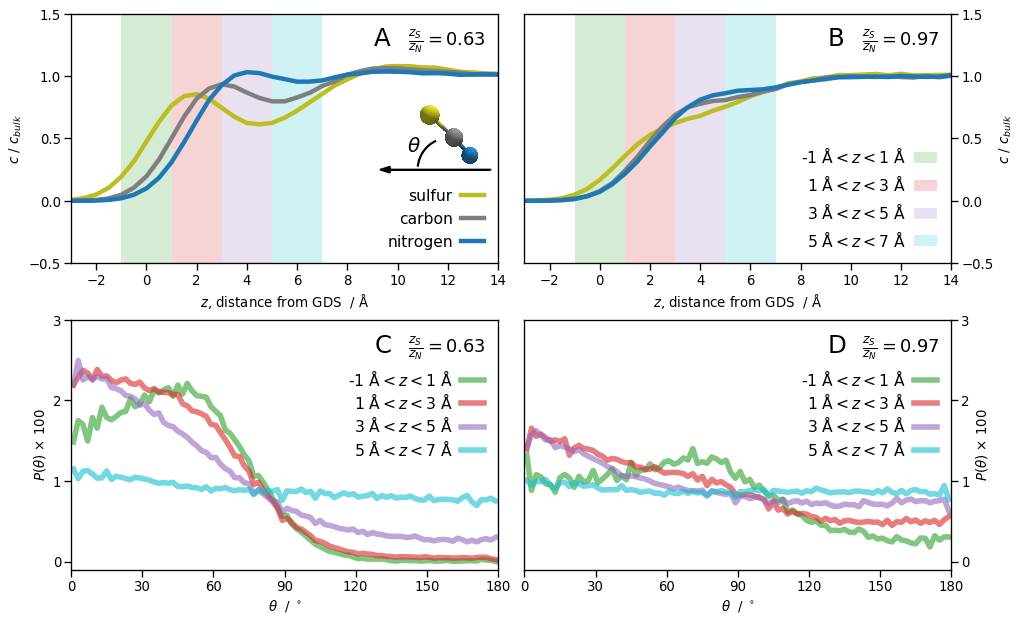

In [51]:
plt.rcParams.update({'figure.figsize': [13, 8]})
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False)
plotCpro(ax1,'ff_our','nascn_largeBox',1192,colors[8],'sulfur',atom='S') 
plotCpro(ax1,'ff_our','nascn_largeBox',1192,colors[7],'carbon') 
plotCpro(ax1,'ff_our','nascn_largeBox',1192,colors[0],'nitrogen',atom='N') 
ax1.arrow(13.7,0.25,-4,0, head_width=0.05, head_length=0.4, lw=1.5, fc='k', ec='k')
plotCpro(ax2,'ff_bian','nascn',800,colors[8],'',atom='S') 
plotCpro(ax2,'ff_bian','nascn',800,colors[7],'') 
plotCpro(ax2,'ff_bian','nascn',800,colors[0],'',atom='N') 
ax1.axvspan(-1, 1, color=colors[2], alpha=0.2, ec=None)
ax1.axvspan(1, 3, color=colors[3], alpha=0.2, ec=None)
ax1.axvspan(3, 5, color=colors[4], alpha=0.2, ec=None)
ax1.axvspan(5, 7, color=colors[9], alpha=0.2, ec=None)
ax2.axvspan(-1, 1, color=colors[2], alpha=0.2, ec=None, label='-1 Å$<z<$1 Å')
ax2.axvspan(1, 3, color=colors[3], alpha=0.2, ec=None, label='1 Å$<z<$3 Å')
ax2.axvspan(3, 5, color=colors[4], alpha=0.2, ec=None, label='3 Å$<z<$5 Å')
ax2.axvspan(5, 7, color=colors[9], alpha=0.2, ec=None, label='5 Å$<z<$7 Å')    
ax2.legend(handlelength=1.5,framealpha=1,
                handletextpad=0.5,loc='lower right',frameon=False,markerfirst=False)
ax2.get_legend()._legend_box.align = 'right'
ax1.legend(handlelength=1.5,framealpha=1,
                handletextpad=0.5,loc='lower right',frameon=False,markerfirst=False)
ax1.get_legend()._legend_box.align = 'right'
ax = plt.axes([.39, .725, .1, .1])
img=mpl.image.imread(WORKDIR+'/aux/scn.png')
ax.imshow(img,interpolation='none')
ax.axis('off')
ax = plt.axes([.39, .67, .1, .1])
angle_plot = mpl.patches.Arc((.5,.5), .6, 1, 0, 105, 170, color='k',lw=2)
ax.axis('off')
ax.add_patch(angle_plot)
ax.annotate(r'$\theta$',xy=(0.1,.78), fontsize=18, xycoords='axes fraction')
plotPtheta(ax3,'ff_our','nascn',800)
plotPtheta(ax4,'ff_bian','nascn',800)
l0 = mlines.Line2D([], [], color=colors[2], label='-1 Å$<z<$1 Å',lw=5,alpha=.6)
l2 = mlines.Line2D([], [], color=colors[3], label='1 Å$<z<$3 Å',lw=5,alpha=.6)
l4 = mlines.Line2D([], [], color=colors[4], label='3 Å$<z<$5 Å',lw=5,alpha=.6)
l6 = mlines.Line2D([], [], color=colors[9], label='5 Å$<z<$7 Å',lw=5,alpha=.6)
ax3.legend(handles=[l0,l2,l4,l6],handlelength=1.5,framealpha=1,labelspacing=.2,
                handletextpad=0.5,loc='upper right',frameon=False,markerfirst=False)
ax3.get_legend()._legend_box.align = 'right'
bb = ax3.get_legend().get_bbox_to_anchor().inverse_transformed(ax3.transAxes)
bb.y1 -= .14
ax3.get_legend().set_bbox_to_anchor(bb, transform = ax3.transAxes)
ax4.legend(handles=[l0,l2,l4,l6],handlelength=1.5,framealpha=1,labelspacing=.2,
                handletextpad=0.5,loc='upper right',frameon=False,markerfirst=False)
ax4.get_legend()._legend_box.align = 'right'
bb = ax4.get_legend().get_bbox_to_anchor().inverse_transformed(ax4.transAxes)
bb.y1 -= .14
ax4.get_legend().set_bbox_to_anchor(bb, transform = ax4.transAxes)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
ax1.annotate(r'A',xy=(0.71,.87), fontsize=22, xycoords='axes fraction')
ax2.annotate(r'B',xy=(0.71,.87), fontsize=22, xycoords='axes fraction')
ax3.annotate(r'C',xy=(0.71,.87), fontsize=22, xycoords='axes fraction')
ax4.annotate(r'D',xy=(0.71,.87), fontsize=22, xycoords='axes fraction')
ax1.annotate(r'$\frac{z_S}{z_N}=0.63$',xy=(0.79,.87), fontsize=16, xycoords='axes fraction')
ax2.annotate(r'$\frac{z_S}{z_N}=0.97$',xy=(0.79,.87), fontsize=16, xycoords='axes fraction')
ax3.annotate(r'$\frac{z_S}{z_N}=0.63$',xy=(0.79,.87), fontsize=16, xycoords='axes fraction')
ax4.annotate(r'$\frac{z_S}{z_N}=0.97$',xy=(0.79,.87), fontsize=16, xycoords='axes fraction')
plt.tight_layout(w_pad=.5, h_pad=0.2)
plt.savefig('figs/fig11.pdf')
plt.show()    

## Anion Concentration Profiles and Orientation at the Interface–KSCN

ff_our 0 3.6273588647031043 50.7149410645932 28.362946953845395 [49.]
ff_our 2 3.6273588647031043 50.818801299129305 35.15672618413834 [51.]
ff_our 4 3.6273588647031043 65.98728308085607 48.85506004064586 [1.]
ff_our 6 3.6273588647031043 91.17238139782009 51.98652559776761 [123.]
ff_bian 0 4.126274103118336 75.21888083931582 46.72823869051299 [73.]
ff_bian 2 4.126274103118336 77.53844959936266 52.06246606298983 [1.]
ff_bian 4 4.126274103118336 86.06183834159462 54.244038168026584 [3.]
ff_bian 6 4.126274103118336 92.38093477389481 52.503212208178454 [179.]


/Users/giulio/miniconda3/envs/scn/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


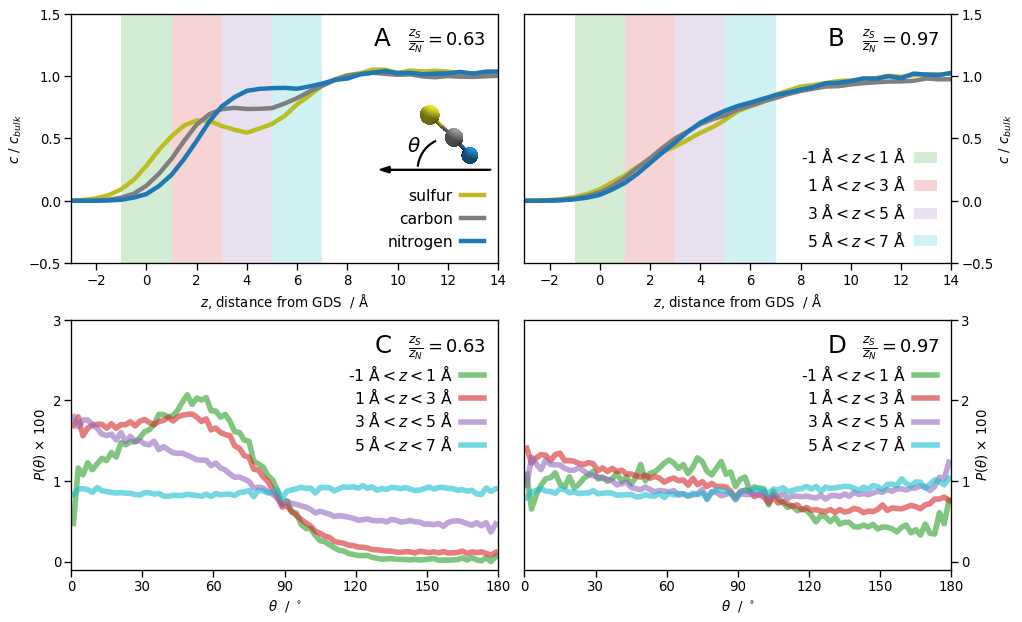

In [52]:
plt.rcParams.update({'figure.figsize': [13, 8]})
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False)
plotCpro(ax1,'ff_our','kscn',800,colors[8],'sulfur',atom='S') 
plotCpro(ax1,'ff_our','kscn',800,colors[7],'carbon') 
plotCpro(ax1,'ff_our','kscn',800,colors[0],'nitrogen',atom='N') 
ax1.arrow(13.7,0.25,-4,0, head_width=0.05, head_length=0.4, lw=1.5, fc='k', ec='k')
plotCpro(ax2,'ff_bian','kscn',800,colors[8],'',atom='S') 
plotCpro(ax2,'ff_bian','kscn',800,colors[7],'') 
plotCpro(ax2,'ff_bian','kscn',800,colors[0],'',atom='N') 
ax1.axvspan(-1, 1, color=colors[2], alpha=0.2, ec=None)
ax1.axvspan(1, 3, color=colors[3], alpha=0.2, ec=None)
ax1.axvspan(3, 5, color=colors[4], alpha=0.2, ec=None)
ax1.axvspan(5, 7, color=colors[9], alpha=0.2, ec=None)
ax2.axvspan(-1, 1, color=colors[2], alpha=0.2, ec=None, label='-1 Å$<z<$1 Å')
ax2.axvspan(1, 3, color=colors[3], alpha=0.2, ec=None, label='1 Å$<z<$3 Å')
ax2.axvspan(3, 5, color=colors[4], alpha=0.2, ec=None, label='3 Å$<z<$5 Å')
ax2.axvspan(5, 7, color=colors[9], alpha=0.2, ec=None, label='5 Å$<z<$7 Å')    
ax2.legend(handlelength=1.5,framealpha=1,
                handletextpad=0.5,loc='lower right',frameon=False,markerfirst=False)
ax2.get_legend()._legend_box.align = 'right'
ax1.legend(handlelength=1.5,framealpha=1,
                handletextpad=0.5,loc='lower right',frameon=False,markerfirst=False)
ax1.get_legend()._legend_box.align = 'right'
ax = plt.axes([.39, .725, .1, .1])
img=mpl.image.imread(WORKDIR+'/aux/scn.png')
ax.imshow(img,interpolation='none')
ax.axis('off')
ax = plt.axes([.39, .67, .1, .1])
angle_plot = mpl.patches.Arc((.5,.5), .6, 1, 0, 105, 170, color='k',lw=2)
ax.axis('off')
ax.add_patch(angle_plot)
ax.annotate(r'$\theta$',xy=(0.1,.78), fontsize=18, xycoords='axes fraction')
plotPtheta(ax3,'ff_our','kscn',800)
plotPtheta(ax4,'ff_bian','kscn',800)
l0 = mlines.Line2D([], [], color=colors[2], label='-1 Å$<z<$1 Å',lw=5,alpha=.6)
l2 = mlines.Line2D([], [], color=colors[3], label='1 Å$<z<$3 Å',lw=5,alpha=.6)
l4 = mlines.Line2D([], [], color=colors[4], label='3 Å$<z<$5 Å',lw=5,alpha=.6)
l6 = mlines.Line2D([], [], color=colors[9], label='5 Å$<z<$7 Å',lw=5,alpha=.6)
ax3.legend(handles=[l0,l2,l4,l6],handlelength=1.5,framealpha=1,labelspacing=.2,
                handletextpad=0.5,loc='upper right',frameon=False,markerfirst=False)
ax3.get_legend()._legend_box.align = 'right'
bb = ax3.get_legend().get_bbox_to_anchor().inverse_transformed(ax3.transAxes)
bb.y1 -= .12
ax3.get_legend().set_bbox_to_anchor(bb, transform = ax3.transAxes)
ax4.legend(handles=[l0,l2,l4,l6],handlelength=1.5,framealpha=1,labelspacing=.2,
                handletextpad=0.5,loc='upper right',frameon=False,markerfirst=False)
ax4.get_legend()._legend_box.align = 'right'
bb = ax4.get_legend().get_bbox_to_anchor().inverse_transformed(ax4.transAxes)
bb.y1 -= .12
ax4.get_legend().set_bbox_to_anchor(bb, transform = ax4.transAxes)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
ax1.annotate(r'A',xy=(0.71,.87), fontsize=22, xycoords='axes fraction')
ax2.annotate(r'B',xy=(0.71,.87), fontsize=22, xycoords='axes fraction')
ax3.annotate(r'C',xy=(0.71,.87), fontsize=22, xycoords='axes fraction')
ax4.annotate(r'D',xy=(0.71,.87), fontsize=22, xycoords='axes fraction')
ax1.annotate(r'$\frac{z_S}{z_N}=0.63$',xy=(0.79,.87), fontsize=16, xycoords='axes fraction')
ax2.annotate(r'$\frac{z_S}{z_N}=0.97$',xy=(0.79,.87), fontsize=16, xycoords='axes fraction')
ax3.annotate(r'$\frac{z_S}{z_N}=0.63$',xy=(0.79,.87), fontsize=16, xycoords='axes fraction')
ax4.annotate(r'$\frac{z_S}{z_N}=0.97$',xy=(0.79,.87), fontsize=16, xycoords='axes fraction')
plt.tight_layout(w_pad=.5, h_pad=0.2)
plt.savefig('figs/figS11.pdf')
plt.show()    

## Probability _vs._ C–cation and S–C–Cation Angle – Interface
#### $m\approx5$ mol kg$^{-1}$

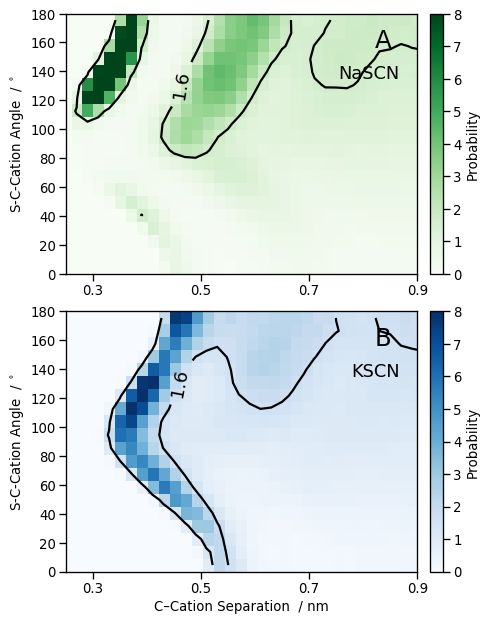

CPU times: user 322 ms, sys: 14.4 ms, total: 336 ms
Wall time: 338 ms


In [53]:
%%time
plt.rcParams.update({'figure.figsize': [6.5, 8]})
f, ((ax1, ax2)) = plt.subplots(nrows=2)
for cat,cm,sub in zip(['NA','K'],[plt.cm.Greens,plt.cm.Blues],[ax1,ax2]):
    if cat == 'NA':
        anion = 'scn_largeBox'; nc = 1192
    else: 
        anion = 'scn'; nc = 800
    folder = WORKDIR+'/interface/ff_our/spce/'+cat.lower()+anion
    if not os.path.isfile( folder+'/scn_cat2dAngleInterface.p' ):
        xedges = np.arange(0,187,9)
        yedges = np.arange(.24,2,.02)
        X = xedges[:-1]+(xedges[1]-xedges[0])/2.
        Y = yedges[:-1]+(yedges[1]-yedges[0])/2.
        print(xedges.min(),xedges.max())
        print(X.min(),X.max())
        Prob = np.zeros(shape=(X.size,Y.size))        
        top = md.load(folder+'/'+str(nc)+'.gro')
        top = top.atom_slice(top.top.select("all and not (name H1 or name H2)"))
        traj = md.load_xtc(folder+'/'+str(nc)+'.xtc', top=top)[500:]
        an = traj.top.select('resname SCN and name C2')       
        gds = calcGds('ff_our',cat.lower()+anion,[nc])
        pair_ci = traj.top.select_pairs('name C2','name '+cat)
        trio = []
        for pair in pair_ci:
            three = np.insert(pair,0,pair[0]-1)
            trio.append(three)
        trio = np.array(trio)            
        corr = np.outer(np.sin(X/180*np.pi),Y**2)
        step = int(traj.n_frames/50)
        for n in range(0,traj.n_frames-step,step):
            t = traj[n:n+step]
            z_an = t.atom_slice(an).xyz[:,:,2] 
            z_com = md.compute_center_of_mass(t)[:,2]
            z_an = z_an - np.repeat(z_com,len(an)).reshape(z_an.shape)
            dist_ci = md.compute_distances(t,pair_ci,periodic=True)
            angle_sci = md.compute_angles(t,trio)*180/np.pi
            for z,theta,dist in zip(z_an,angle_sci,dist_ci):
                dist = dist.reshape((z.size,z.size))
                theta = theta.reshape((z.size,z.size))
                b = ((z<=gds[0]+.3) & (z>=gds[0]-.1)) | ((z>=gds[1]-.3) & (z<=gds[1]+.1))
                theta = theta[b,:]; dist = dist[b,:]
                P, xedges, yedges = np.histogram2d(x=theta.ravel(),y=dist.ravel(),bins=(xedges,yedges))
                Prob += P/corr
        Prob = Prob / Prob[:,70:].mean()
        vmin = Prob.min(); vmax = Prob.max()
        print(vmin,vmax)
        df = pd.DataFrame(data=Prob,index=X,columns=Y)
        df.to_pickle(folder+'/scn_cat2dAngleInterface.p')
    else:
        d = pd.read_pickle(folder+'/scn_cat2dAngleInterface.p')
        Prob = d.values; X = d.index; Y = d.columns
    im = sub.imshow(Prob,vmin=0,vmax=8,aspect='auto',
           extent=[.24,2,0,180],origin='lower',cmap=cm)
    cb = f.colorbar(im,ax=sub,label='Probability',pad=.03,ticks=range(9))
    cb.ax.set_yticklabels(['{:1g}'.format(i) for i in range(9)]) 
    cset = sub.contour(Y, X, Prob, [1.6], linewidths=2,cmap=plt.cm.binary_r)
    manual_locations = [(.5,130)]
    sub.clabel(cset,inline=True,fmt='%1.1f',fontsize=16,manual=manual_locations,colors=['k'])
    sub.set_xlim(.25,.9); sub.set_ylim(X.min(),X.max())
    sub.set_xticks(np.arange(.3,.9,.2)); sub.set_yticks(np.arange(0,181,20))
    sub.set_xticklabels(['{:1g}'.format(i) for i in np.arange(.3,1.2,.2)])
    sub.set_yticklabels(['{:1g}'.format(i) for i in np.arange(0,181,20)])
    sub.set_ylabel('S-C-Cation Angle  / $^\circ$')
ax1.annotate('A',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax2.annotate('B',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax1.annotate('NaSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.annotate('KSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.set_xlabel('C–Cation Separation  / nm')
f.tight_layout(h_pad=.5)
plt.show()

## Probability Difference _vs._ C–cation and S–C–Cation Angle (Interface-Bulk)
#### $m\approx5$ mol kg$^{-1}$

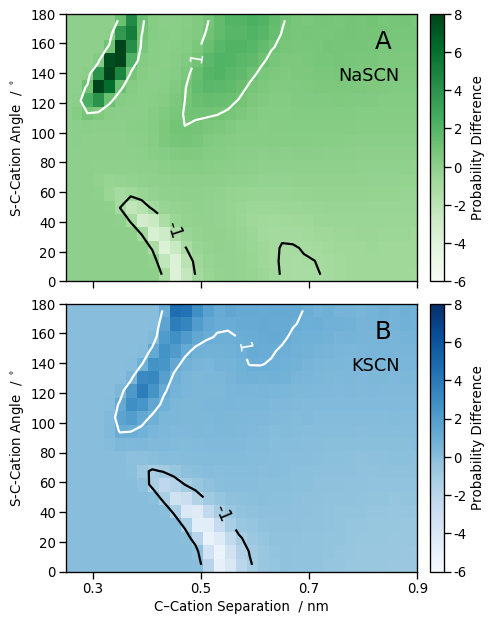

In [54]:
plt.rcParams.update({'figure.figsize': [6.5, 8]})
f, ((ax1, ax2)) = plt.subplots(nrows=2)
for cat,cm,sub in zip(['NA','K'],[plt.cm.Greens,plt.cm.Blues],[ax1,ax2]):
    folder = WORKDIR+'/bulk/rdfs/ff_our/spce/'+cat.lower()+'scn/5.0m'
    d2 = pd.read_pickle(folder+'/scn_cat2dAngle.p')
    if cat == 'NA':
        anion = 'scn_largeBox'; nc = 1192
    else: 
        anion = 'scn'; nc = 800
    folder = WORKDIR+'/interface/ff_our/spce/'+cat.lower()+anion 
    d1 = pd.read_pickle(folder+'/scn_cat2dAngleInterface.p')
    d = d1-d2   
    Prob = d.values; X = d.index; Y = d.columns
    vmin=-6; vmax=8
    im = sub.imshow(Prob,vmin=vmin,vmax=vmax,aspect='auto',
           extent=[.24,2,0,180],origin='lower',cmap=cm)
    cb = f.colorbar(im,ax=sub,label='Probability Difference',pad=.03,ticks=np.arange(vmin,vmax+1,2))
    cb.ax.set_yticklabels(['{:1g}'.format(i) for i in np.arange(vmin,vmax+1,2)]) 
    cset = sub.contour(Y, X, Prob, [-1,1], linewidths=2,cmap=plt.cm.binary_r)
    manual_locations = [(.55,40),(.55,150)]
    sub.clabel(cset,inline=True,fmt='%1.0f',fontsize=16,manual=manual_locations,colors=['k','w'])
    sub.set_xlim(.25,.9); sub.set_ylim(X.min(),X.max())
    sub.set_xticks(np.arange(.3,.9,.2)); sub.set_yticks(np.arange(0,181,20))
    sub.set_xticklabels(['{:1g}'.format(i) for i in np.arange(.3,1.2,.2)])
    sub.set_yticklabels(['{:1g}'.format(i) for i in np.arange(0,181,20)])
    sub.set_ylabel('S-C-Cation Angle  / $^\circ$')
ax1.annotate('A',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax2.annotate('B',xy=(.88,.87), fontsize=22, xycoords='axes fraction')
ax1.annotate('NaSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.annotate('KSCN',xy=(.95,.75), fontsize=16, xycoords='axes fraction', 
             horizontalalignment='right', color='k')
ax2.set_xlabel('C–Cation Separation  / nm')
ax1.set_xticklabels(np.tile([''],4))
f.tight_layout(h_pad=.5)
f.savefig('figs/fig12.pdf')
plt.show()

## Surface Excess and Excess Surface Tension

ff_our nacl
[-0.21596019  0.01691009]
[0.0129241  0.00527411]
ff_our nai
[-0.18378464  0.0246128 ]
[0.00141822 0.00044565]
ff_our nascn_largeBox
[-0.09966731  0.00419644]
[0.00460612 0.00141769]
ff_our kscn
[-0.11298107  0.00334955]
[0.01263381 0.00323457]


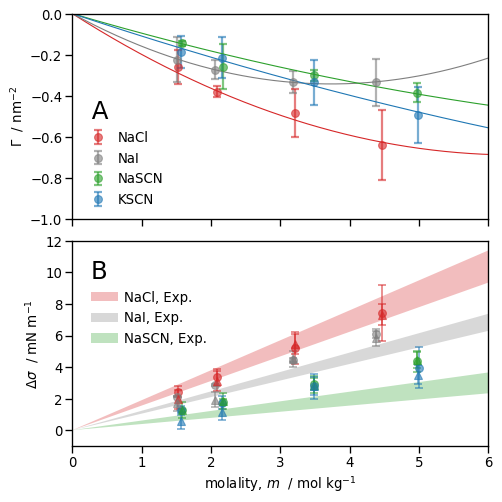

In [55]:
plt.rcParams.update({'figure.figsize': [6.5, 6.5],'legend.frameon':False})
f, ((ax1, ax2)) = plt.subplots(2, 1, sharex=False, sharey=False)
plotGamma(ax1,'ff_our','nacl','quadratic',colors[3],l='NaCl')
plotGamma(ax1,'ff_our','nai','quadratic',colors[7],l='NaI')
plotGamma(ax1,'ff_our','nascn_largeBox','quadratic',colors[2],l='NaSCN')
plotGamma(ax1,'ff_our','kscn','quadratic',colors[0],l='KSCN')
plotExpSigma(ax2,'nacl',colors[3],'NaCl, Exp.')
plotExpSigma(ax2,'nai',colors[7],'NaI, Exp.')
plotExpSigma(ax2,'nascn',colors[2],'NaSCN, Exp.')
plotSigma(ax2,'ff_our','nacl','quadratic',ncat,colors[3])
plotSigma(ax2,'ff_our','nai','quadratic',ncat,colors[7])
plotSigma(ax2,'ff_our','nascn_largeBox','quadratic',ncat_largeBox,colors[2])
plotSigma(ax2,'ff_our','kscn','quadratic',ncat,colors[0])
plotPSigma(ax2,'ff_our','nacl',ncat,colors[3])
plotPSigma(ax2,'ff_our','nai',ncat,colors[7])
plotPSigma(ax2,'ff_our','nascn_largeBox',ncat_largeBox,colors[2])
plotPSigma(ax2,'ff_our','kscn',ncat,colors[0])
ax1.set_ylim(-1,0); ax2.set_ylim(-1,12); ax1.set_xlim(0,6); ax2.set_xlim(0,6)
ax1.legend(loc='lower left',handletextpad=0.5,markerfirst=True,fontsize=12)
ax2.legend(loc='upper left',handletextpad=0.5,markerfirst=True,borderaxespad=1,fontsize=12)
ax1.get_legend().set_title(' A',prop={'size':22})
ax2.get_legend().set_title('B',prop={'size':22})
ax1.get_legend()._legend_box.align = 'left'
ax2.get_legend()._legend_box.align = 'left'
ax2.set_xlabel(r'molality, $m$  / mol kg$^{-1}$')
ax1.set_xticklabels(np.tile([''],7))
plt.tight_layout(w_pad=0,h_pad=0.5)
plt.savefig('figs/fig13.pdf')
plt.show()    

ff_our kcl
[-0.17562451  0.01806052]
[0.01441892 0.00458123]
ff_our ki
[-0.1798726   0.02555567]
[0.0073829  0.00338278]


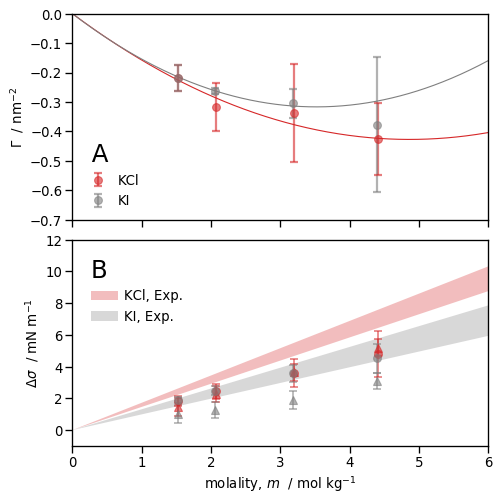

In [56]:
plt.rcParams.update({'figure.figsize': [6.5, 6.5]})
f, ((ax1, ax2)) = plt.subplots(2, 1, sharex=False, sharey=False)
plotGamma(ax1,'ff_our','kcl','quadratic',colors[3],'KCl')
plotGamma(ax1,'ff_our','ki','quadratic',colors[7],'KI')
plotPSigma(ax2,'ff_our','kcl',ncat,colors[3])
plotPSigma(ax2,'ff_our','ki',ncat,colors[7])
plotSigma(ax2,'ff_our','kcl','quadratic',ncat,colors[3])
plotSigma(ax2,'ff_our','ki','quadratic',ncat,colors[7])
plotExpSigma(ax2,'kcl',colors[3],'KCl, Exp.')
plotExpSigma(ax2,'ki',colors[7],'KI, Exp.')
ax1.set_ylim(-.7,0); ax2.set_ylim(-1,12); ax1.set_xlim(0,6); ax2.set_xlim(0,6)
ax1.legend(loc='lower left',handletextpad=0.5,markerfirst=True,fontsize=12)
ax2.legend(loc='upper left',handletextpad=0.5,markerfirst=True,borderaxespad=1,fontsize=12)
ax1.get_legend().set_title(' A',prop={'size':22})
ax2.get_legend().set_title('B',prop={'size':22})
ax1.get_legend()._legend_box.align = 'left'
ax2.get_legend()._legend_box.align = 'left'
ax2.set_xlabel(r'molality, $m$  / mol kg$^{-1}$')
ax1.set_xticklabels(np.tile([''],7))
plt.tight_layout(w_pad=0,h_pad=0.5)
plt.savefig('figs/figS12.pdf')
plt.show()    